# Annotation

<p> Predict whether next week's productivity plan will be met using timeseries data for previous months, which includes information about teams (number of workers, number of workers who were idle due to production interruption, etc.), incentive, production interruption, targeted productivity, time allocated for a task, etc.

    
https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import os
from matplotlib import pyplot as plt
from pathlib import Path

os.chdir(os.environ['PROJECT_ROOT'])
DATA_ROOT = Path('data', 'productivity-prediction-garment-employees')

%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

# First look at the data

In [2]:
train_data = pd.read_csv(DATA_ROOT / 'garments_worker_productivity.csv')
X = train_data.copy()
X['bigger_than_targeted'] = (X['targeted_productivity'] <= X['actual_productivity']).astype(int)
X = X.drop(columns=['actual_productivity'])
X['date'] = pd.to_datetime(X['date']).dt.strftime('%Y-%m-%d')
X.head(10)

date   quarter  department       day  team  targeted_productivity  \
0  2015-01-01  Quarter1      sweing  Thursday     8                   0.80   
1  2015-01-01  Quarter1  finishing   Thursday     1                   0.75   
2  2015-01-01  Quarter1      sweing  Thursday    11                   0.80   
3  2015-01-01  Quarter1      sweing  Thursday    12                   0.80   
4  2015-01-01  Quarter1      sweing  Thursday     6                   0.80   
5  2015-01-01  Quarter1      sweing  Thursday     7                   0.80   
6  2015-01-01  Quarter1  finishing   Thursday     2                   0.75   
7  2015-01-01  Quarter1      sweing  Thursday     3                   0.75   
8  2015-01-01  Quarter1      sweing  Thursday     2                   0.75   
9  2015-01-01  Quarter1      sweing  Thursday     1                   0.75   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   
5  25.90   984.0       6720         38        0.0         0   
6   3.94     NaN        960          0        0.0         0   
7  28.08   795.0       6900         45        0.0         0   
8  19.87   733.0       6000         34        0.0         0   
9  28.08   681.0       6900         45        0.0         0   

   no_of_style_change  no_of_workers  bigger_than_targeted  
0                   0           59.0                     1  
1                   0            8.0                     1  
2                   0           30.5                     1  
3                   0           30.5                     1  
4                   0           56.0                     1  
5                   0           56.0                     1  
6                   0            8.0                     1  
7                   0           57.5                     1  
8                   0           55.0                     1  
9                   0           57.5                     1

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  bigger_than_targeted   1197 non-null   int32  
dtypes: f

In [4]:
X.describe(percentiles=[.25, .5, .75, .875])

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
87.5%    11.000000               0.800000    29.120000   1433.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
87.5%   9900.000000    63.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  bigger_than_targeted  
count         1197.000000    1197.000000           1197.000000  
mean             0.150376      34.609858              0.730994  
std              0.427848      22.197687              0.443628  
min              0.000000       2.000000              0.000000  
25%              0.000000       9.000000              0.000000  
50%              0.000000      34.000000              1.000000  
75%              0.000000      57.000000              1.000000  
87.5%            0.000000      58.000000              1.000000  
max              2.000000      89.000000              1.000000

<p>As we can see, distributions of all features ar mostly the same so probably existence of 'finishing ' value is a misprint in data. Let's replace 'finishing ' by 'finishing'.</p>

In [5]:
X = X.replace('finishing ', 'finishing')
X['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

In [6]:
X['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

<p><b>One more interesting thing: all wip NaN values appear in 'finishing' department. Probably that means that 'finishing' department has no work in progress while waiting work from sweing department. That is why we can replace all NaN values with zero.</b></p>

In [7]:
X['wip'] = X['wip'].fillna(0)
X.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
bigger_than_targeted     0
dtype: int64

In [8]:
X.duplicated().sum()

0

In [9]:
categorical_features = ['quarter', 'department', 'day', 'team']
numerical_features_and_target = [col for col in X.drop(columns=['date']).columns if col not in categorical_features]
numerical_features = [col for col in X.drop(columns=['date', 'bigger_than_targeted']).columns if col not in categorical_features]
print('Numerical:', numerical_features)
print('Categorical:', categorical_features)

Numerical: ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
Categorical: ['quarter', 'department', 'day', 'team']


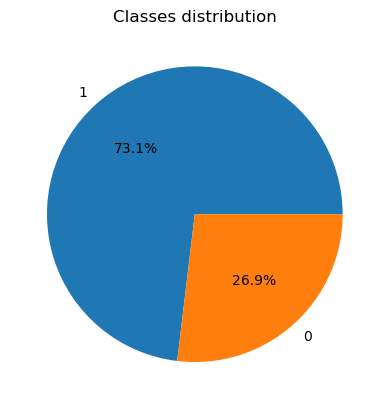

In [10]:
target_values_count = list(X['bigger_than_targeted'].value_counts())
plt.pie(target_values_count, labels=X['bigger_than_targeted'].unique(), autopct='%1.1f%%')
plt.title('Classes distribution')
plt.show()

<p><b>There are 0.731 of observations with positive target class.</b></p>

# Categorical features distributions

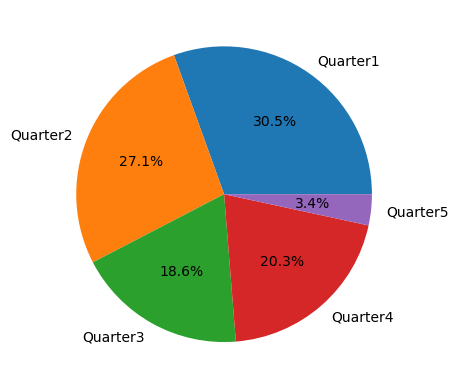

In [11]:
quarters_unique_dates = X.groupby(X['quarter'])['date'].nunique()
plt.pie(quarters_unique_dates, labels=quarters_unique_dates.index, autopct='%1.1f%%')
plt.show()

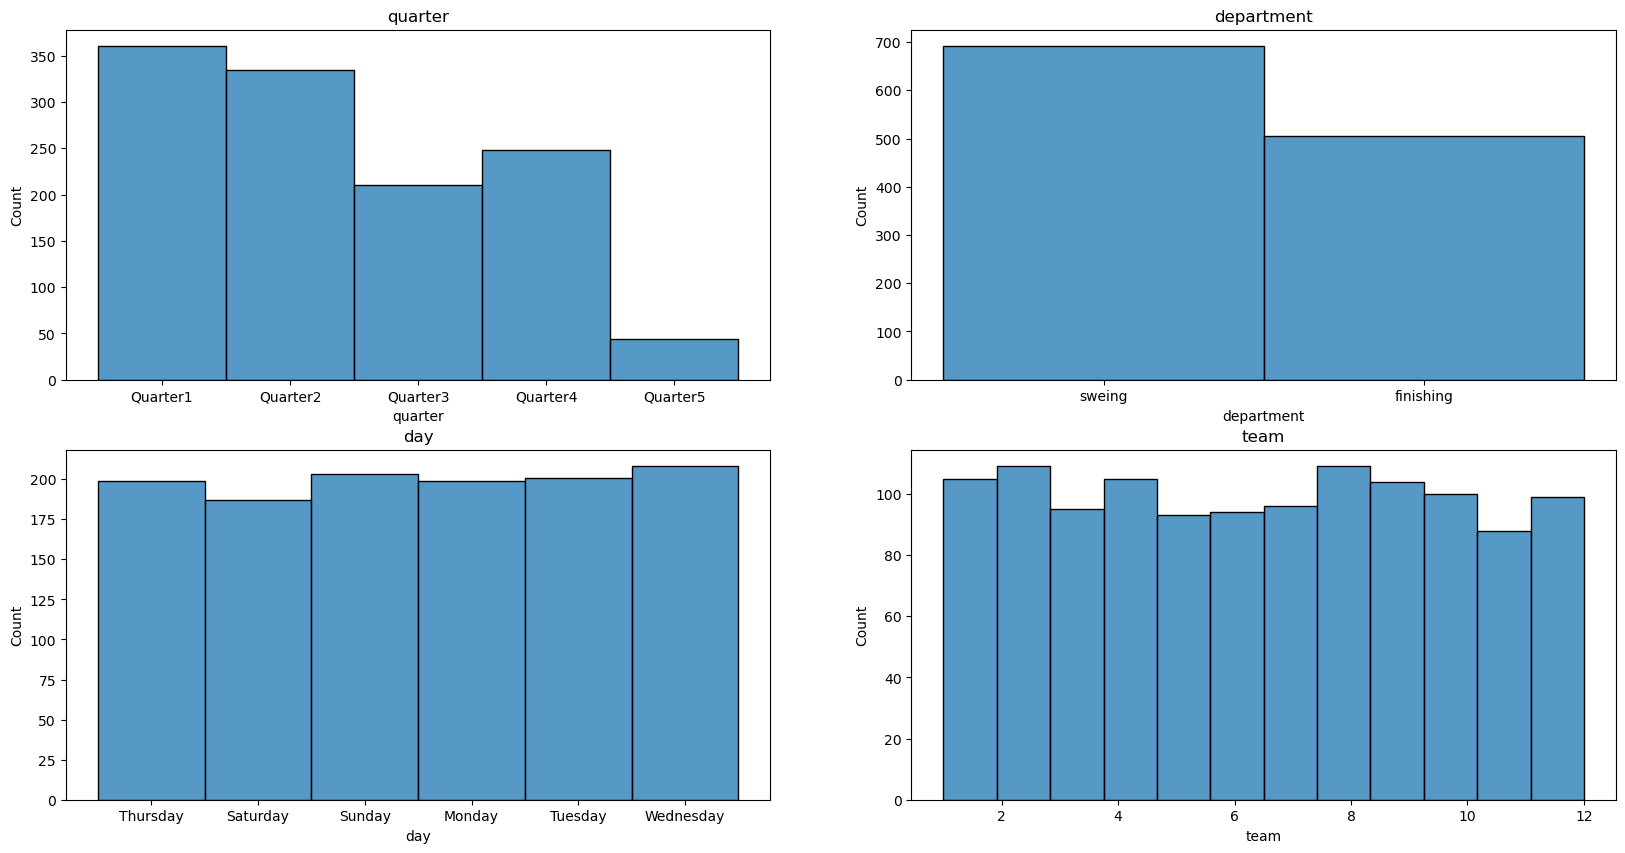

In [12]:
plt.figure(figsize=(20, 10))
for i, cat_col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(X[cat_col], bins=X[cat_col].nunique())
    plt.title(cat_col)

<p><b>1) Quarter: most of observations refer to Quarter1 and Quarter2 (the bigger production activity these first two weeks each months).</b></p>
<p><b>2) Department: 'sweing' department has more observetions (~150-200) than 'finishing' department. Probably because finishing process in garment can be optional in some cases, whereas sweing is the main step.</b></p>
<p><b>3) Day: 'Friday' is not a working day in Bangladesh. One 'Saturday' also wasn't a working day because of the national holiday</b></p>

### Departments

In [13]:
X.groupby('department').nunique()

date  quarter  day  team  targeted_productivity  smv  wip  \
department                                                              
finishing     59        5    6    12                      8    8    1   
sweing        59        5    6    12                      9   62  548   

            over_time  incentive  idle_time  idle_men  no_of_style_change  \
department                                                                  
finishing          51          7          1         1                   1   
sweing            130         42         12        10                   3   

            no_of_workers  bigger_than_targeted  
department                                       
finishing              22                     2  
sweing                 39                     2

In [14]:
X[X['department'] == 'finishing'][['wip', 'idle_time', 'idle_men', 'no_of_style_change']].describe()

wip  idle_time  idle_men  no_of_style_change
count  506.0      506.0     506.0               506.0
mean     0.0        0.0       0.0                 0.0
std      0.0        0.0       0.0                 0.0
min      0.0        0.0       0.0                 0.0
25%      0.0        0.0       0.0                 0.0
50%      0.0        0.0       0.0                 0.0
75%      0.0        0.0       0.0                 0.0
max      0.0        0.0       0.0                 0.0

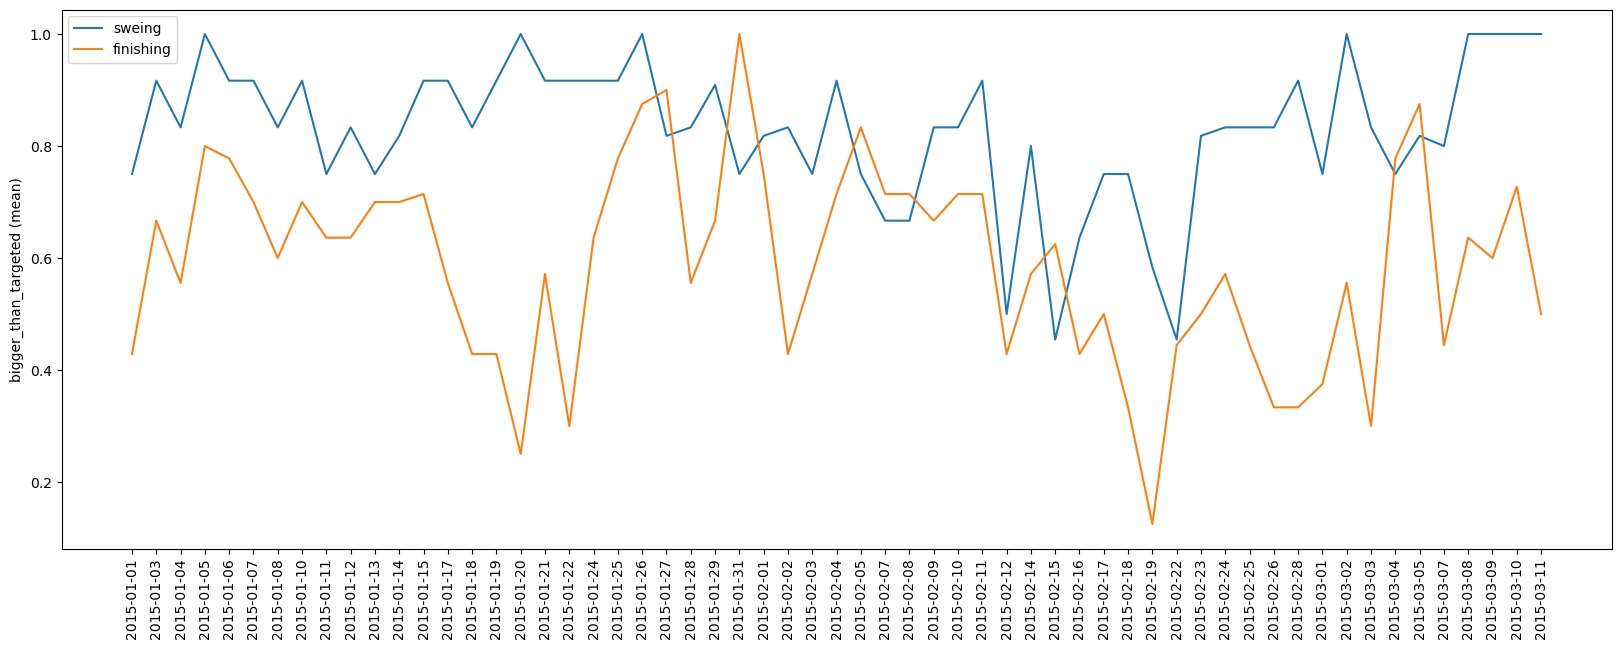

In [15]:
plt.figure(figsize=(20, 7))
plt.xticks(rotation='vertical')
plt.plot(X[X['department'] == 'sweing'].groupby('date')['bigger_than_targeted'].mean())
plt.plot(X[X['department'] == 'finishing'].groupby('date')['bigger_than_targeted'].mean())
plt.ylabel('bigger_than_targeted (mean)')
plt.legend(['sweing', 'finishing'])
plt.show()

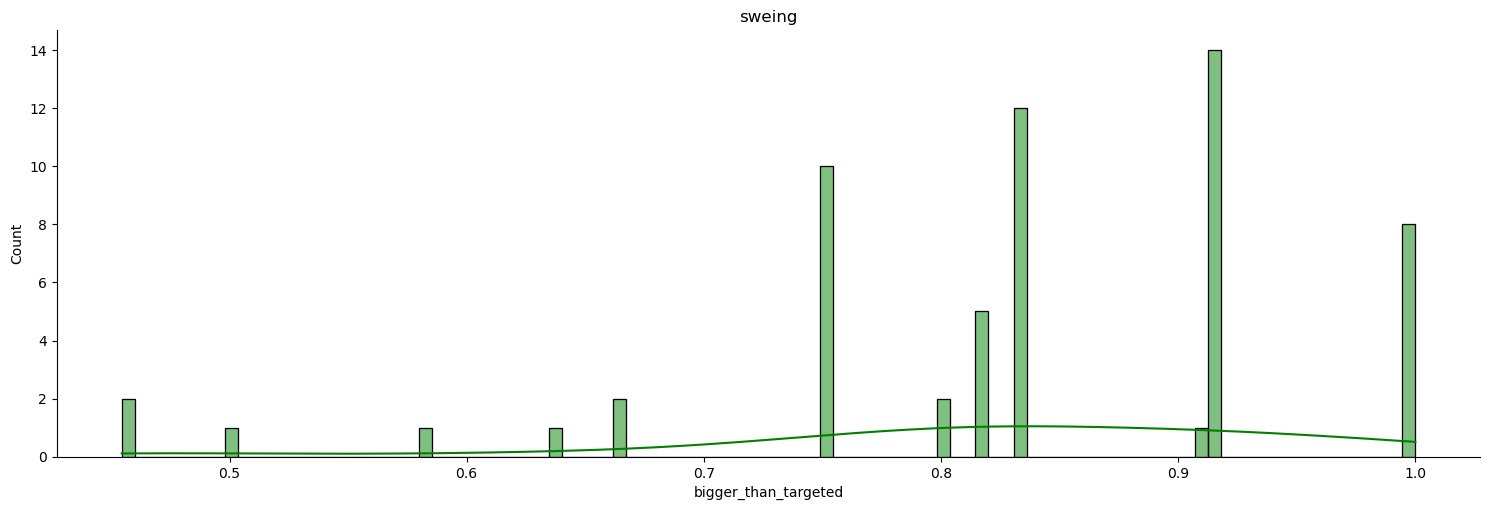

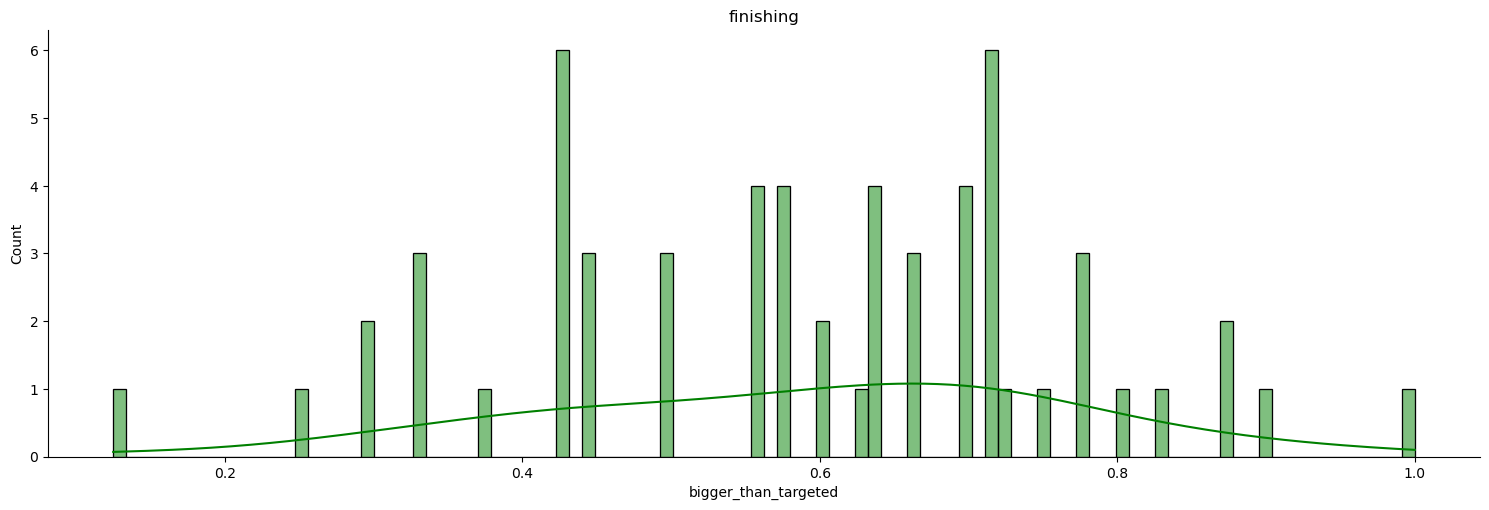

In [16]:
for i, department in enumerate(X['department'].unique()):
    current_dep_data = X[X['department'] == department].groupby('date')['bigger_than_targeted'].mean()
    sns.displot(current_dep_data, color='g', bins=100, kde=True, height=5, aspect=15.0/5.0)
    plt.title(department)
    plt.show()

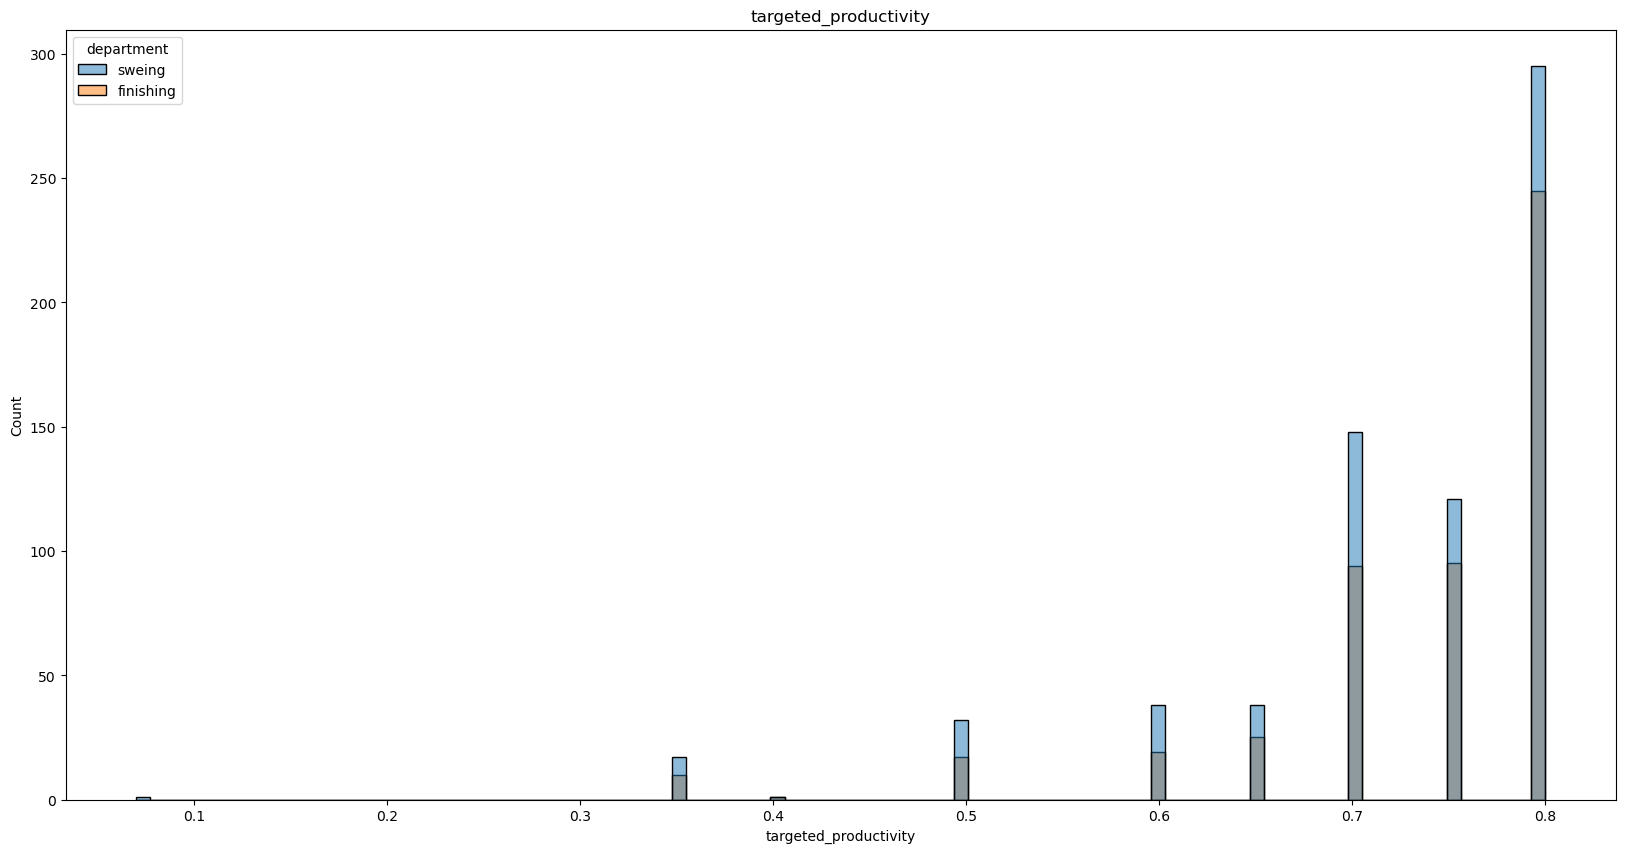

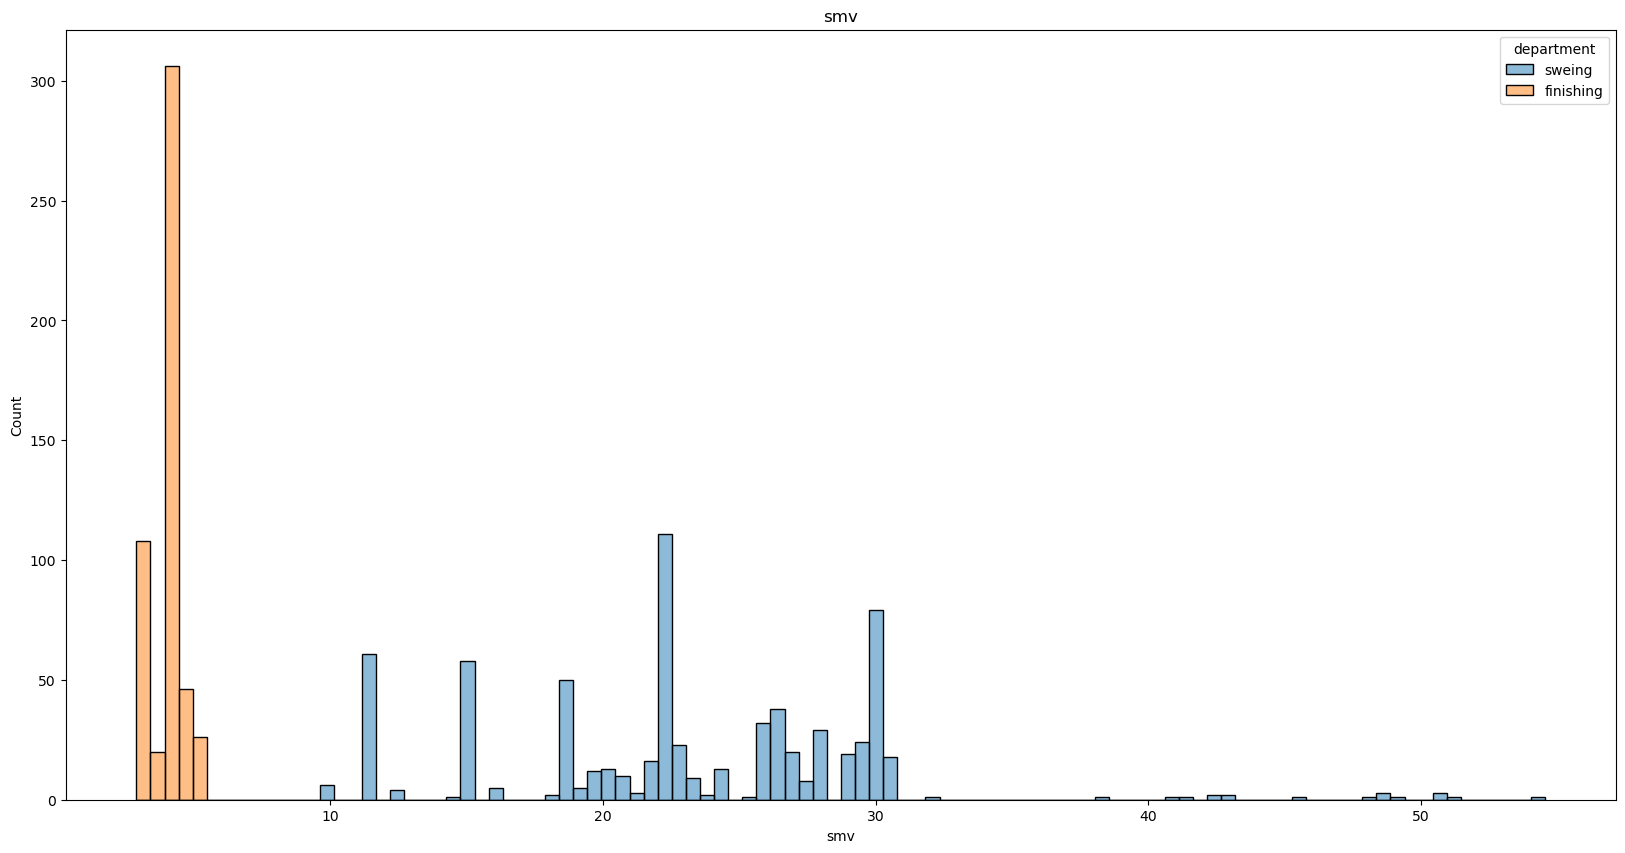

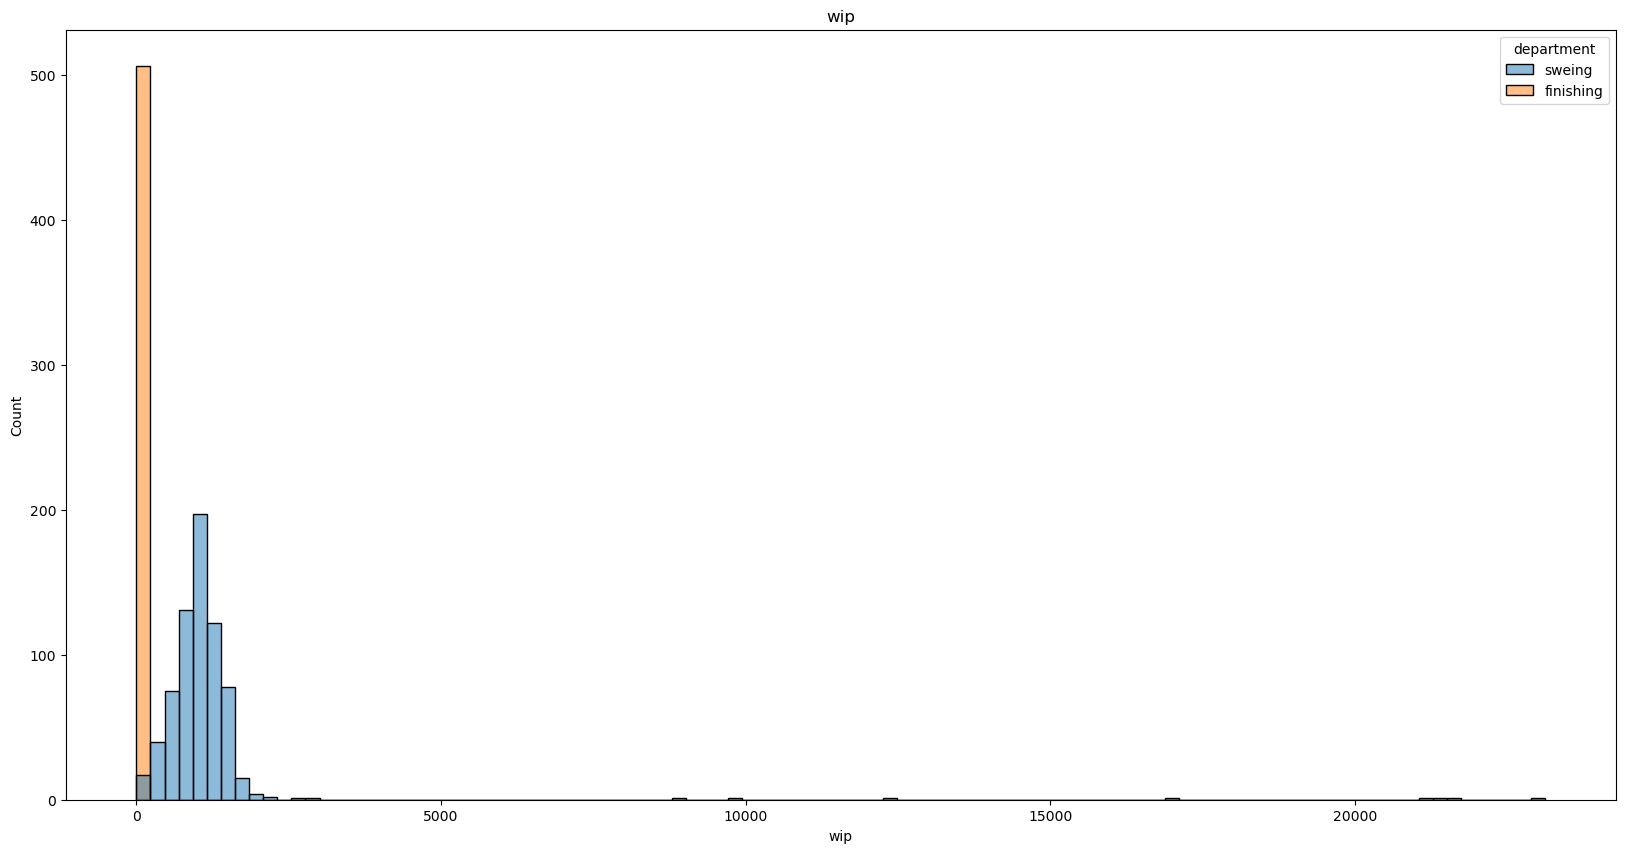

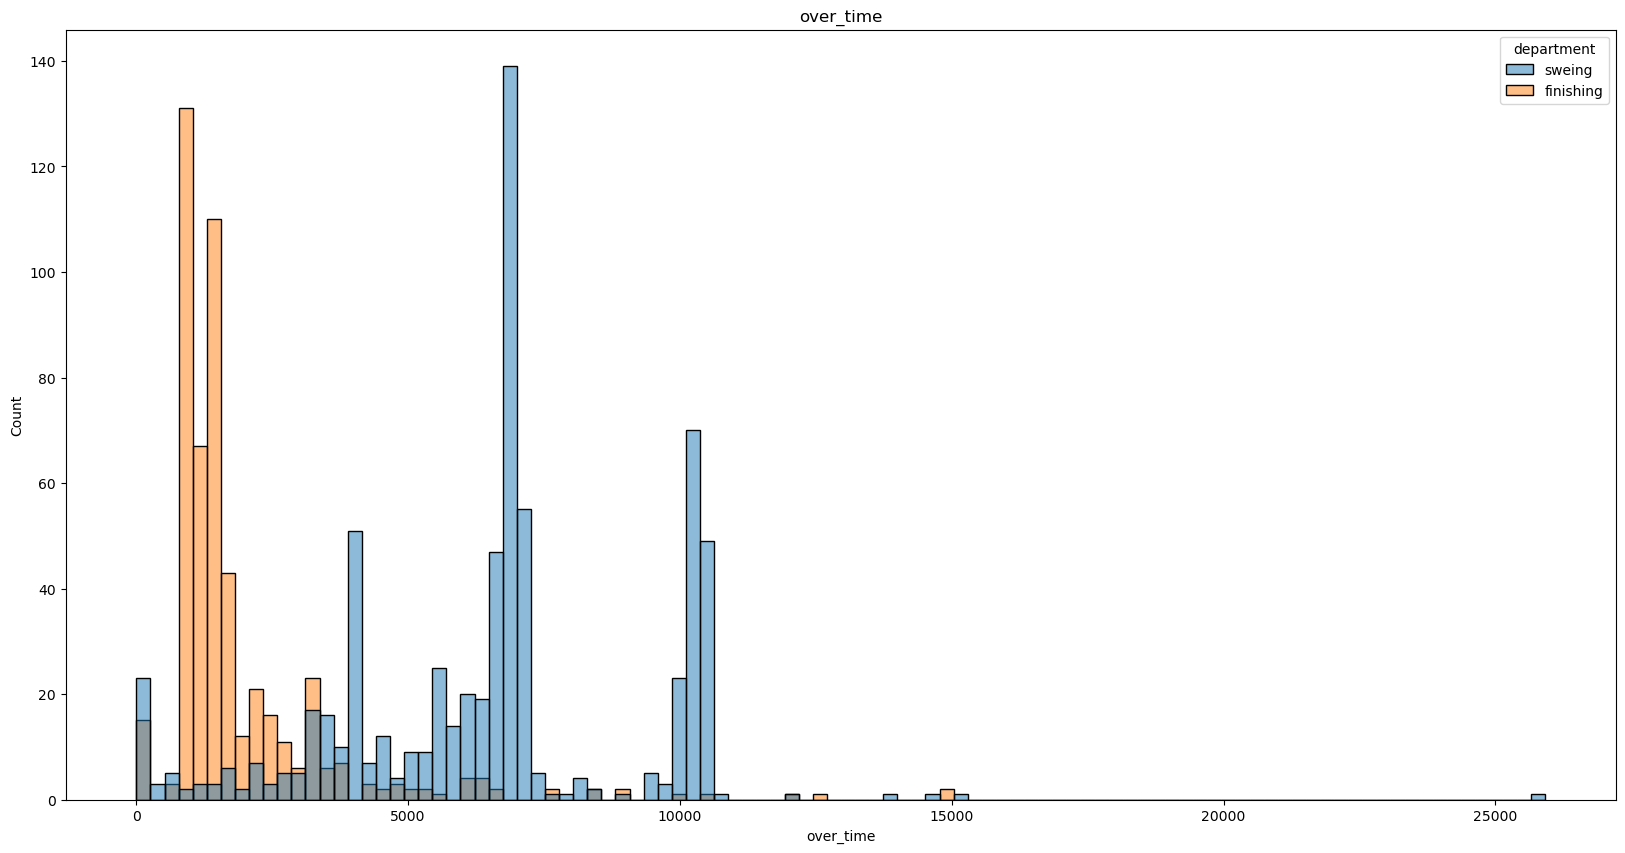

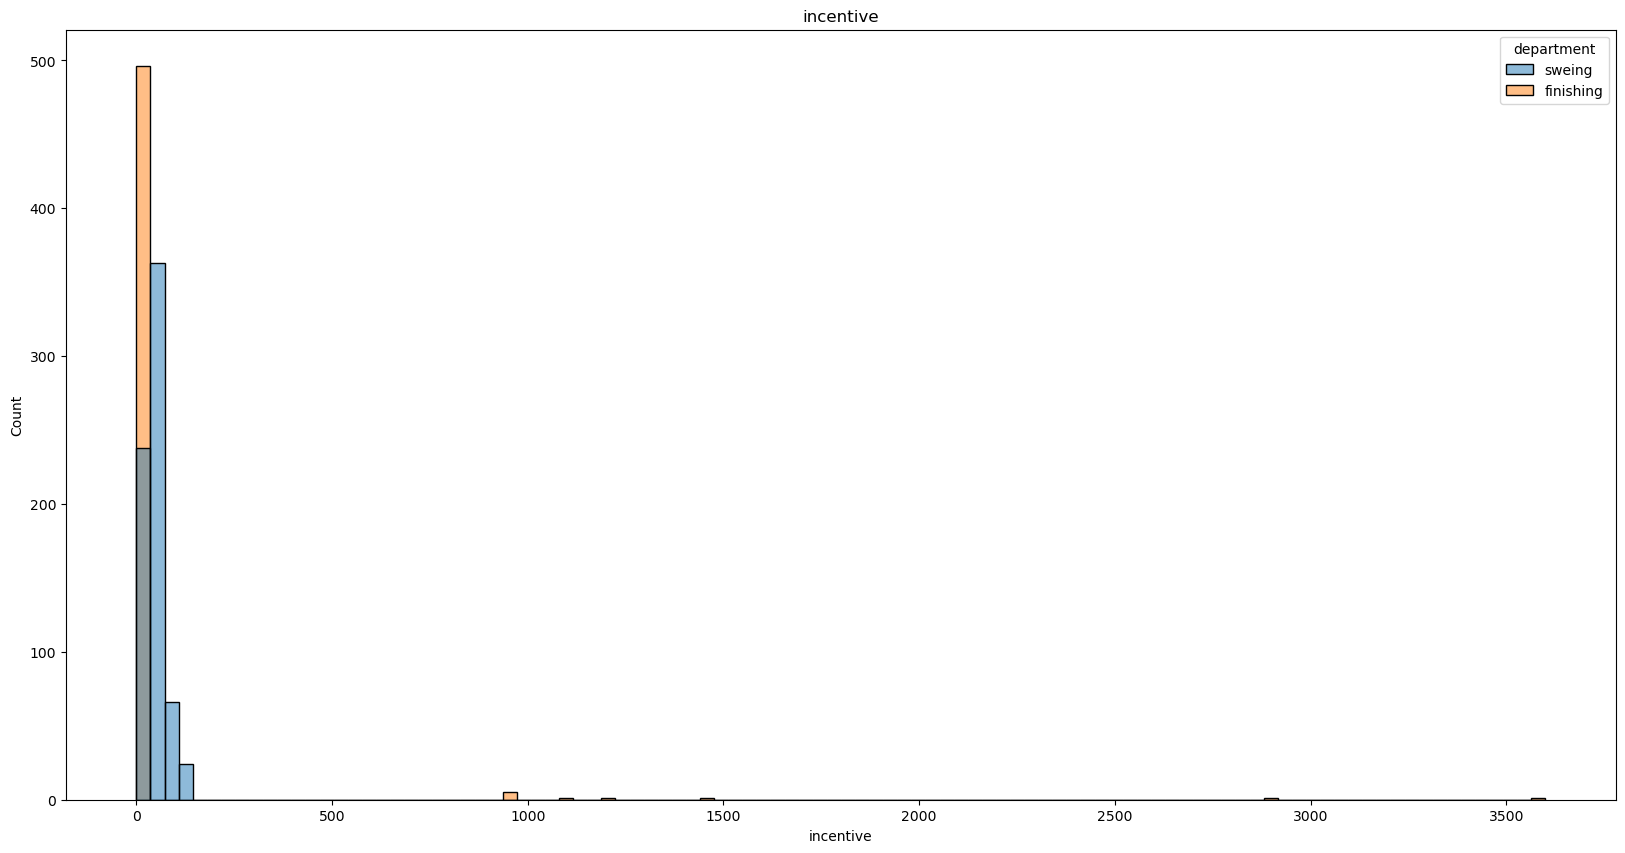

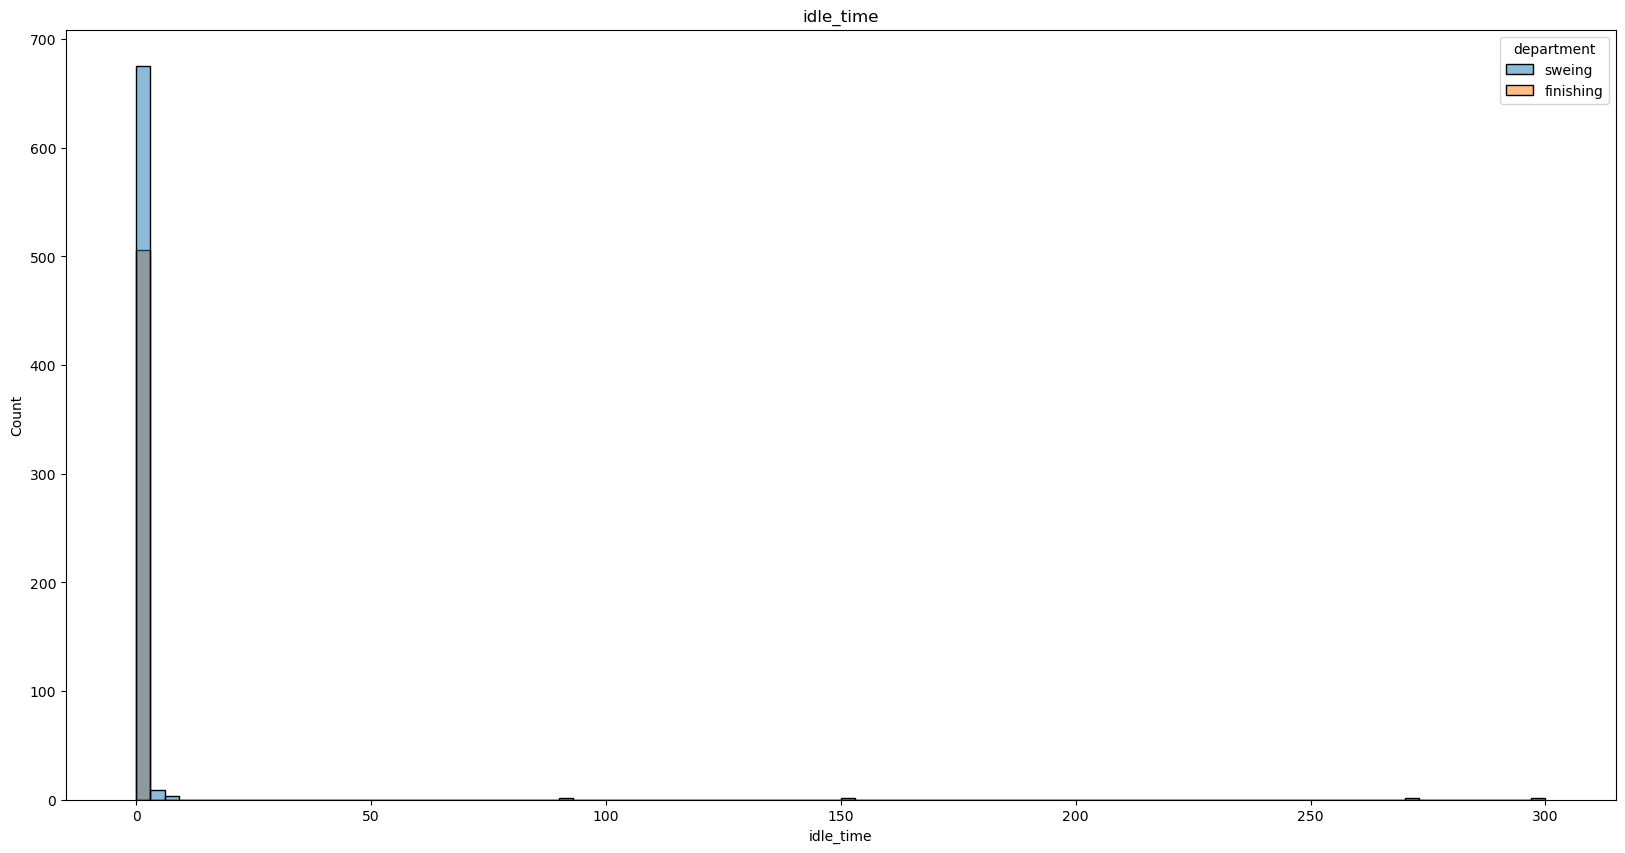

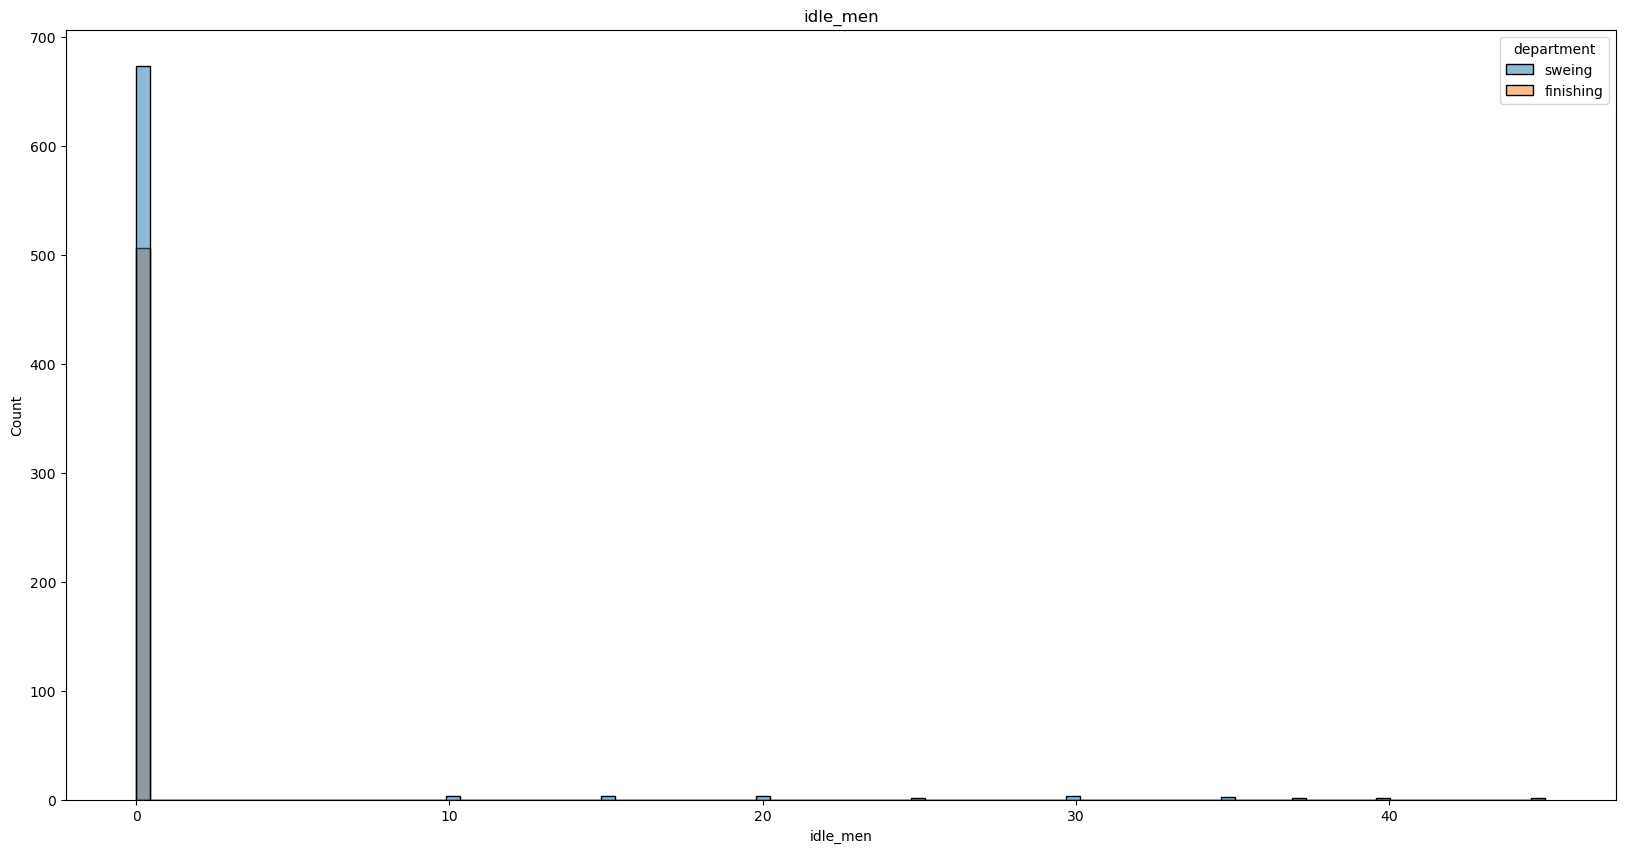

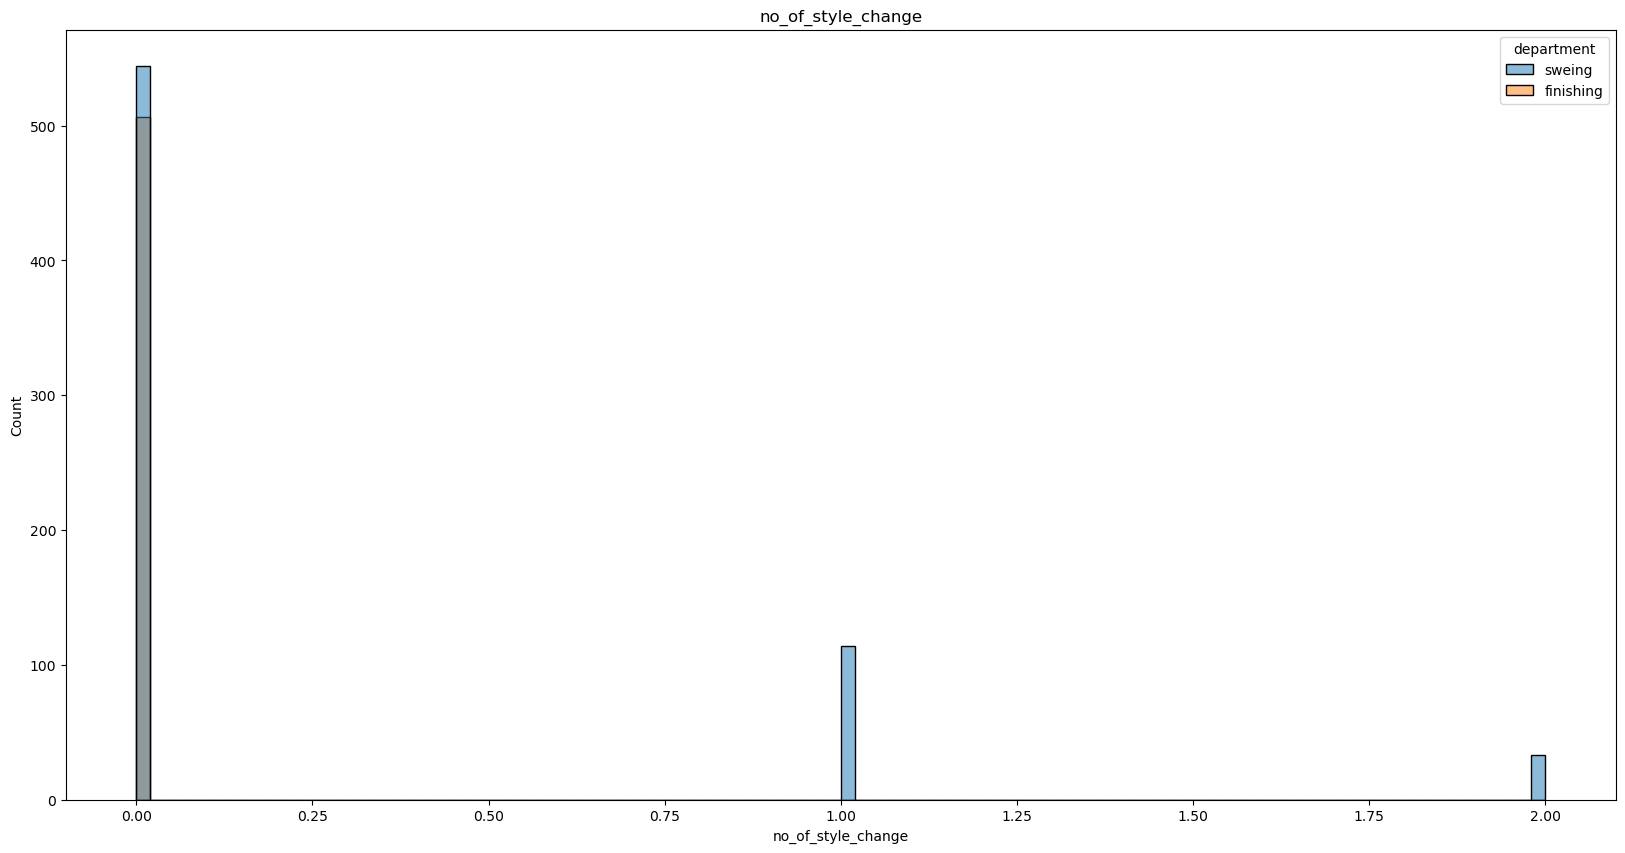

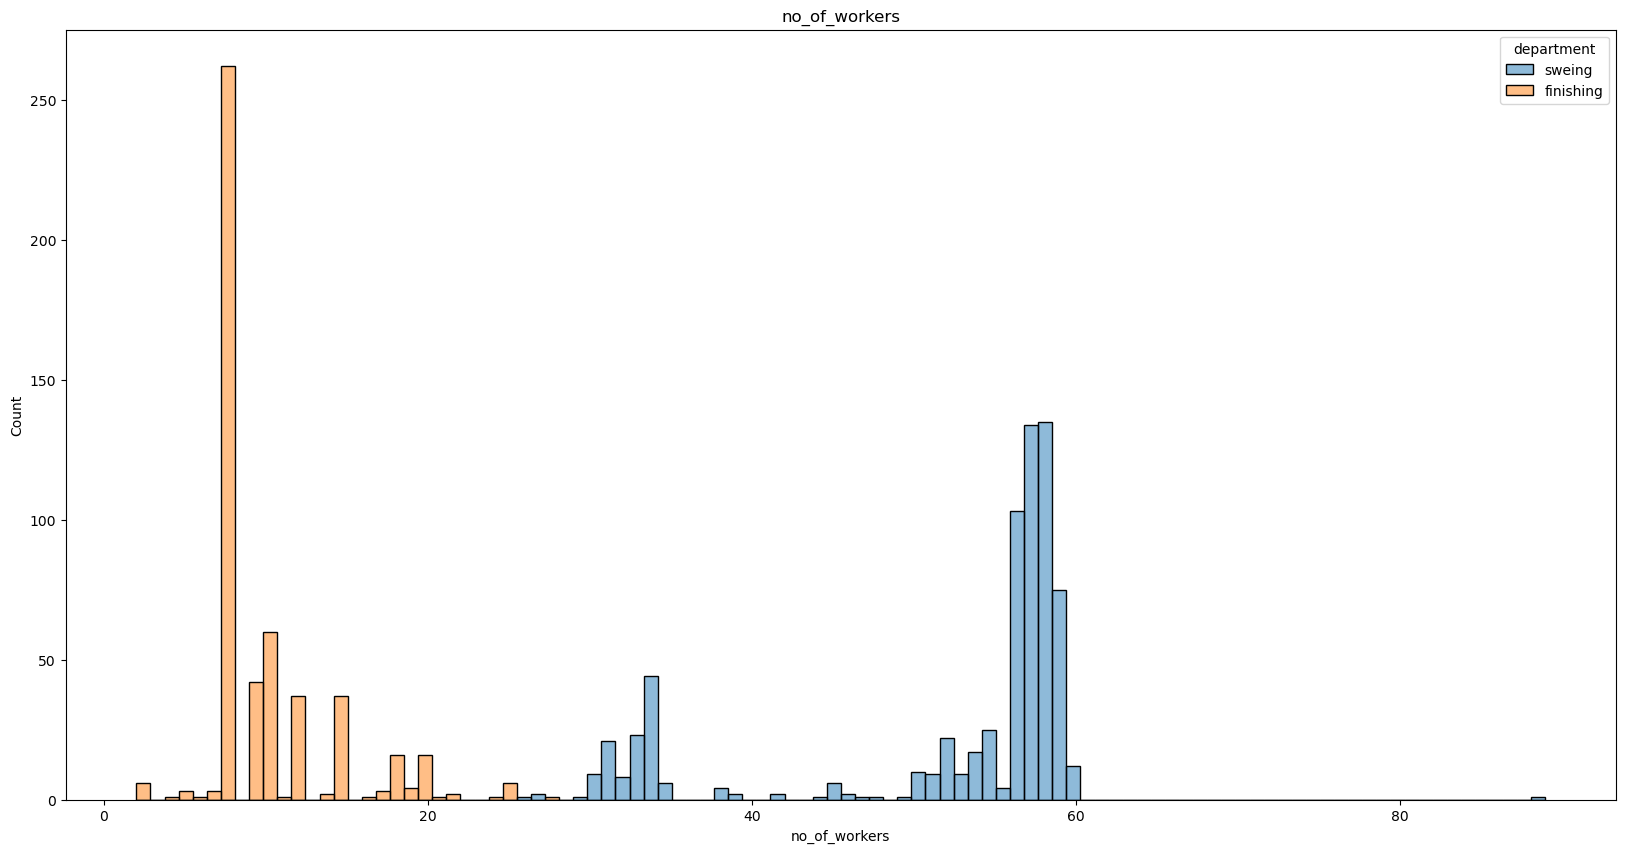

In [17]:
for i, num_col in enumerate(numerical_features):
    plt.figure(figsize=(20, 10))
    sns.histplot(x=num_col, hue='department', data=X, bins=100)
    plt.title(num_col)
    plt.show()

<p><b>1) 'finishing' department has constant zero value in some features above. And distributions of target and other features in 'sweing' and 'finishing' departments are quite different. This means that it would be useful to use two models for each department and remove features above from those part of the dataframe where department is 'finishing' (because they don't have any influence on target).</b></p>
<p><b>2) 'smv' in 'finishing' department is much less than in 'sweing' department. The same situation with 'no_of_workers', 'over_time'</b></p>
<p><b>3) 'incentive' is 0 almost everywhere in 'finishing' department (except 10 observations)</b></p>

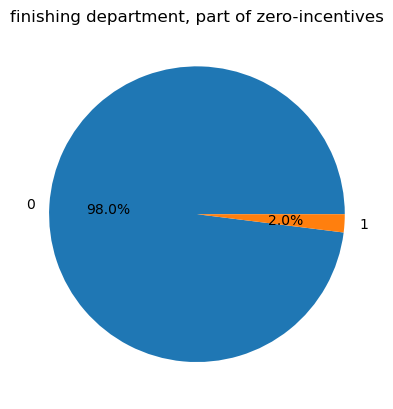

In [18]:
X_finishing = X[X['department'] == 'finishing']
X_finishing_incentive = (X_finishing['incentive'] != 0).astype(int)
plt.pie(X_finishing_incentive.value_counts(), labels=X_finishing_incentive.unique(), autopct='%1.1f%%')
plt.title('finishing department, part of zero-incentives')
plt.show()

# Numerical features distributions

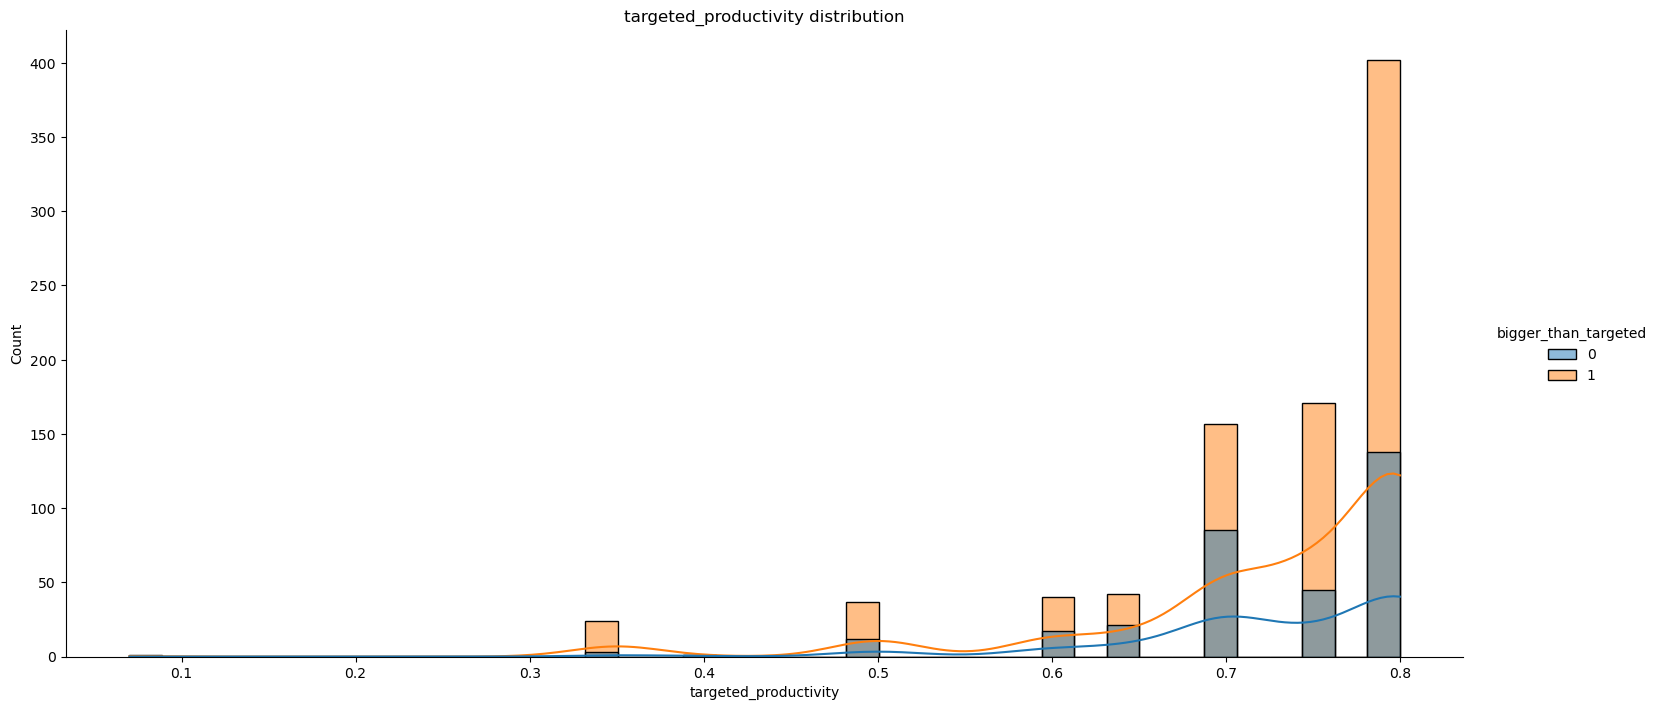

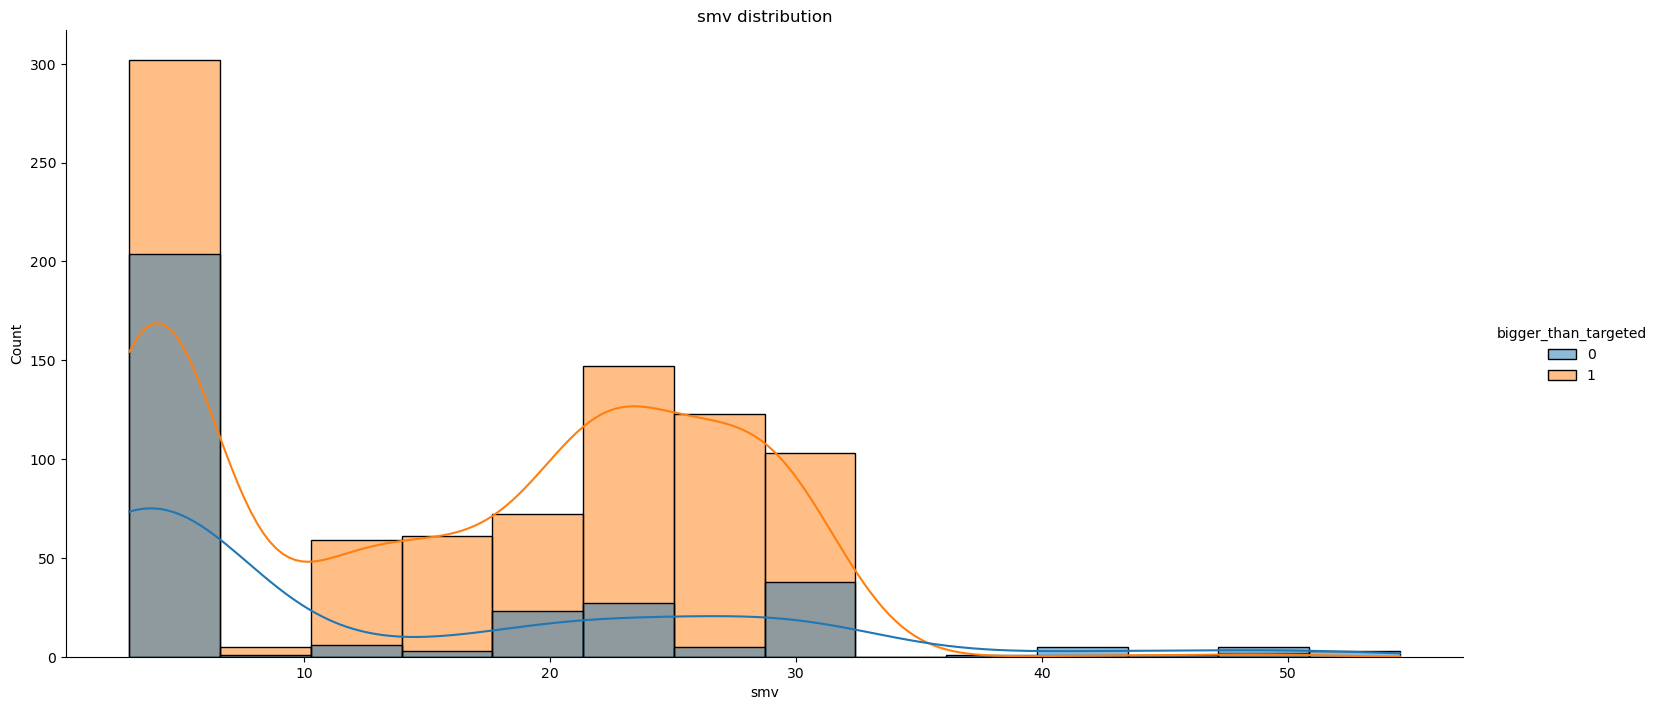

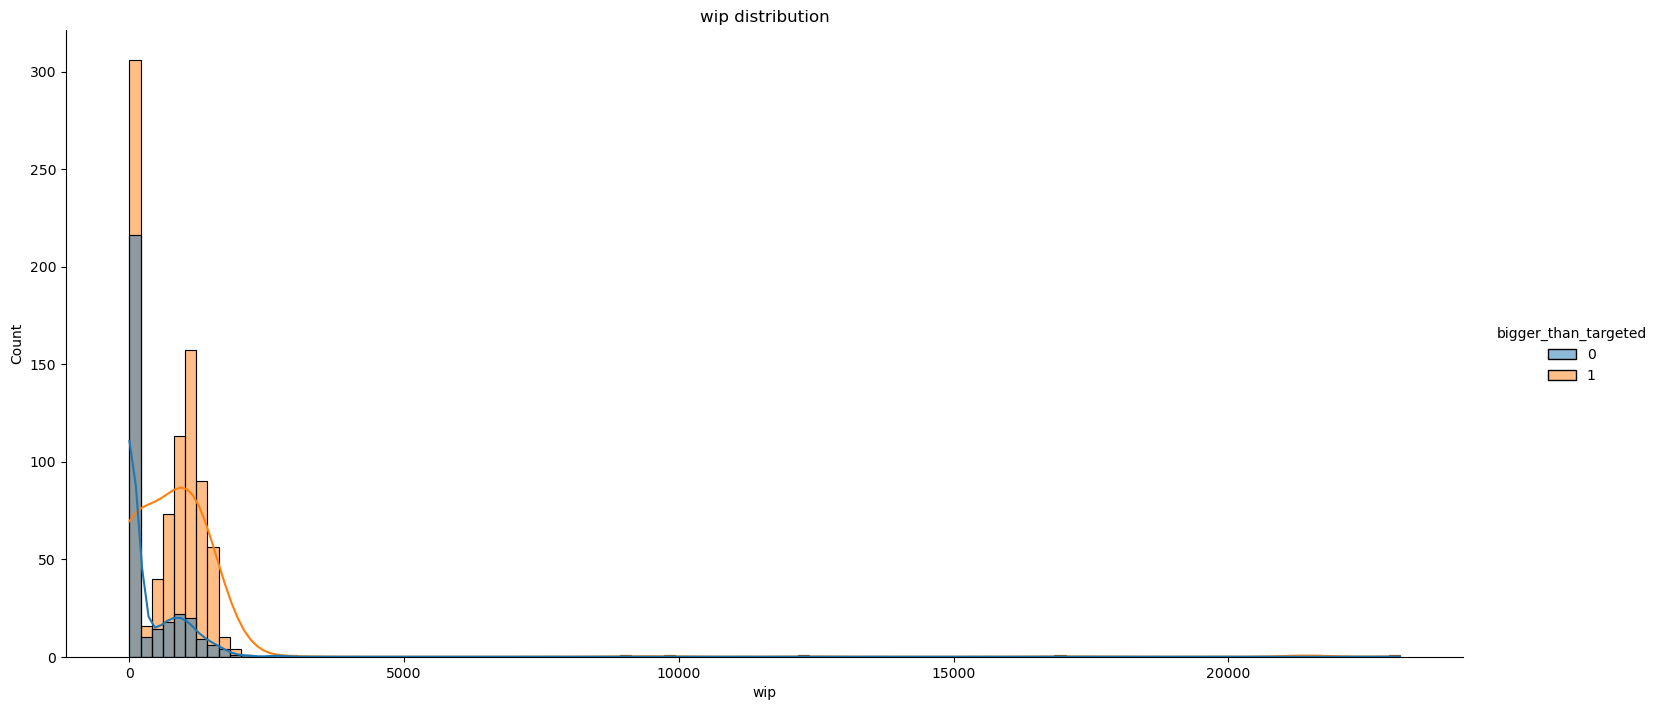

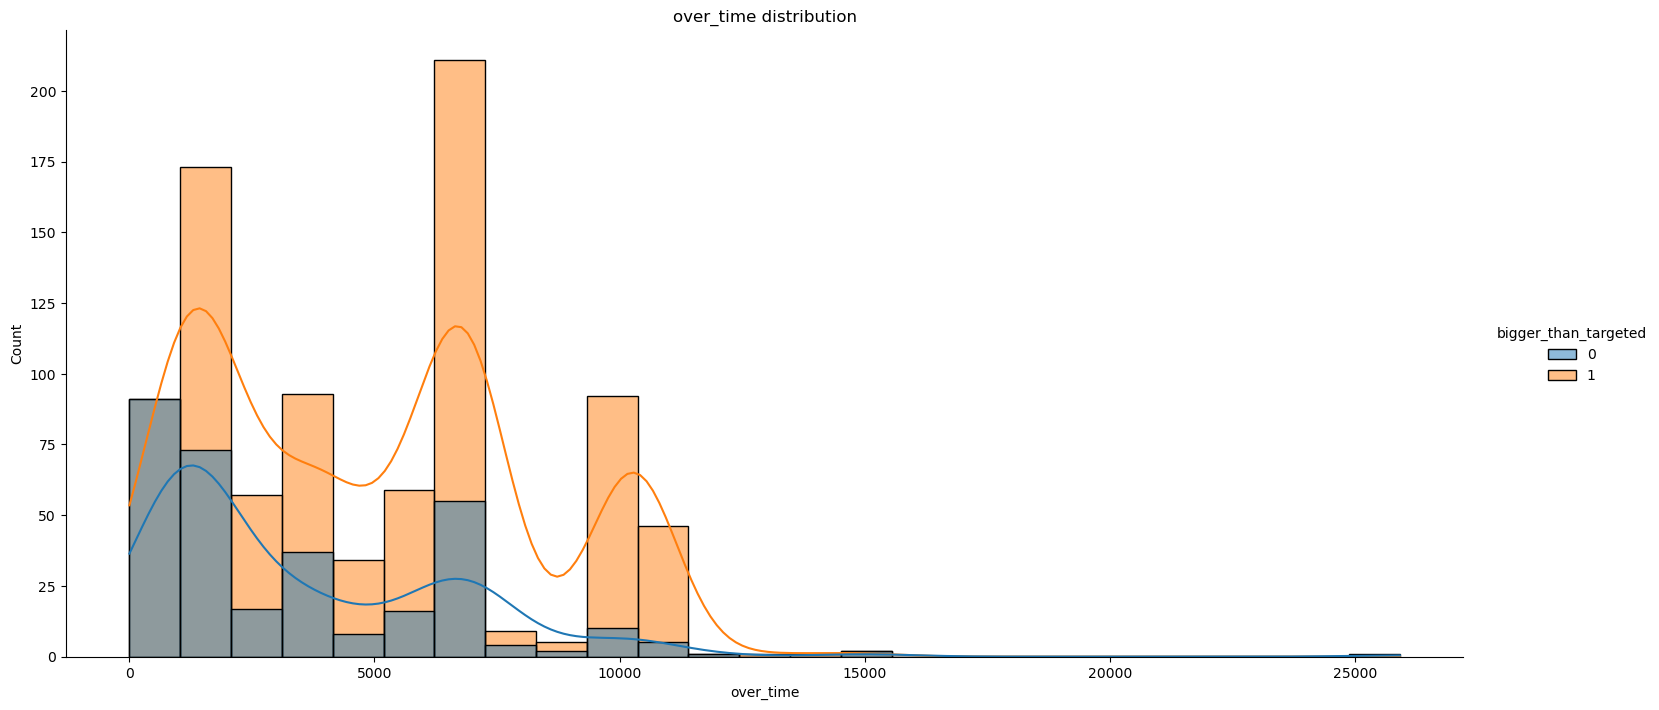

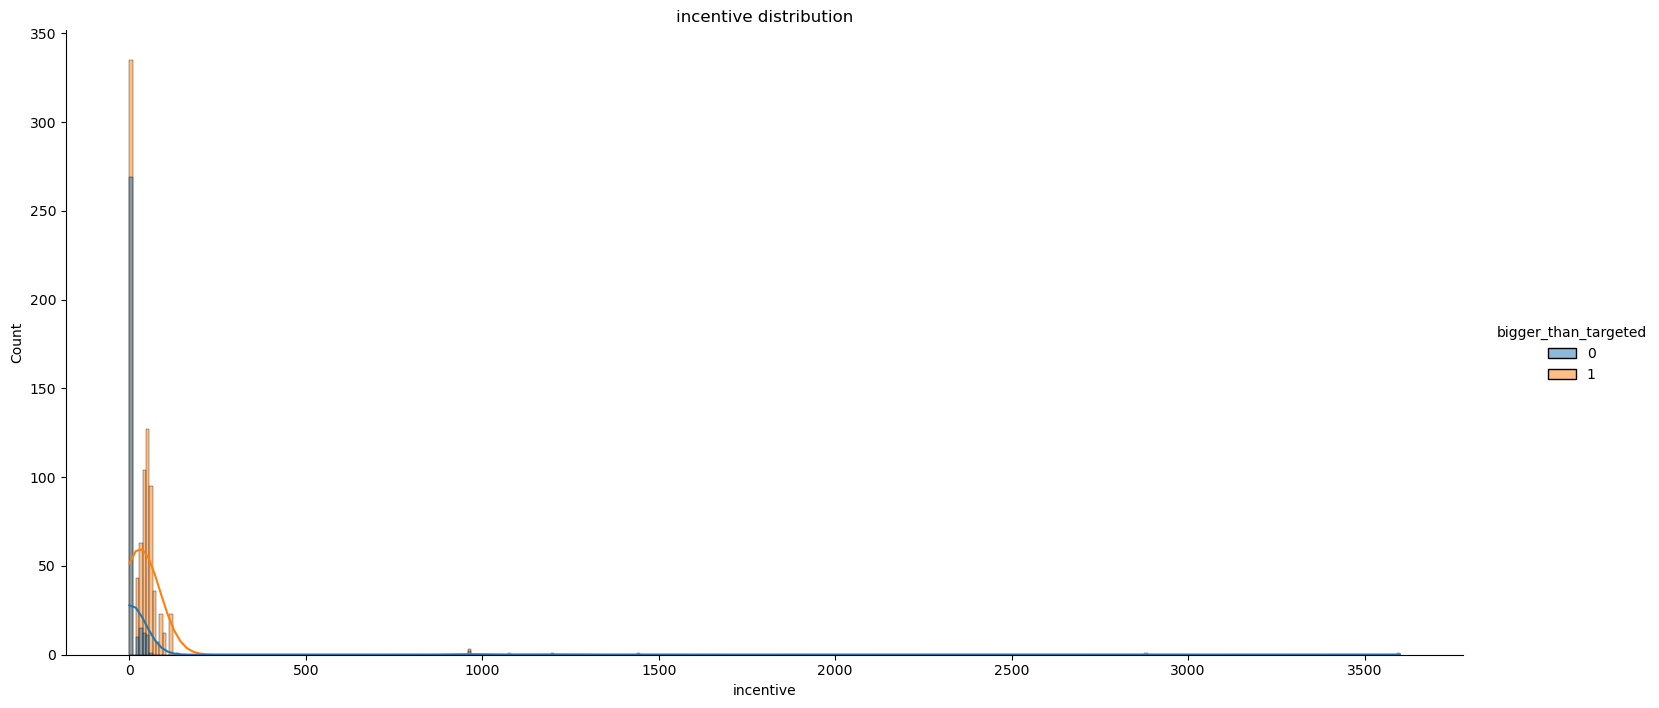

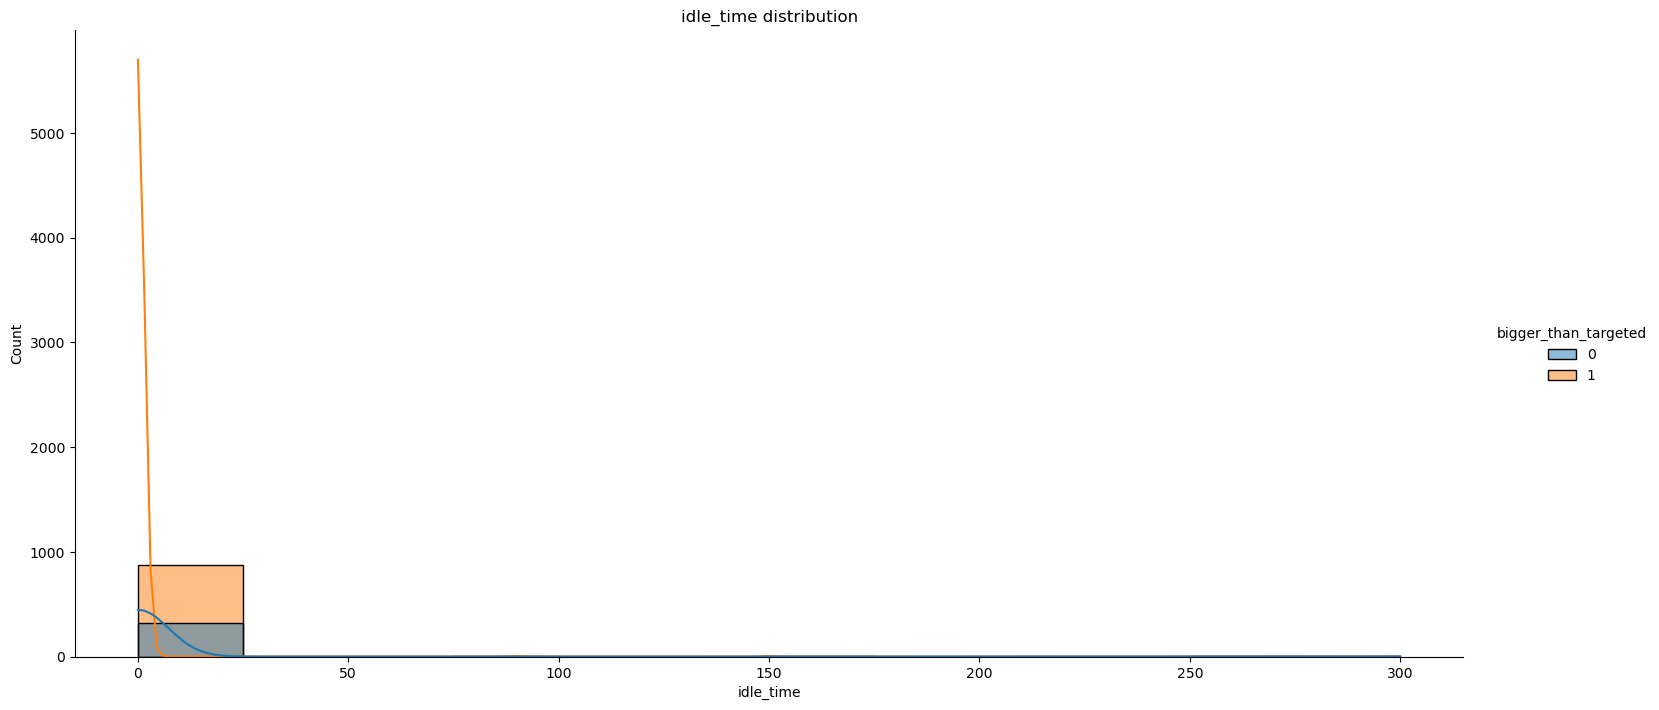

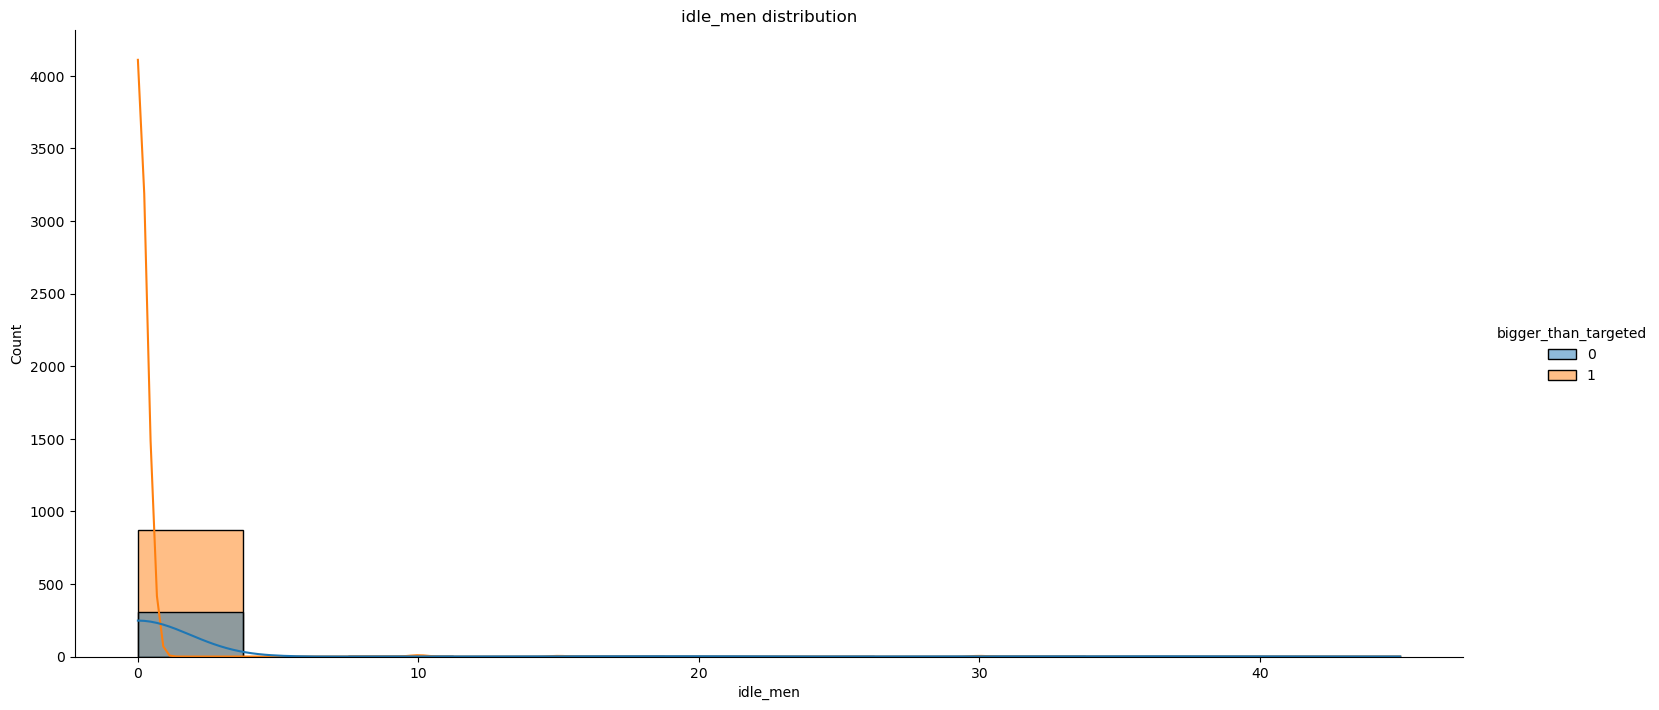

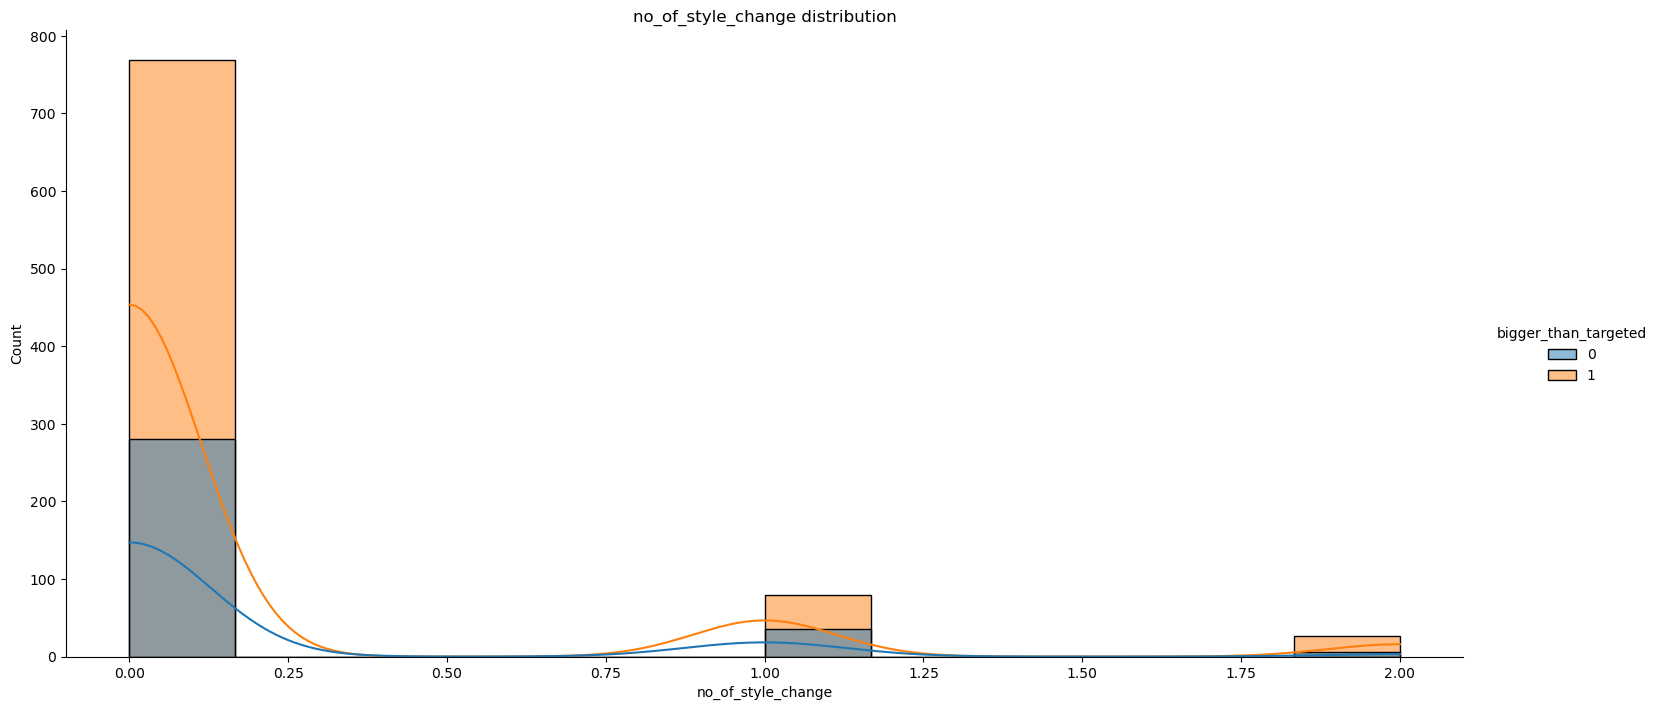

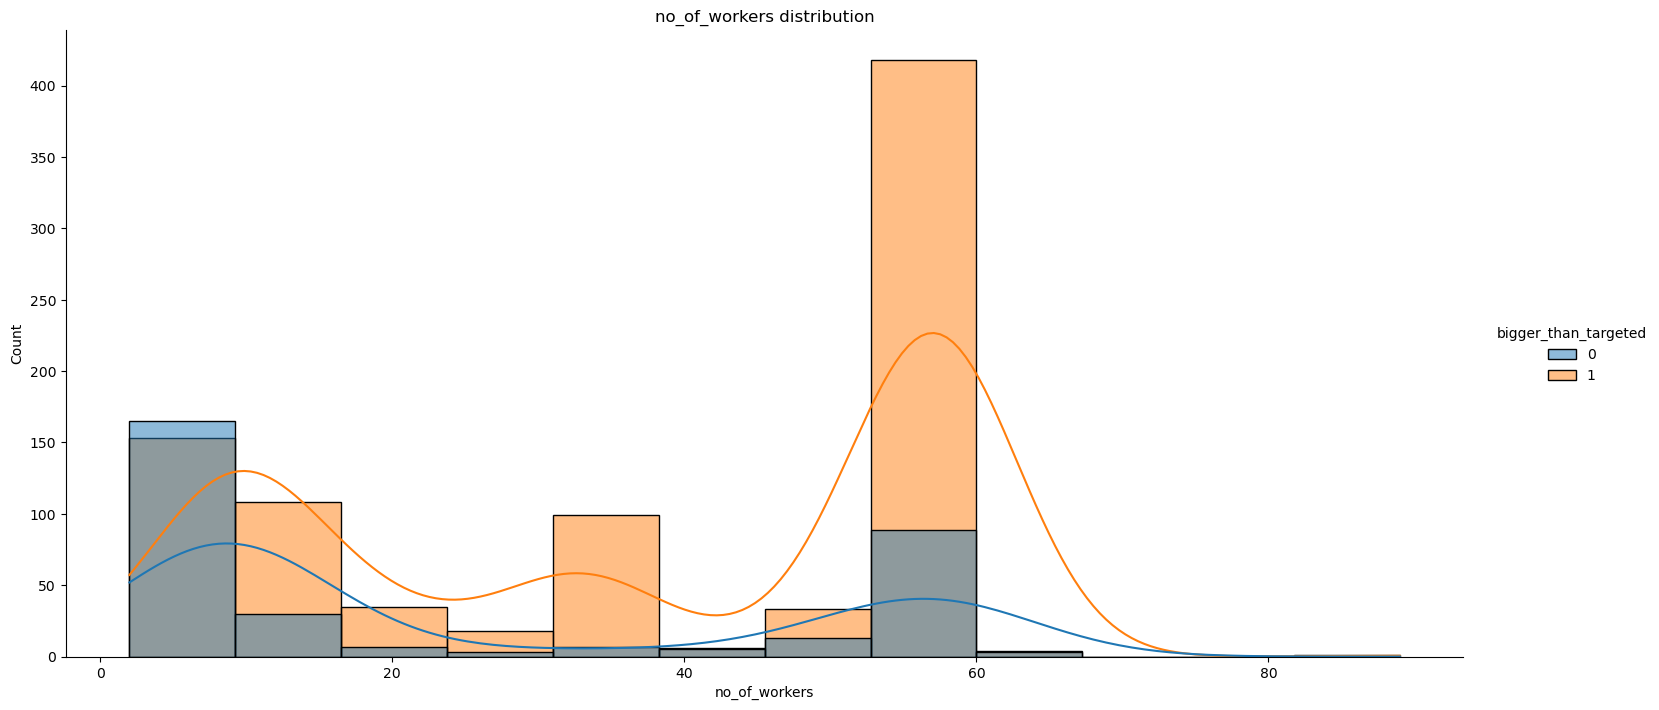

In [19]:
for i, num_col in enumerate(numerical_features):
    sns.displot(x=X[num_col], hue=X['bigger_than_targeted'], alpha=0.5, kde=True, height=7.0, aspect=15.0/7.0)
    plt.title(f'{num_col} distribution')
    plt.show()

<p><b>1) 'target productivity': mostly between 0.7 and 0.8</b></p>
<p><b>2) 'wip': is equal to 0 in 'finishing' department; has similar to normal distribution in 'sweing' department.</b></p>
<p><b>3) 'incentive': a number of negative target class decreases with increasing 'incentive' value.</b></p>
<p><b>4) 'idle_time' and 'idle_men' are almost constant-value features with some outliers.</b></p>
<p><b>5) 'no_of_style_change' has mostly 0-value.</b></p>

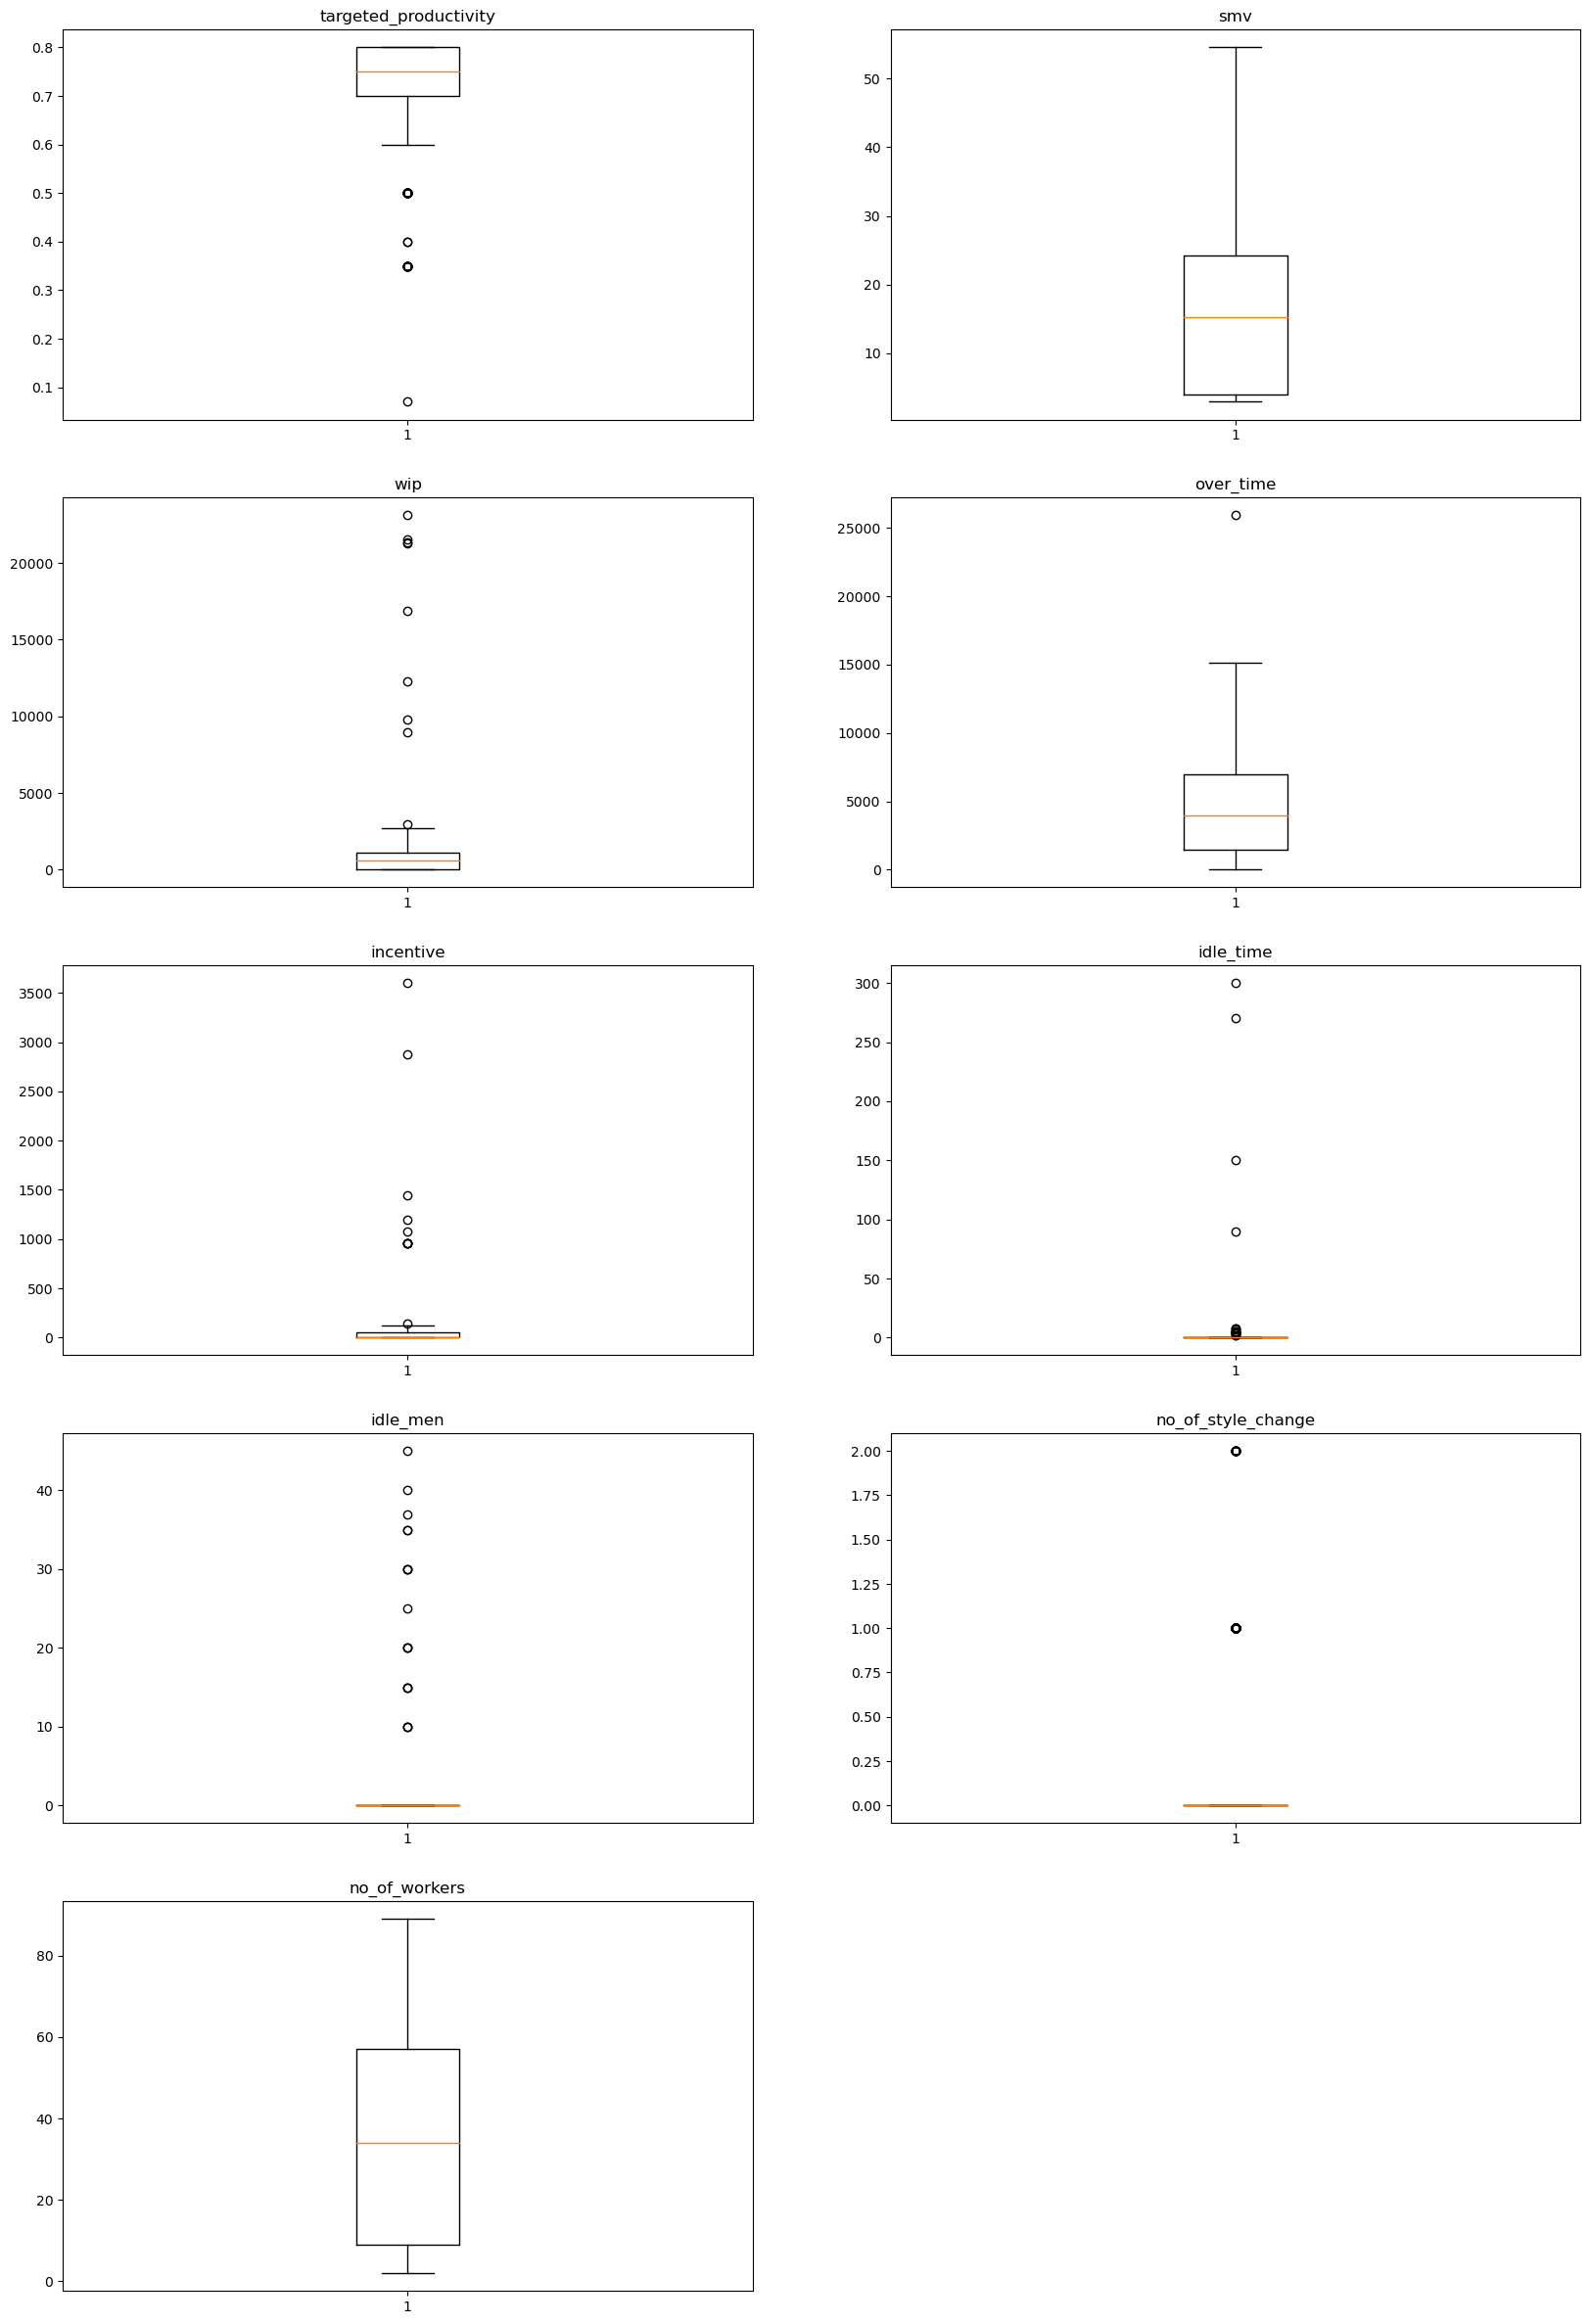

In [20]:
plt.figure(figsize=(20, 30))
for i, num_col in enumerate(numerical_features):
    plt.subplot(5, 2, i + 1)
    plt.boxplot(X[num_col])
    plt.title(num_col)

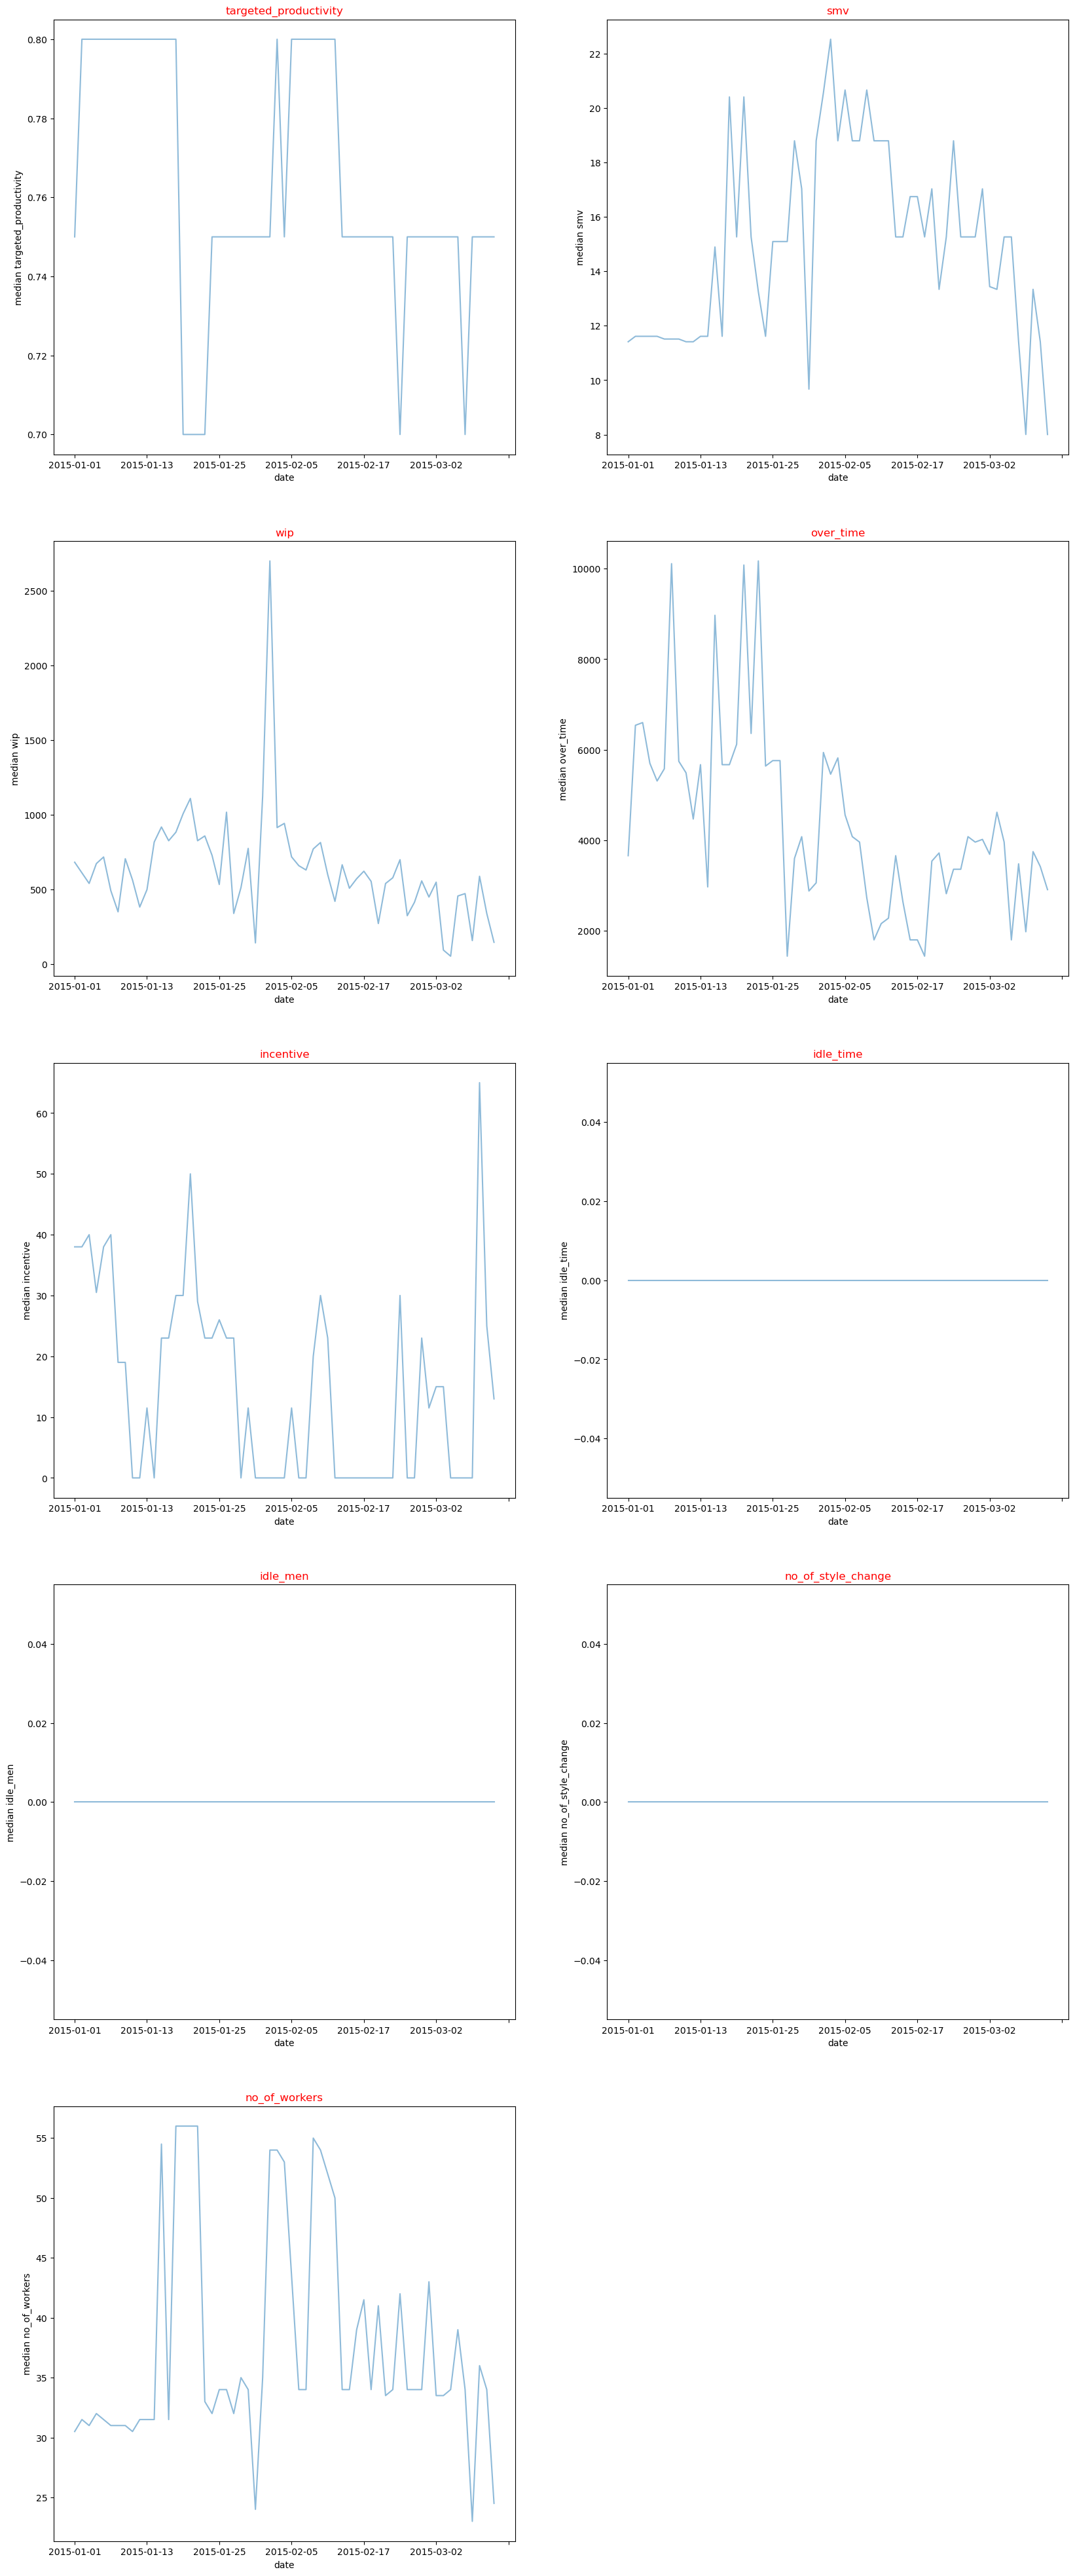

In [21]:
plt.figure(figsize=(20, 50))
for i, num_col in enumerate(numerical_features):
    plt.subplot(5, 2, i + 1)
    average_sales = X.groupby('date')[num_col].median()
    plt.ylabel(f'median {num_col}')
    ax = average_sales.plot(alpha=0.5)
    plt.title(num_col, color='red')

<p><b>As we can see, 'smv', 'wip' and 'no_of_workers' values decrease over the last month.</b></p>

### 'wip' anomaly

In [22]:
X[X['date'] == '2015-02-02']

date   quarter department     day  team  targeted_productivity  \
561  2015-02-02  Quarter1     sweing  Monday     1                   0.80   
562  2015-02-02  Quarter1  finishing  Monday     9                   0.75   
563  2015-02-02  Quarter1     sweing  Monday     2                   0.80   
564  2015-02-02  Quarter1     sweing  Monday     3                   0.80   
565  2015-02-02  Quarter1     sweing  Monday    10                   0.80   
566  2015-02-02  Quarter1  finishing  Monday    10                   0.80   
567  2015-02-02  Quarter1  finishing  Monday     4                   0.80   
568  2015-02-02  Quarter1     sweing  Monday    12                   0.80   
569  2015-02-02  Quarter1     sweing  Monday     4                   0.80   
570  2015-02-02  Quarter1     sweing  Monday     9                   0.75   
571  2015-02-02  Quarter1  finishing  Monday    12                   0.75   
572  2015-02-02  Quarter1     sweing  Monday    11                   0.70   
573  2015-02-02  Quarter1     sweing  Monday     6                   0.70   
574  2015-02-02  Quarter1  finishing  Monday     8                   0.65   
575  2015-02-02  Quarter1  finishing  Monday     1                   0.75   
576  2015-02-02  Quarter1     sweing  Monday     5                   0.50   
577  2015-02-02  Quarter1     sweing  Monday     7                   0.70   
578  2015-02-02  Quarter1  finishing  Monday     6                   0.60   
579  2015-02-02  Quarter1     sweing  Monday     8                   0.65   

       smv      wip  over_time  incentive  idle_time  idle_men  \
561  22.94  16882.0       7020        113        0.0         0   
562   3.94      0.0        960          0        0.0         0   
563  22.52  21385.0       7020         88        0.0         0   
564  22.52  21266.0       6840         70        0.0         0   
565  22.52  21540.0       6720         88        0.0         0   
566   3.94      0.0       1200          0        0.0         0   
567   4.30      0.0       1440          0        0.0         0   
568  15.26  12261.0       3600         63        0.0         0   
569  22.52  23122.0       5940         50        0.0         0   
570  29.12   8992.0       6960         55        0.0         0   
571   4.08      0.0       1080          0        0.0         0   
572  20.55   9792.0       6480         60        0.0         0   
573  18.79   2984.0       3960         30        0.0         0   
574   4.15      0.0        960          0        0.0         0   
575   3.94      0.0       2280          0        0.0         0   
576  30.10    839.0       6960          0        0.0         0   
577  24.26   2698.0       6720          0        0.0         0   
578   2.90      0.0       1200          0        0.0         0   
579  24.26   1435.0       6600          0        0.0         0   

     no_of_style_change  no_of_workers  bigger_than_targeted  
561                   0           58.5                     1  
562                   0            8.0                     1  
563                   0           58.5                     1  
564                   0           57.0                     1  
565                   0           56.0                     1  
566                   0           10.0                     1  
567                   0           12.0                     1  
568                   0           35.0                     1  
569                   0           56.5                     1  
570                   0           58.0                     1  
571                   0            9.0                     0  
572                   0           54.0                     1  
573                   0           33.0                     1  
574                   0            8.0                     0  
575                   0           19.0                     0  
576                   0           58.0                     1  
577                   0           56.0                     0  
578            

### 'incentive' anomaly

In [23]:
X[X['date'] == '2015-03-09']

date   quarter department     day  team  targeted_productivity  \
1128  2015-03-09  Quarter2  finishing  Monday    11                   0.80   
1129  2015-03-09  Quarter2  finishing  Monday    12                   0.80   
1130  2015-03-09  Quarter2  finishing  Monday     5                   0.60   
1131  2015-03-09  Quarter2     sweing  Monday     4                   0.75   
1132  2015-03-09  Quarter2     sweing  Monday     1                   0.75   
1133  2015-03-09  Quarter2  finishing  Monday     9                   0.75   
1134  2015-03-09  Quarter2     sweing  Monday     3                   0.80   
1135  2015-03-09  Quarter2     sweing  Monday    12                   0.80   
1136  2015-03-09  Quarter2     sweing  Monday    11                   0.80   
1137  2015-03-09  Quarter2  finishing  Monday     3                   0.80   
1138  2015-03-09  Quarter2  finishing  Monday     4                   0.75   
1139  2015-03-09  Quarter2  finishing  Monday     1                   0.75   
1140  2015-03-09  Quarter2     sweing  Monday     9                   0.75   
1141  2015-03-09  Quarter2     sweing  Monday     2                   0.70   
1142  2015-03-09  Quarter2     sweing  Monday    10                   0.70   
1143  2015-03-09  Quarter2  finishing  Monday     2                   0.70   
1144  2015-03-09  Quarter2     sweing  Monday     6                   0.65   
1145  2015-03-09  Quarter2     sweing  Monday     8                   0.65   
1146  2015-03-09  Quarter2     sweing  Monday     5                   0.60   
1147  2015-03-09  Quarter2     sweing  Monday     7                   0.50   
1148  2015-03-09  Quarter2  finishing  Monday    10                   0.70   
1149  2015-03-09  Quarter2  finishing  Monday     8                   0.65   

        smv     wip  over_time  incentive  idle_time  idle_men  \
1128   2.90     0.0          0        960        0.0         0   
1129   4.60     0.0          0       1080        0.0         0   
1130   3.94     0.0          0       2880        0.0         0   
1131  26.82  1079.0       7020         65        0.0         0   
1132  26.82  1322.0       7140         65        0.0         0   
1133   2.90     0.0          0       3600        0.0         0   
1134  30.10   964.0       5160         50        0.0         0   
1135  15.26  1132.0       4080         63        0.0         0   
1136  11.41   357.0       3420         50        0.0         0   
1137   4.60     0.0          0       1440        0.0         0   
1138   3.94     0.0          0        960        0.0         0   
1139   3.94     0.0          0        960        0.0         0   
1140  18.79  1193.0       6240         45        0.0         0   
1141  16.10   817.0       5520         30        0.0         0   
1142  21.82  1576.0       6000         30        0.0         0   
1143   3.90     0.0          0       1200        0.0         0   
1144  23.41  1262.0       4560         35        0.0         0   
1145  30.48   953.0       6720         26        0.0         0   
1146  26.82   919.0       7080         23        0.0         0   
1147  30.48  1161.0       6600          0        0.0         0   
1148   2.90     0.0          0        960        0.0         0   
1149   3.90     0.0          0        960        0.0         0   

      no_of_style_change  no_of_workers  bigger_than_targeted  
1128                   0            8.0                     1  
1129                   0            9.0                     1  
1130                   0           12.0                     1  
1131                   0           58.0                     1  
1132                   0           59.0                     1  
1133                   0           15.0                     1  
1134                   1           58.0                     1  
1135                   0           34.0                     1  
1136                   0           58.0                     1  
1137                   0           12.0                   

<p><b>We don't have enough information to understand such big values in 'wip' and 'incentive'</b></p>

### Best and worst teams and their connection with 'incentive'

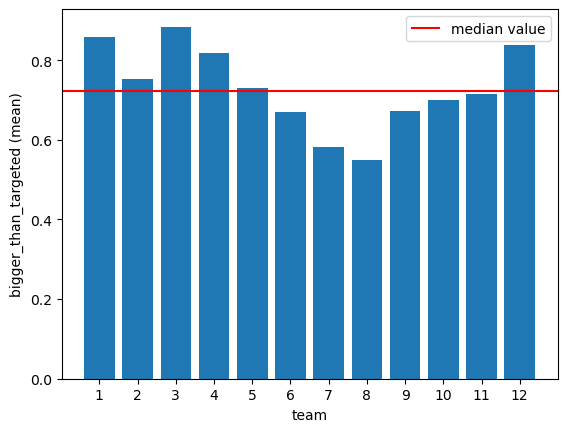

In [24]:
plt.axhline(np.median(X.groupby('team')['bigger_than_targeted'].mean()), color='red', label='median value')
target_mean = X.groupby('team')['bigger_than_targeted'].mean()
plt.bar(target_mean.index, target_mean.values)
plt.locator_params(axis="x", nbins=len(target_mean.index) + 1)
plt.xlabel('team')
plt.ylabel('bigger_than_targeted (mean)')
plt.legend()
plt.show()

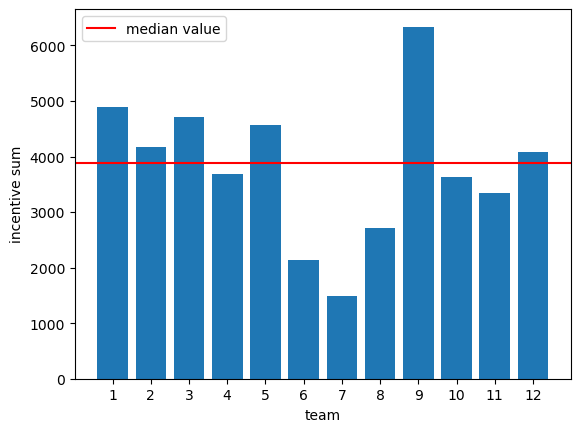

In [25]:
plt.axhline(np.median(X.groupby('team')['incentive'].sum()), color='red', label='median value')
target_mean = X.groupby('team')['incentive'].sum()
plt.bar(target_mean.index, target_mean.values)
plt.locator_params(axis="x", nbins=len(target_mean.index) + 1)
plt.xlabel('team')
plt.ylabel('incentive sum')
plt.legend()
plt.show()

# Dependence on the target

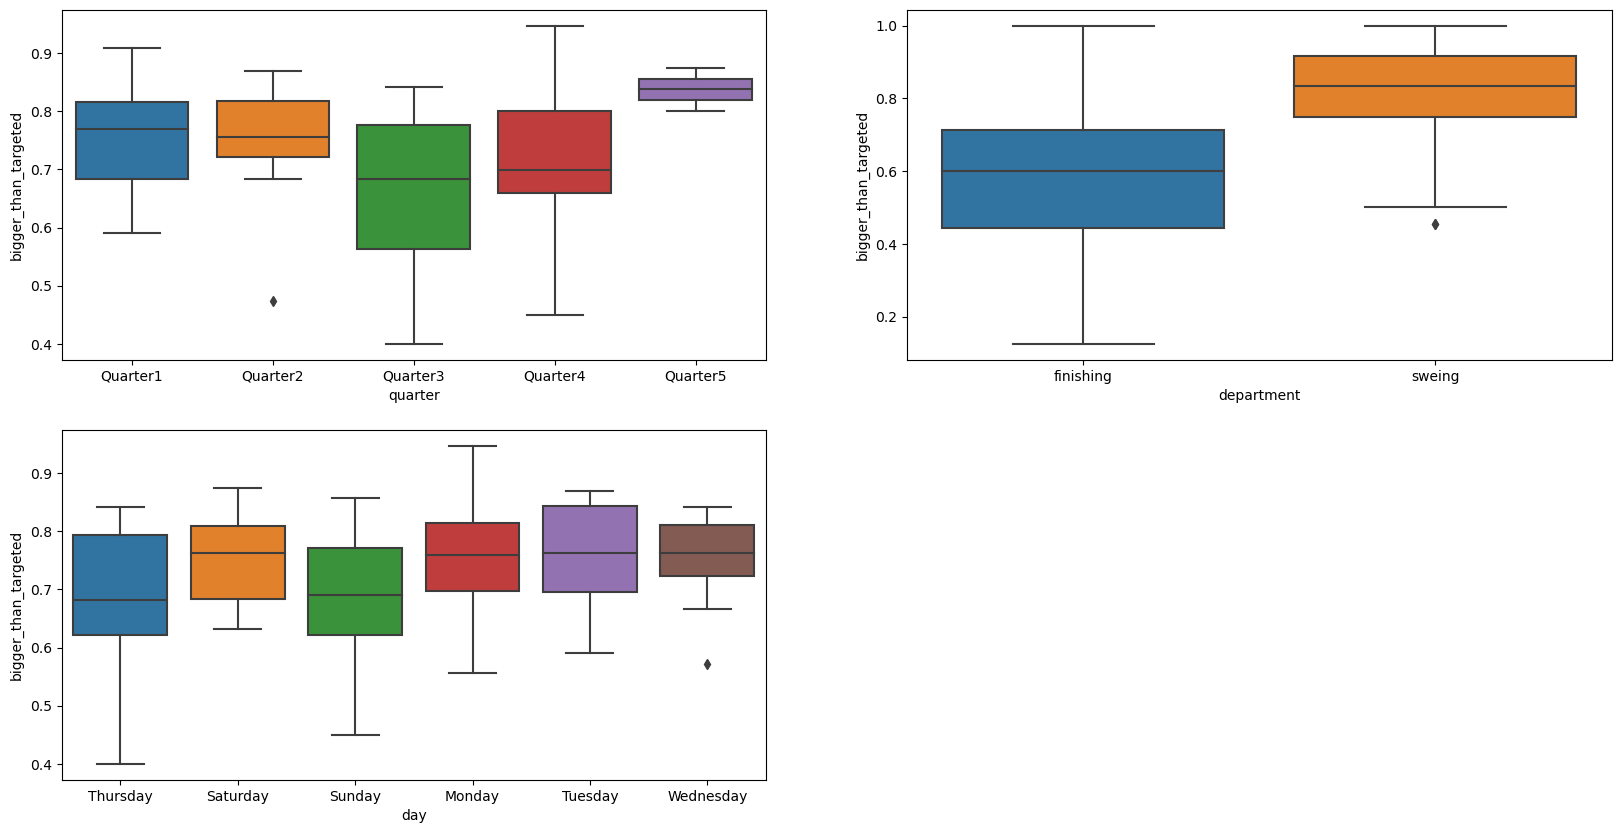

In [26]:
plt.figure(figsize=(20, 10))
for i, cat_col in enumerate([cat_col for cat_col in categorical_features if cat_col != 'team']):
    plt.subplot(2, 2, i + 1)
    X_grouped = X.groupby(['date', cat_col], as_index=False).agg({'bigger_than_targeted':'mean'})
    sns.boxplot(x=cat_col, y='bigger_than_targeted', data=X_grouped)

<p><b>1) 'quarter': the best productivity refers to Quarter5, whereas the worst productivity refers to Quarter3, Quarter4.</b></p>
<p><b>2) 'department': 'sweing' department shows a lot better productivity than 'finishing' department.</b></p>
<p><b>3) 'day': the worst days are Thursday and Sunday.</b></p>
<p><b>Plots above and below also prove these facts.</b></p>

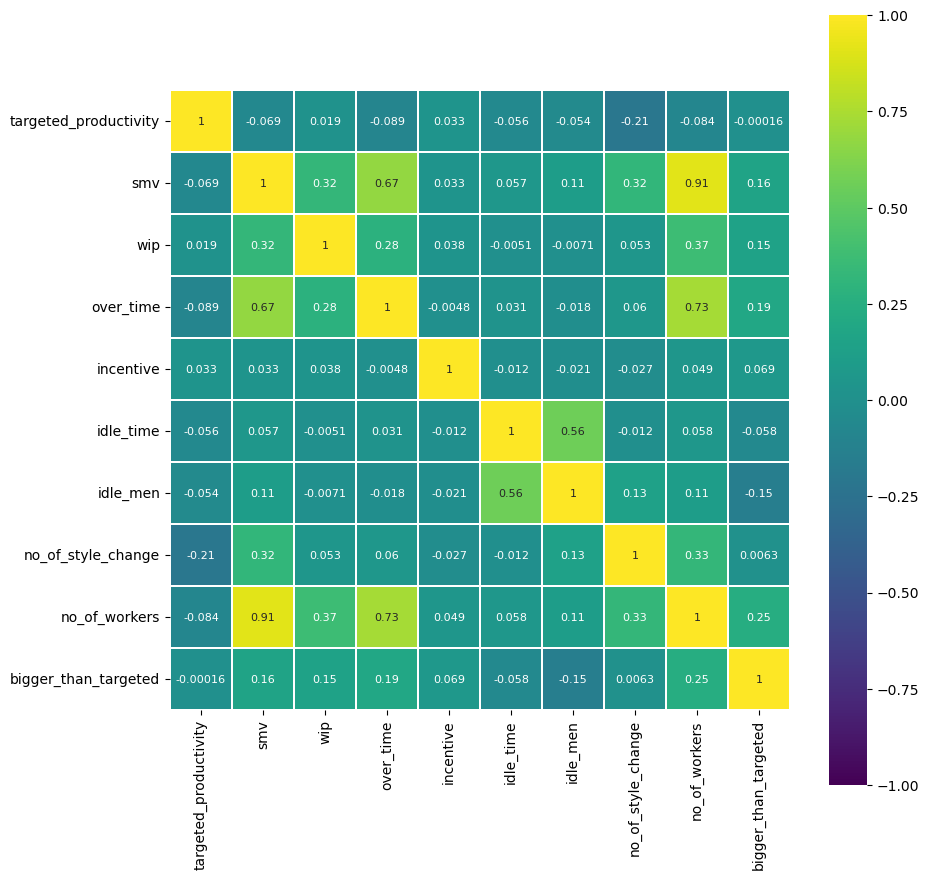

In [27]:
corr = X.loc[:, numerical_features_and_target].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(data=corr, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.show()

<p><b>1) Standard minute value (smv) has strong correlation with no_of_workers. It seems logical: the longer the work takes, the more workers are needed. It also correlates well with 'over_time' which is also seems to be logical.</b></p>
<p><b>2) The same logic can describe good correlation between 'idle_time' and 'idle_men'; 'wip' and 'over_time'.</b></p>
<p><b>3) None of the features correlates well with the target. We can notice small positive correlation with 'no_of_workers', 'over_time' and negative correlation with 'idle_men', what is logical.</b></p>
<p><b>4) It is strange that 'incentive' feature has very small correlation with the target. Probably it will make sense to consider large incentives separately.</b></p>

<Figure size 2000x2000 with 0 Axes>

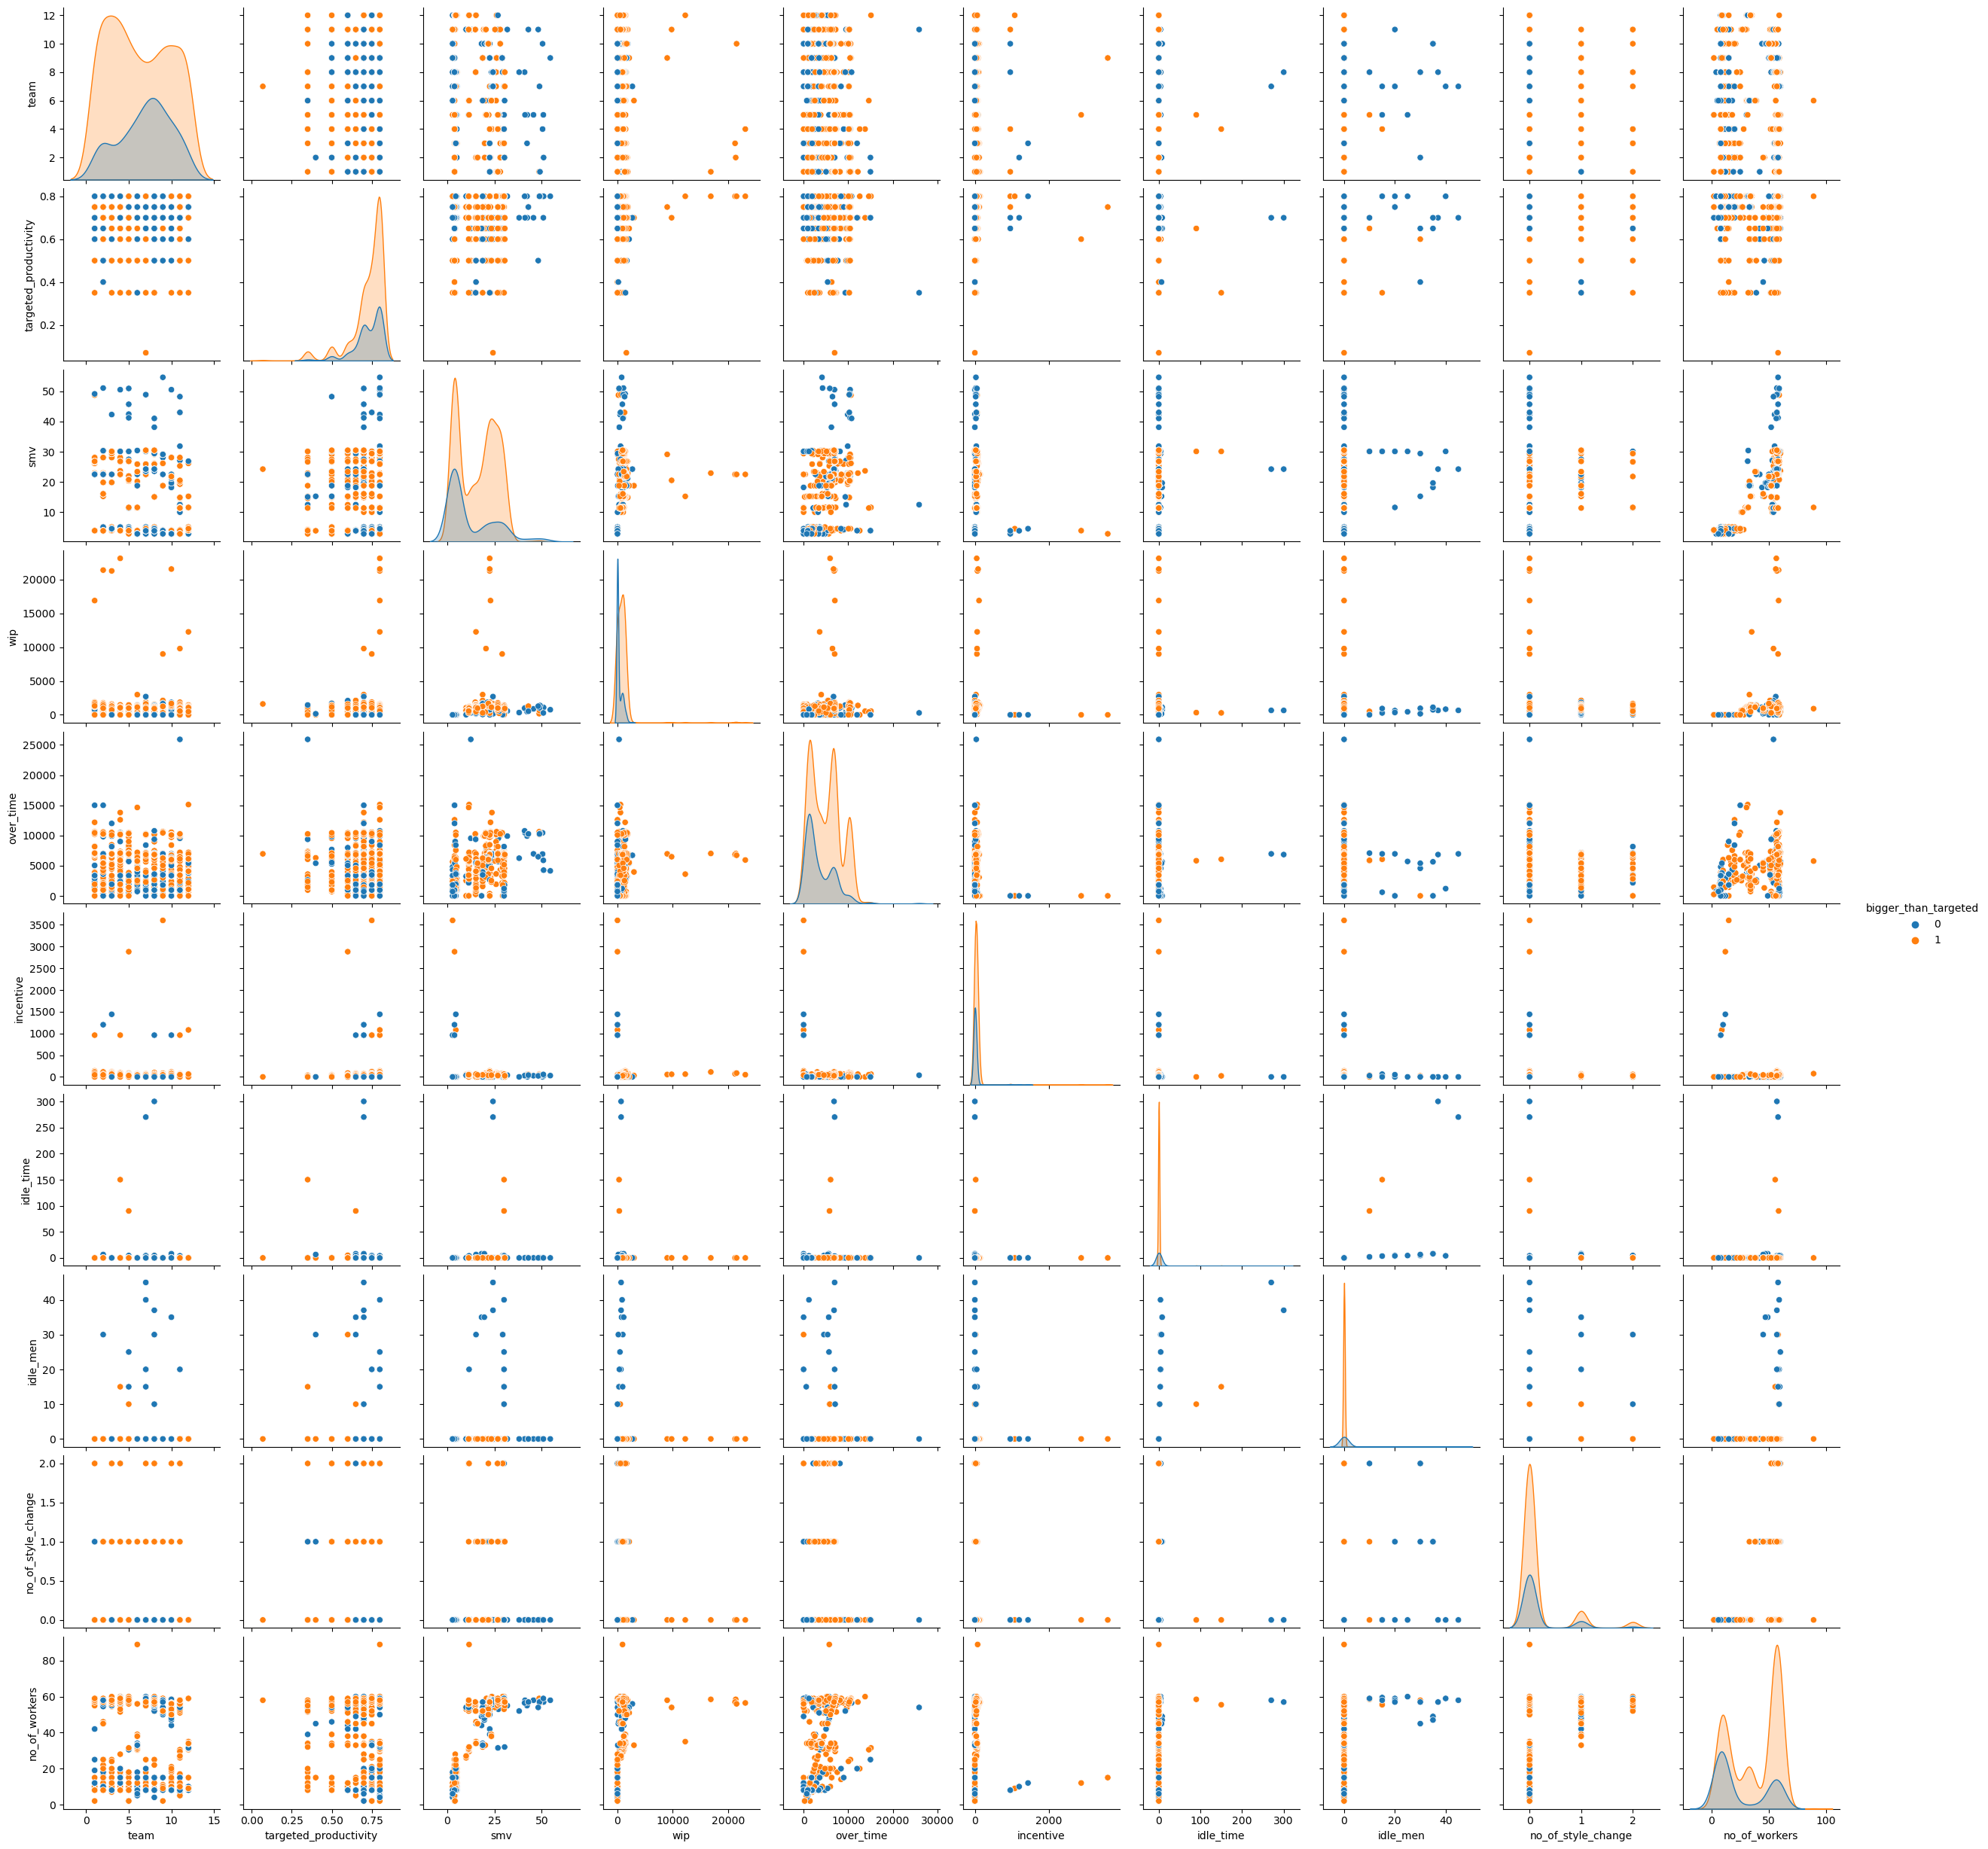

In [28]:
plt.figure(figsize=(20, 20))
sns.pairplot(data=X, hue='bigger_than_targeted')
plt.show()

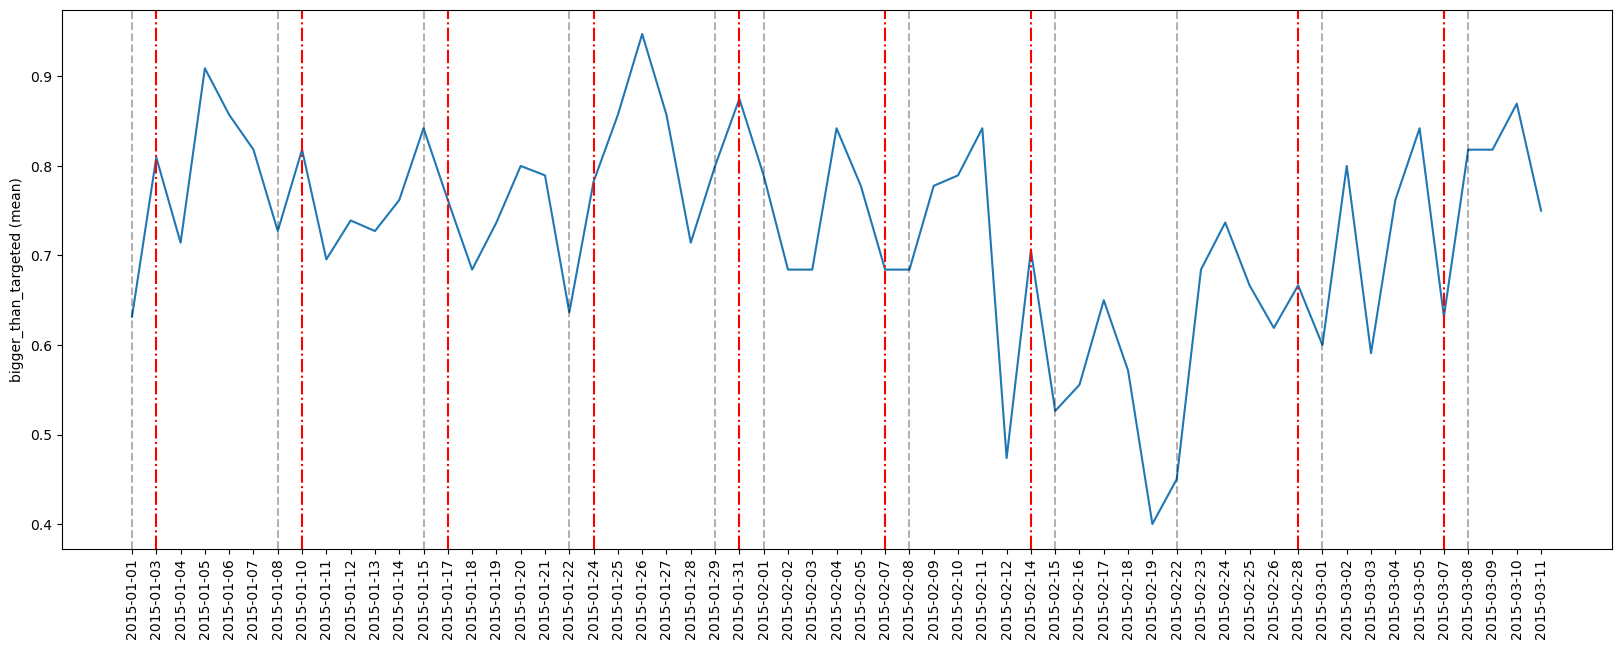

In [29]:
plt.figure(figsize=(20, 7))
plt.xticks(rotation='vertical')
plt.plot(X.groupby('date')['bigger_than_targeted'].mean())
plt.ylabel('bigger_than_targeted (mean)')
for current_day in X['date'].unique():
    if X[X['date'] == current_day]['day'].unique()[0] == 'Saturday':
        plt.axvline(x=current_day, color='red', linestyle='-.', alpha=1)
X_copy = X.copy()
X_copy['date'] = pd.to_datetime(X_copy['date'])
X_copy_quarters = X_copy.groupby([X_copy['date'].dt.month, 'quarter']).agg({'date': 'first'})
for date in X_copy_quarters['date'].unique():
    plt.axvline(x=str(date)[:10], color='black', linestyle='--', alpha=0.3)

<p><b>There is no week pattern in the target</b></p>

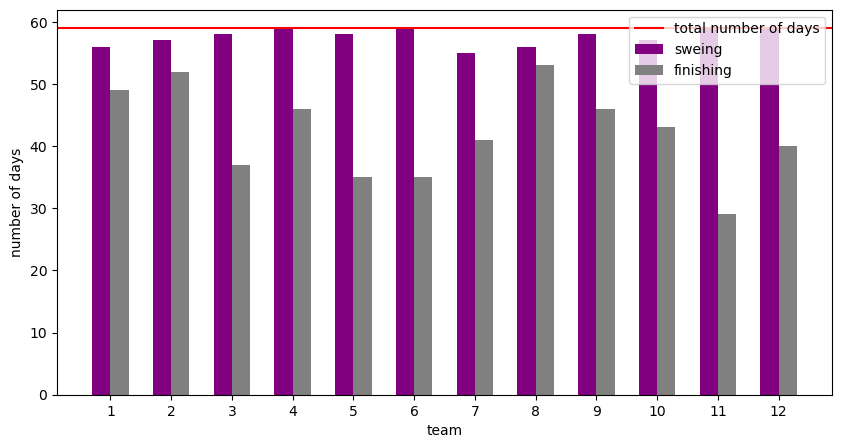

In [30]:
X_finishing = X[X['department'] == 'finishing']
X_sweing = X[X['department'] == 'sweing']

ind = np.arange(1, 13)
width = 0.3

plt.figure(figsize=(10, 5))
plt.bar(ind, X_sweing.groupby(['team'])['date'].count().values, width, color='purple', label='sweing')
plt.bar(ind + width, X_finishing.groupby(['team'])['date'].count().values, width, color='gray', label='finishing')
plt.xticks(ind + width / 2, np.sort(X['team'].unique()))
plt.xlabel('team')
plt.ylabel('number of days')
plt.axhline(X['date'].nunique(), color='red', label='total number of days')
plt.legend()
plt.show()

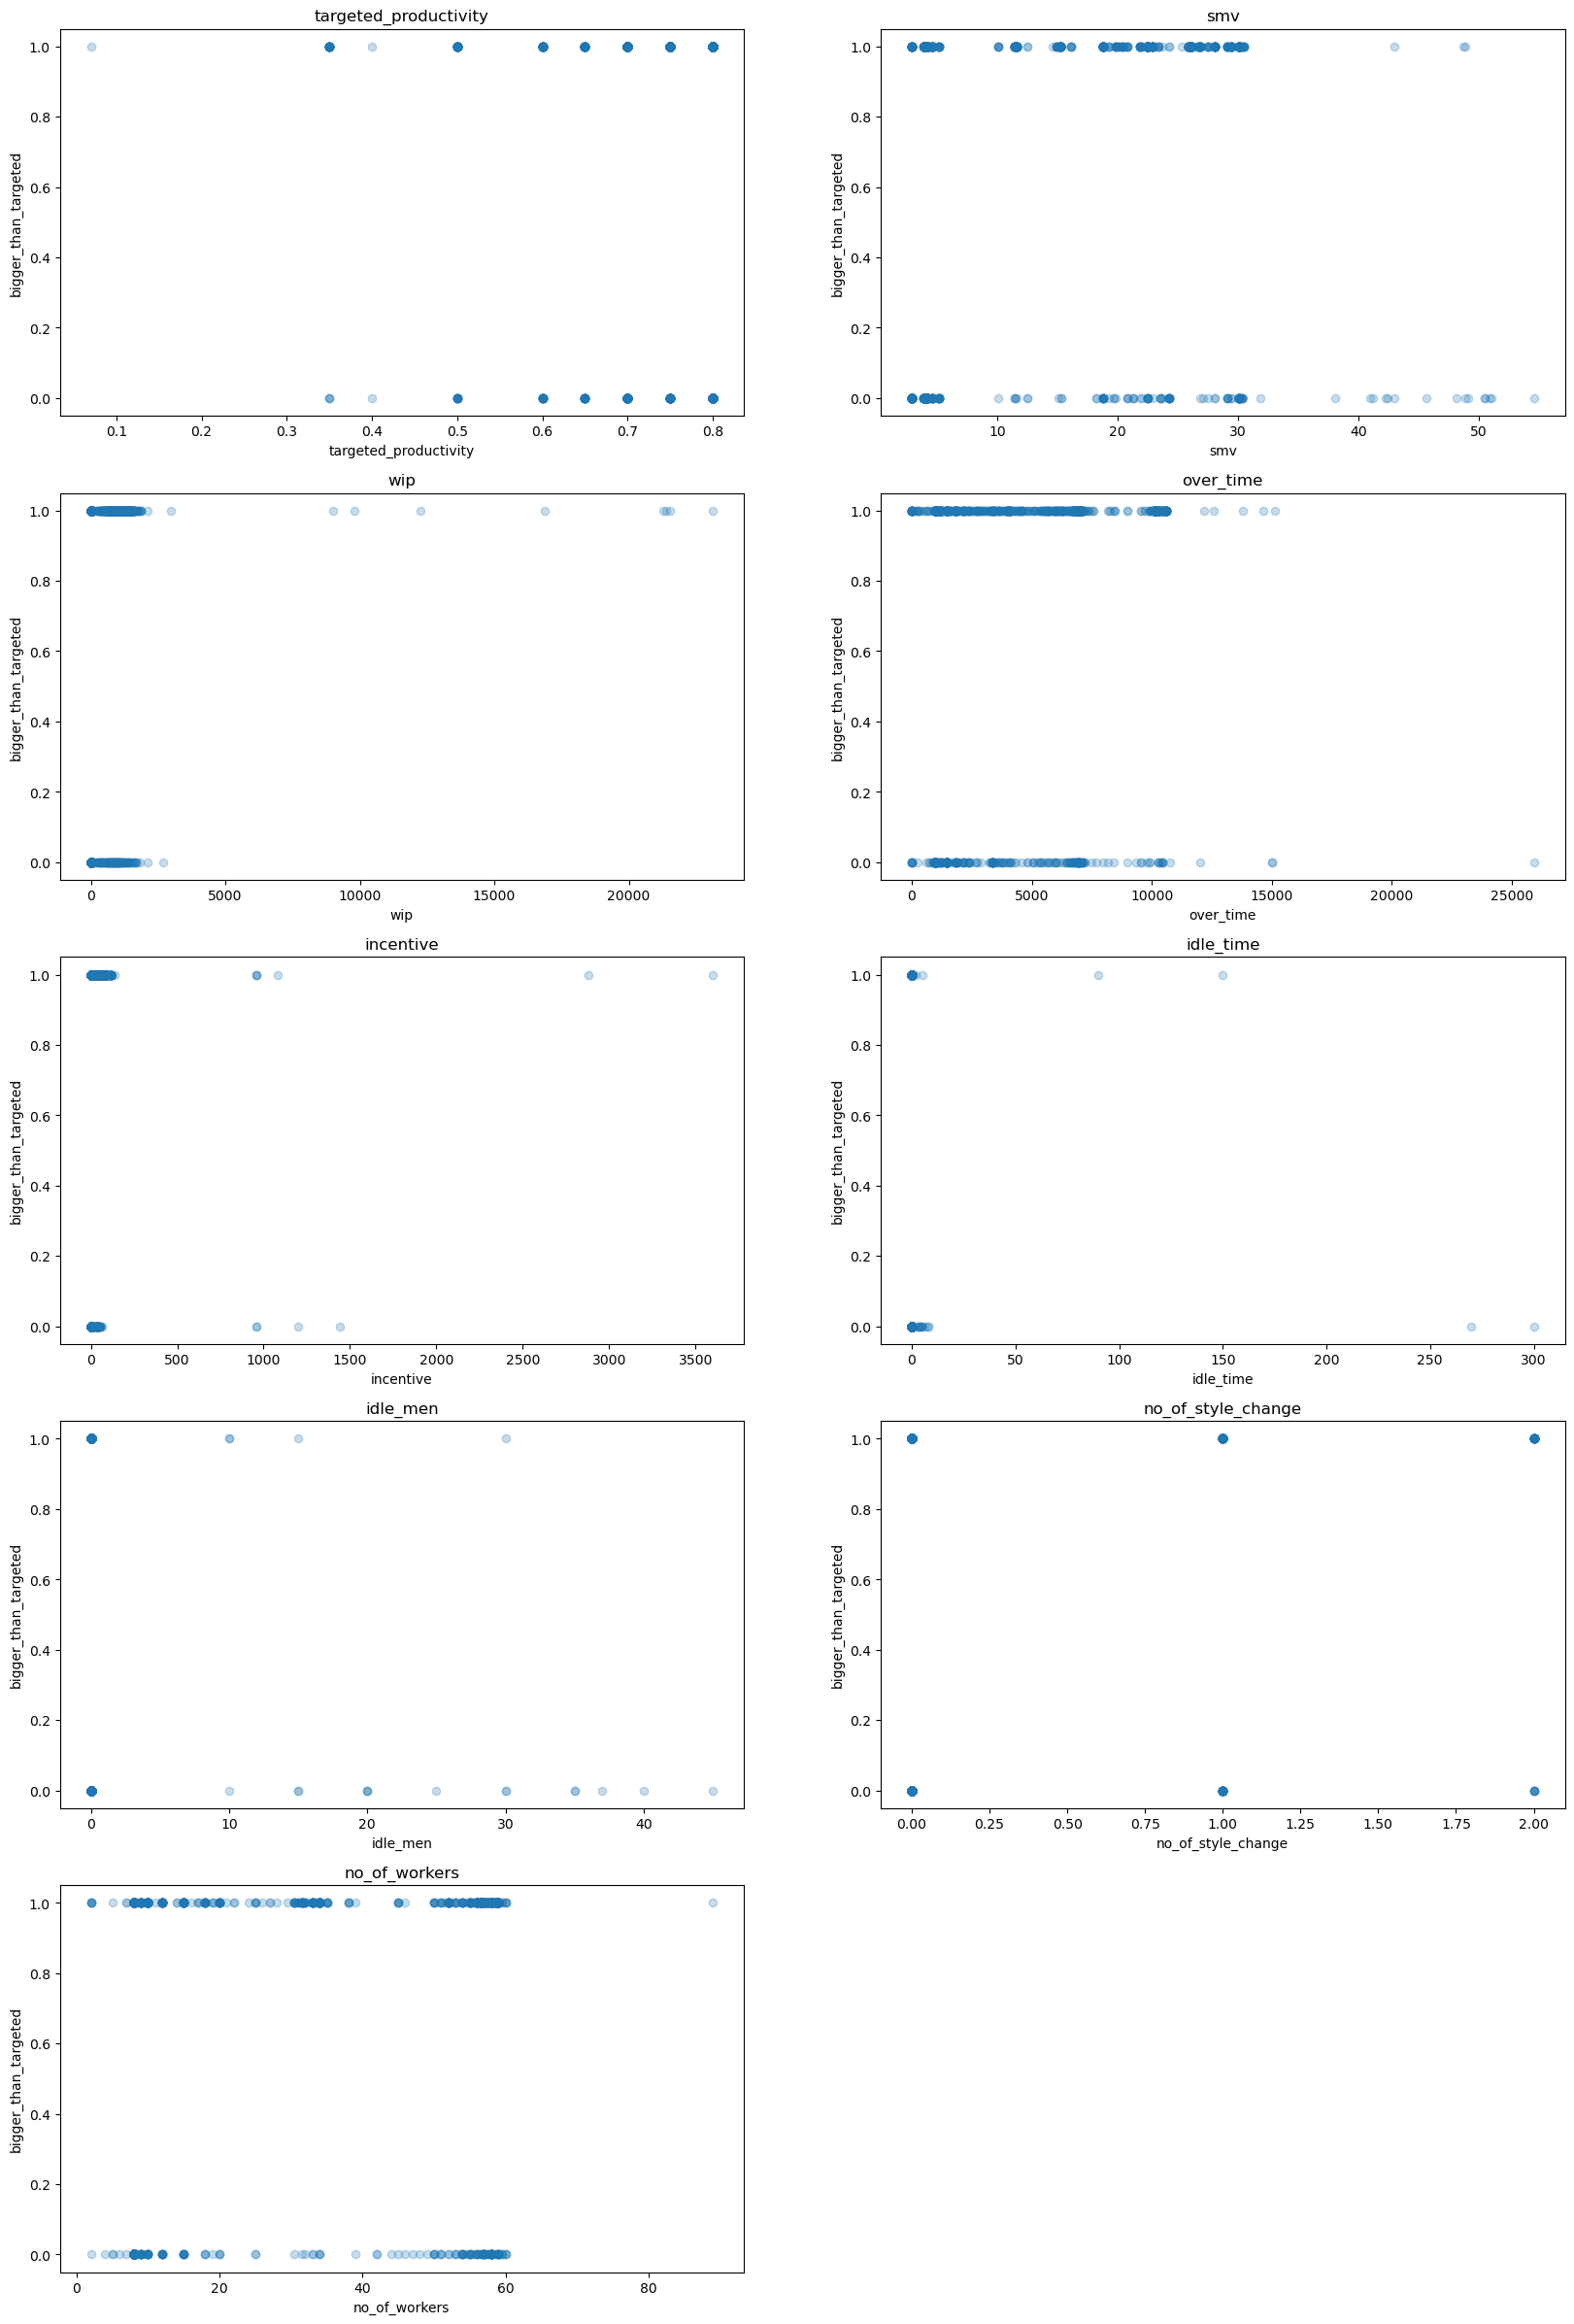

In [31]:
plt.figure(figsize=(20, 30))
for i, num_col in enumerate(col for col in numerical_features):
    plt.subplot(5, 2, i + 1)
    plt.xlabel(num_col)
    plt.ylabel('bigger_than_targeted')
    plt.scatter(x=num_col, y='bigger_than_targeted', data=X, alpha=0.25)
    plt.title(num_col)

<p><b>1) There become more 0-values with higher smv (30 and more)</b></p>

### Understanding some feature's influence on target

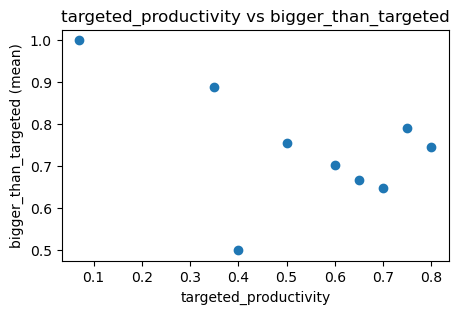

In [32]:
mean_targeted_productivity = X.groupby('targeted_productivity')['bigger_than_targeted'].mean()
plt.figure(figsize=(5, 3))
plt.scatter(mean_targeted_productivity.index, mean_targeted_productivity.values)
plt.xlabel('targeted_productivity')
plt.ylabel('bigger_than_targeted (mean)')
plt.title('targeted_productivity vs bigger_than_targeted')
plt.show()

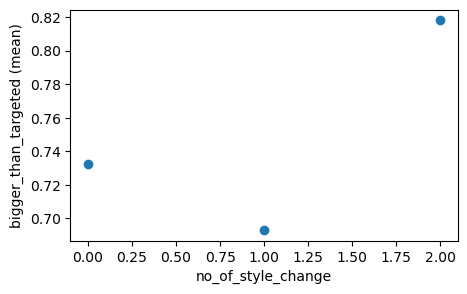

In [33]:
no_of_style_change = X.groupby('no_of_style_change')['bigger_than_targeted'].mean()
plt.figure(figsize=(5, 3))
plt.scatter(no_of_style_change.index, no_of_style_change.values)
plt.xlabel('no_of_style_change')
plt.ylabel('bigger_than_targeted (mean)')
plt.show()

In [34]:
print(f'zero_incentive \n{X[X["incentive"] == 0]["bigger_than_targeted"].value_counts()} \n{X[X["incentive"] == 0]["bigger_than_targeted"].mean()} \n')
print(f'nonzero_incentive \n{X[X["incentive"] > 0]["bigger_than_targeted"].value_counts()} \n{X[X["incentive"] > 0]["bigger_than_targeted"].mean()} \n')
print(f'high_incentive \n{X[X["incentive"] > 50]["bigger_than_targeted"].value_counts()} \n{X[X["incentive"] > 50]["bigger_than_targeted"].mean()} \n')

zero_incentive 
1    335
0    269
Name: bigger_than_targeted, dtype: int64 
0.554635761589404 

nonzero_incentive 
1    540
0     53
Name: bigger_than_targeted, dtype: int64 
0.9106239460370995 

high_incentive 
1    223
0      8
Name: bigger_than_targeted, dtype: int64 
0.9653679653679653 



In [35]:
X['no_of_style_change'].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

### Every time series distribution

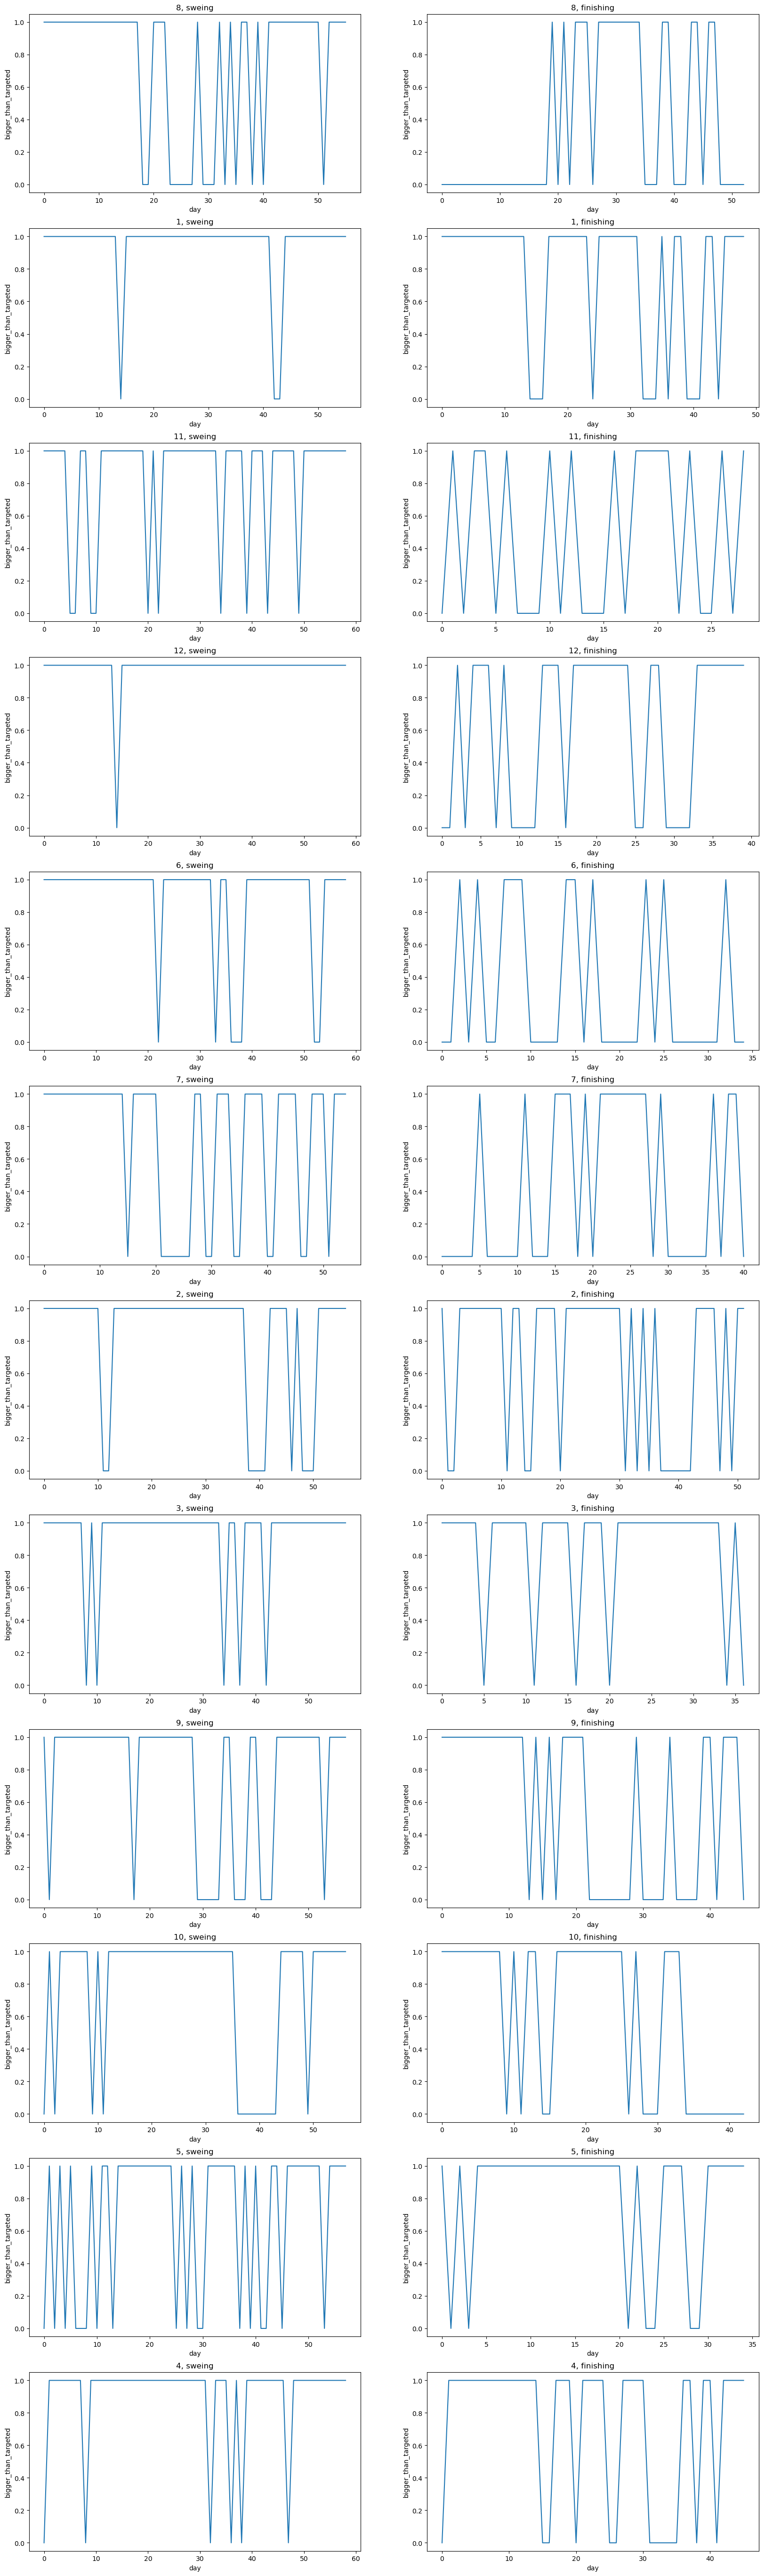

In [36]:
plt.figure(figsize=(20, 70))
for i, team in enumerate(X['team'].unique()):
    plt.subplot(12, 2, 2 * i + 1)
    X_sweing = X[(X['team'] == team) & (X['department'] == 'sweing')].reset_index(drop=True)
    plt.plot(X_sweing['bigger_than_targeted'])
    plt.xlabel('day')
    plt.ylabel('bigger_than_targeted')
    plt.title(f'{team}, sweing')
    
    plt.subplot(12, 2, 2 * i + 2)
    X_finishing = X[(X['team'] == team) & (X['department'] == 'finishing')].reset_index(drop=True)
    plt.plot(X_finishing['bigger_than_targeted'])
    plt.xlabel('day')
    plt.ylabel('bigger_than_targeted')
    plt.title(f'{team}, finishing')

# Explore anomalies

In [37]:
X[(X['date'] == '2015-02-19') & (X['department'] == 'finishing')]

date   quarter department       day  team  targeted_productivity  \
844  2015-02-19  Quarter3  finishing  Thursday     3                   0.50   
849  2015-02-19  Quarter3  finishing  Thursday     6                   0.80   
851  2015-02-19  Quarter3  finishing  Thursday    10                   0.80   
852  2015-02-19  Quarter3  finishing  Thursday     2                   0.80   
856  2015-02-19  Quarter3  finishing  Thursday     4                   0.75   
857  2015-02-19  Quarter3  finishing  Thursday     8                   0.70   
859  2015-02-19  Quarter3  finishing  Thursday     5                   0.75   
861  2015-02-19  Quarter3  finishing  Thursday    12                   0.80   

      smv  wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
844  5.13  0.0       2880          0        0.0         0                   0   
849  2.90  0.0       4320          0        0.0         0                   0   
851  3.94  0.0       2400          0        0.0         0                   0   
852  5.13  0.0       3600          0        0.0         0                   0   
856  5.13  0.0       1920          0        0.0         0                   0   
857  5.13  0.0       1920          0        0.0         0                   0   
859  5.13  0.0       1920          0        0.0         0                   0   
861  5.13  0.0       2160          0        0.0         0                   0   

     no_of_workers  bigger_than_targeted  
844           12.0                     1  
849           18.0                     0  
851           10.0                     0  
852           15.0                     0  
856            8.0                     0  
857            8.0                     0  
859            8.0                     0  
861            9.0                     0

<p><b>No unusuals in features. Probably the reason is that this day is the last working day before "big" weekend (2 days).</b></p>

In [38]:
X[(X['date'] == '2015-01-20') & (X['department'] == 'finishing')]

date   quarter department      day  team  targeted_productivity  \
337  2015-01-20  Quarter3  finishing  Tuesday     5                    0.7   
345  2015-01-20  Quarter3  finishing  Tuesday     9                    0.8   
348  2015-01-20  Quarter3  finishing  Tuesday     8                    0.8   
351  2015-01-20  Quarter3  finishing  Tuesday    11                    0.7   

      smv  wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
337  4.15  0.0       1440          0        0.0         0                   0   
345  3.94  0.0       1800          0        0.0         0                   0   
348  2.90  0.0       1440          0        0.0         0                   0   
351  4.15  0.0       2700          0        0.0         0                   0   

     no_of_workers  bigger_than_targeted  
337            8.0                     1  
345           10.0                     0  
348            8.0                     0  
351           15.0                     0

In [39]:
print(f'mean observations per day: {np.mean(X[(X["department"] == "finishing") & (X["date"] != "2015-01-20")].groupby("date")["day"].count())}')
print(f'mean observations per day: {np.median(X[(X["department"] == "finishing") & (X["date"] != "2015-01-20")].groupby("date")["day"].count())}')
print(f'current day observations: {X[(X["date"] == "2015-01-20") & (X["department"] == "finishing")].shape[0]}')

mean observations per day: 8.655172413793103
mean observations per day: 9.0
current day observations: 4


<p><b>This anomaly can be described by a small number of observations that day.</b></p>

In [40]:
X[(X['date'] == '2015-01-22') & (X['department'] == 'finishing')]

date   quarter department       day  team  targeted_productivity  \
371  2015-01-22  Quarter4  finishing  Thursday     7                   0.60   
372  2015-01-22  Quarter4  finishing  Thursday    10                   0.75   
379  2015-01-22  Quarter4  finishing  Thursday     5                   0.70   
382  2015-01-22  Quarter4  finishing  Thursday     4                   0.75   
383  2015-01-22  Quarter4  finishing  Thursday     1                   0.70   
384  2015-01-22  Quarter4  finishing  Thursday     2                   0.70   
385  2015-01-22  Quarter4  finishing  Thursday     6                   0.80   
390  2015-01-22  Quarter4  finishing  Thursday     3                   0.70   
391  2015-01-22  Quarter4  finishing  Thursday     8                   0.80   
392  2015-01-22  Quarter4  finishing  Thursday    12                   0.60   

      smv  wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
371  3.94  0.0       6000          0        0.0         0                   0   
372  3.94  0.0       8400          0        0.0         0                   0   
379  4.15  0.0       9000          0        0.0         0                   0   
382  4.30  0.0       9000          0        0.0         0                   0   
383  3.94  0.0      15000          0        0.0         0                   0   
384  3.94  0.0      15000          0        0.0         0                   0   
385  2.90  0.0       4800          0        0.0         0                   0   
390  3.94  0.0      12000          0        0.0         0                   0   
391  2.90  0.0       4800          0        0.0         0                   0   
392  4.08  0.0       5400          0        0.0         0                   0   

     no_of_workers  bigger_than_targeted  
371           10.0                     1  
372           14.0                     1  
379           15.0                     1  
382           15.0                     0  
383           25.0                     0  
384           25.0                     0  
385            8.0                     0  
390           20.0                     0  
391            8.0                     0  
392            9.0                     0

<p><b>Again, there are no anomalies in features. Probably the reason is that it was Thursday -- the worst day (if we are looking on the positive target class).</b></p>

# EDA for every department

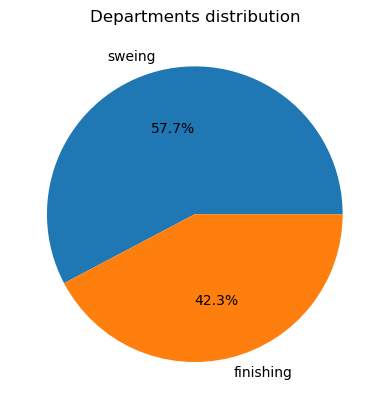

In [41]:
departments_count = list(X['department'].value_counts())
plt.pie(departments_count, labels=X['department'].unique(), autopct='%1.1f%%')
plt.title('Departments distribution')
plt.show()

# 'sweing'

In [42]:
X_sweing = X[X['department'] == 'sweing'].drop(columns=['department'])
print(X_sweing.shape)
X_sweing.describe()

(691, 14)


team  targeted_productivity         smv           wip  \
count  691.000000             691.000000  691.000000    691.000000   
mean     6.520984               0.723980   23.245412   1190.465991   
std      3.458333               0.102006    6.976497   1837.455001   
min      1.000000               0.070000   10.050000      7.000000   
25%      4.000000               0.700000   18.790000    774.500000   
50%      6.000000               0.750000   22.520000   1039.000000   
75%     10.000000               0.800000   28.080000   1252.500000   
max     12.000000               0.800000   54.560000  23122.000000   

          over_time   incentive   idle_time    idle_men  no_of_style_change  \
count    691.000000  691.000000  691.000000  691.000000          691.000000   
mean    6508.205499   44.483357    1.264834    0.639653            0.260492   
std     2864.505604   27.596591   16.712923    4.283652            0.537185   
min        0.000000    0.000000    0.000000    0.000000            0.000000   
25%     4560.000000   30.000000    0.000000    0.000000            0.000000   
50%     6840.000000   45.000000    0.000000    0.000000            0.000000   
75%     7200.000000   60.000000    0.000000    0.000000            0.000000   
max    25920.000000  138.000000  300.000000   45.000000            2.000000   

       no_of_workers  bigger_than_targeted  
count     691.000000            691.000000  
mean       52.445731              0.829233  
std         9.417353              0.376578  
min        26.000000              0.000000  
25%        52.000000              1.000000  
50%        57.000000              1.000000  
75%        58.000000              1.000000  
max        89.000000              1.000000

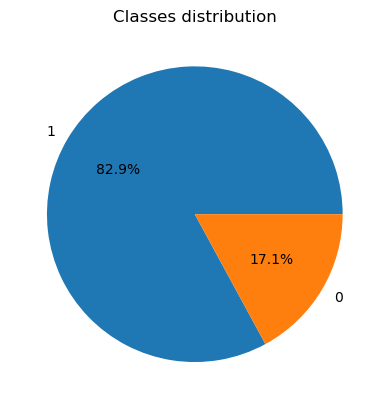

In [43]:
target_values_count = list(X_sweing['bigger_than_targeted'].value_counts())
plt.pie(target_values_count, labels=X_sweing['bigger_than_targeted'].unique(), autopct='%1.1f%%')
plt.title('Classes distribution')
plt.show()

<p><b><u>Note:</u> Very disbalanced department</b></p>

<Figure size 2000x2000 with 0 Axes>

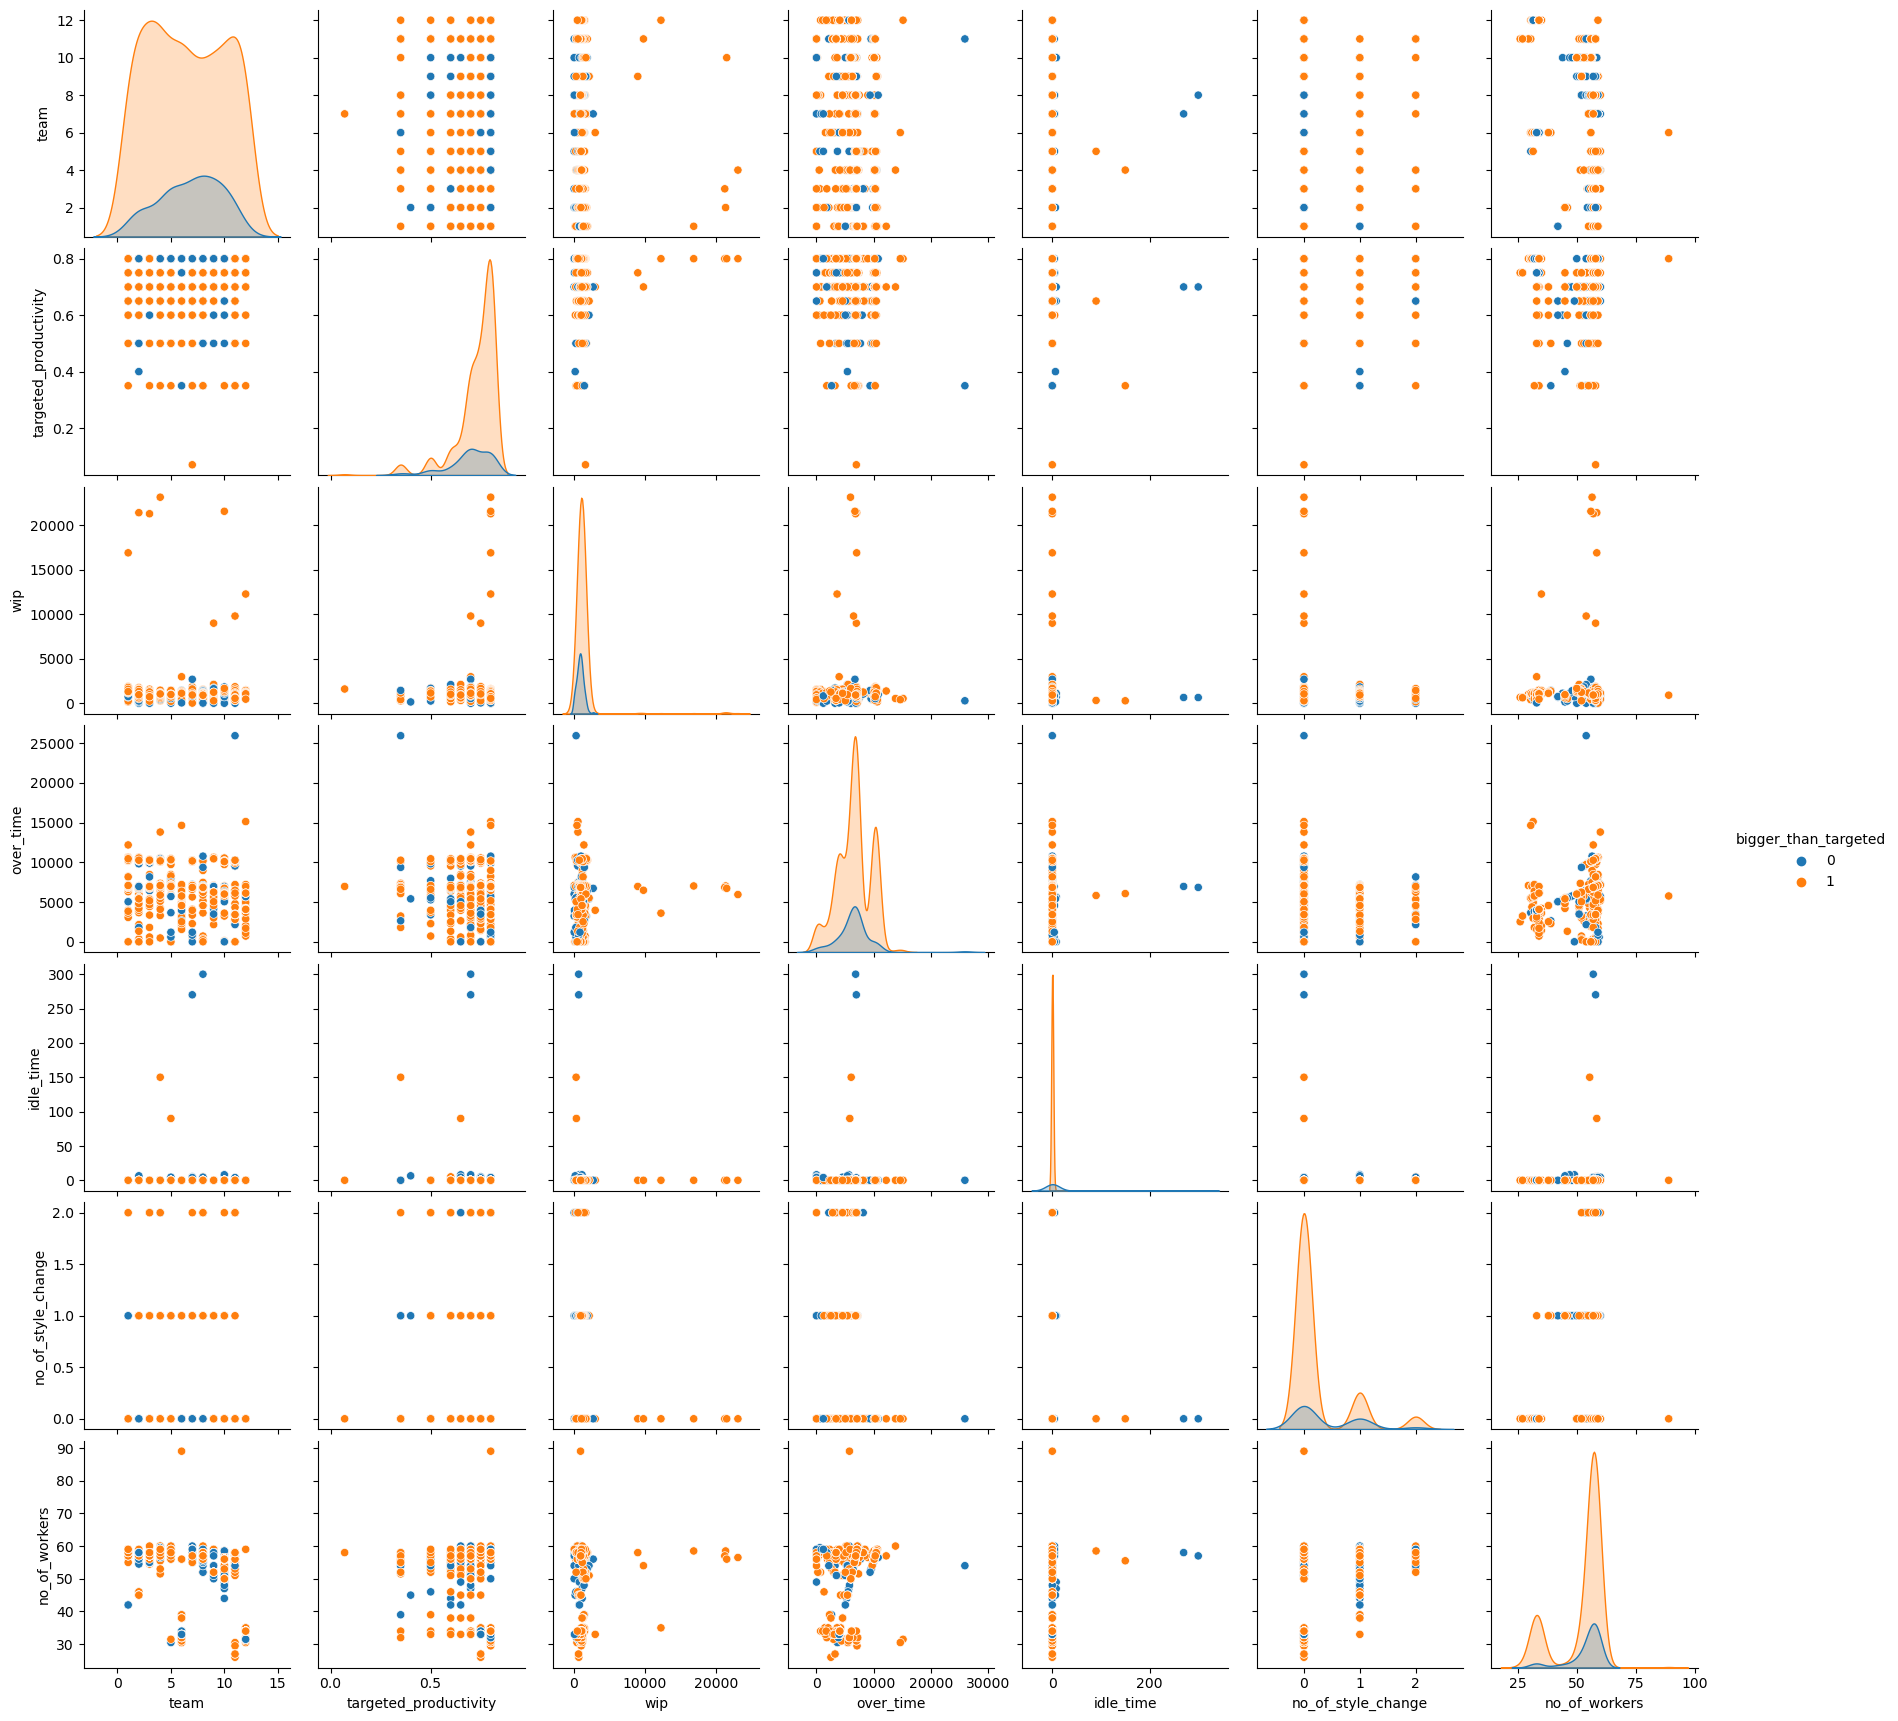

In [44]:
plt.figure(figsize=(20, 20))
sns.pairplot(data=X_sweing.drop(columns=['smv', 'idle_men', 'incentive']), hue='bigger_than_targeted')
plt.show()

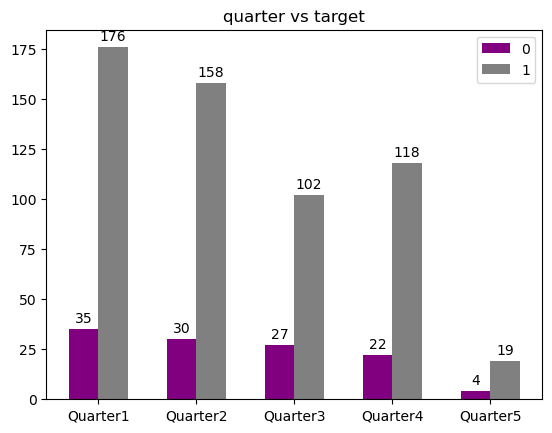

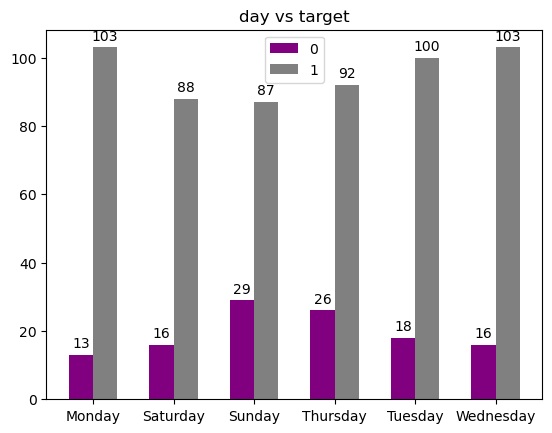

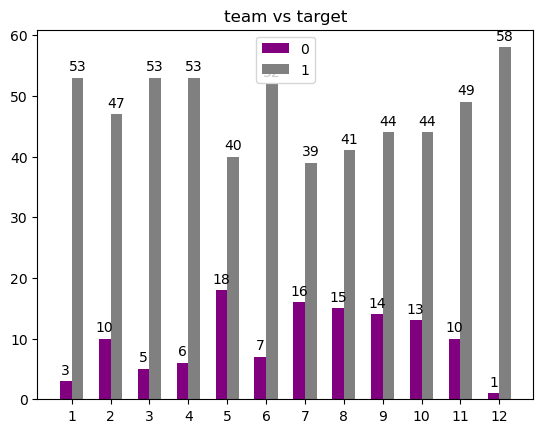

In [45]:
for cat_col in [col for col in categorical_features if col != 'department']:
    ind = np.arange(1, X[cat_col].nunique() + 1)
    width = 0.3

    fig, ax = plt.subplots()
    class_zero = ax.bar(ind, X_sweing[X_sweing['bigger_than_targeted'] == 0].groupby(cat_col)['date'].count().values, width, color='purple')
    class_one = ax.bar(ind + width, X_sweing[X_sweing['bigger_than_targeted'] == 1].groupby(cat_col)['date'].count().values, width, color='gray')
    plt.xticks(ind + width / 2, np.sort(X[cat_col].unique()))
    plt.legend(['0', '1'])
    plt.title(f'{cat_col} vs target')

    ax.bar_label(class_zero, padding=3)
    ax.bar_label(class_one, padding=3)

    plt.show()

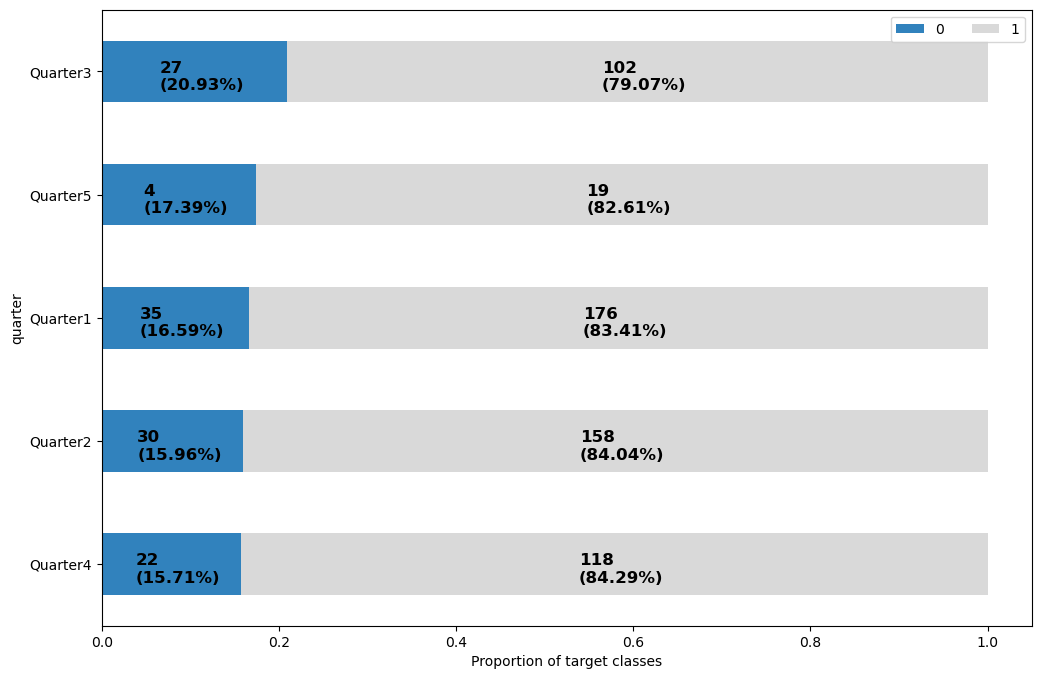

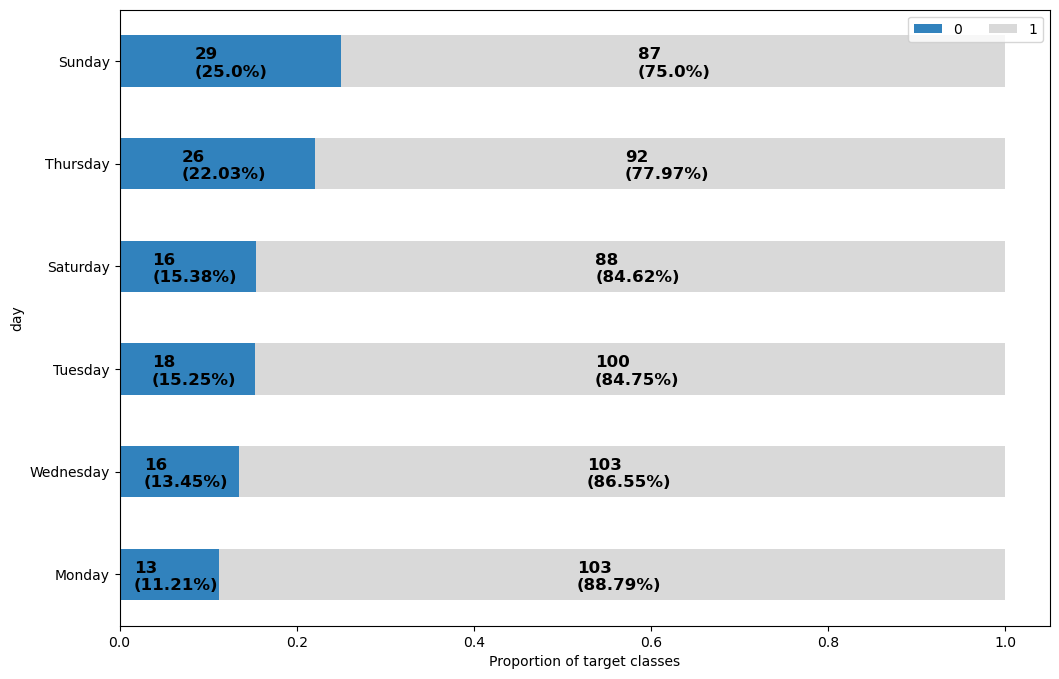

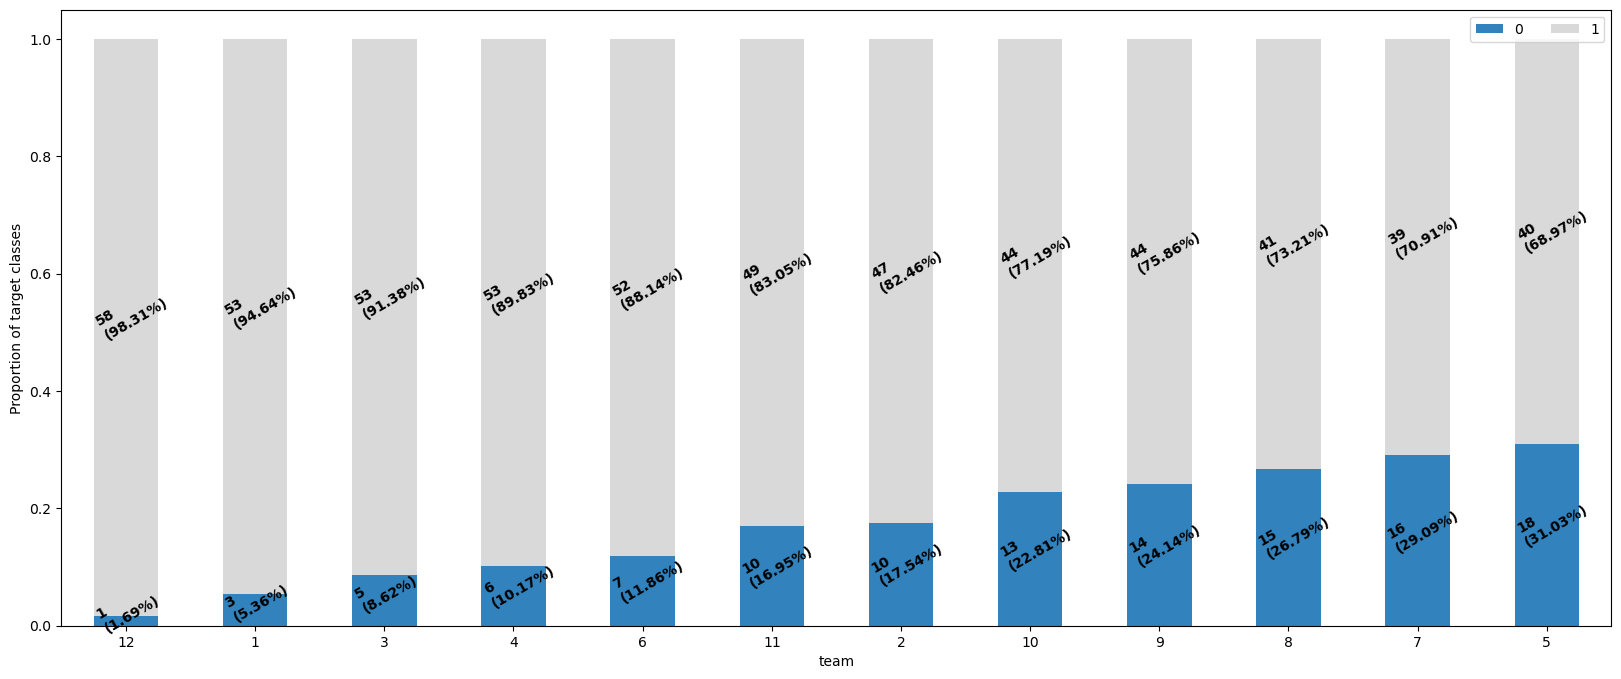

In [46]:
for cat_col in [col for col in categorical_features if col != 'department']:
    cross_tab = pd.crosstab(index=X_sweing[cat_col], columns=X_sweing['bigger_than_targeted'])
    cross_tab_prop = pd.crosstab(index=X_sweing[cat_col], columns=X_sweing['bigger_than_targeted'], normalize='index').sort_values(by=0)
    if cat_col == 'team':
        cross_tab_prop.plot(kind='bar', stacked=True, colormap='tab20c', figsize=(20, 8))
        plt.ylabel('Proportion of target classes')
        plt.xlabel(cat_col)
    else:
        cross_tab_prop.plot(kind='barh', stacked=True, colormap='tab20c', figsize=(12, 8))
        plt.xlabel('Proportion of target classes')
        
    plt.legend(loc='upper right', ncol=2)
    
    for n, x in enumerate([*cross_tab_prop.index.values]):
        for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x], cross_tab.loc[x], cross_tab_prop.loc[x].cumsum()):
            if cat_col == 'team':
                plt.text(x=n - 0.25, y=(y_loc - proportion - 0.02) + (proportion / 2), s=f'{count}\n({np.round(proportion * 100, 2)}%)', 
                         color='black', fontsize=10, fontweight='bold', rotation=30)
                plt.xticks(rotation=0)
            else:
                plt.text(x=(y_loc - proportion - 0.04) + (proportion / 2), y=n - 0.15, s=f'{count}\n({np.round(proportion * 100, 2)}%)', 
                         color='black', fontsize=12, fontweight='bold')
    plt.show()

<p><b><u>Notes:</u></b></p>
<p><b>1) Target correlates positively with 'incentive', 'team' (categorical) and negatively with 'smv', 'idle_men'.</b></p>
<p><b>2) 'Thursday' and 'Sunday' are the worst days.</b></p>
<p><b>3) Best teams: 12, 1, 3, 4, 6.</b></p>
<p><b></b></p>
<p><b></b></p>

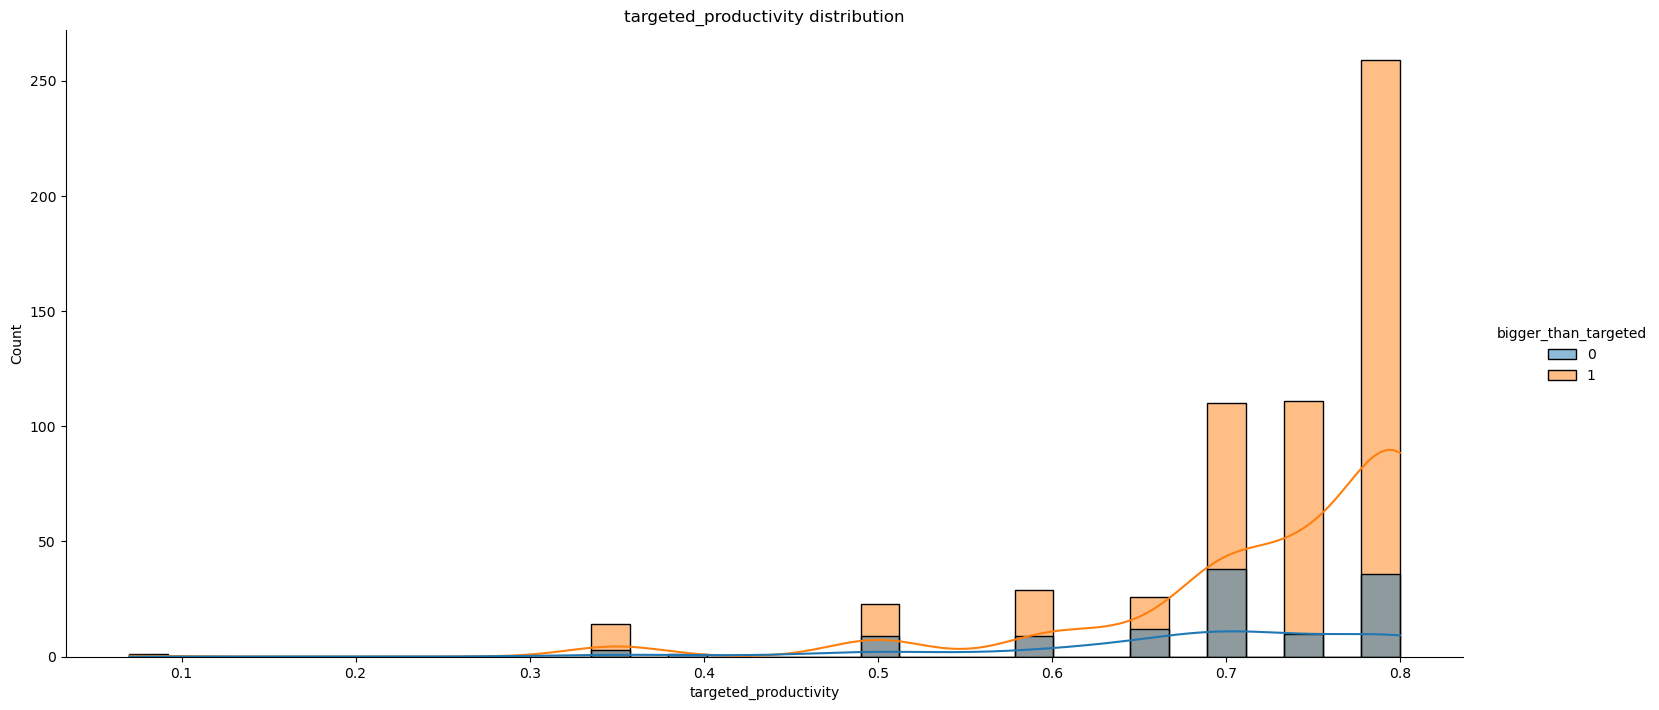

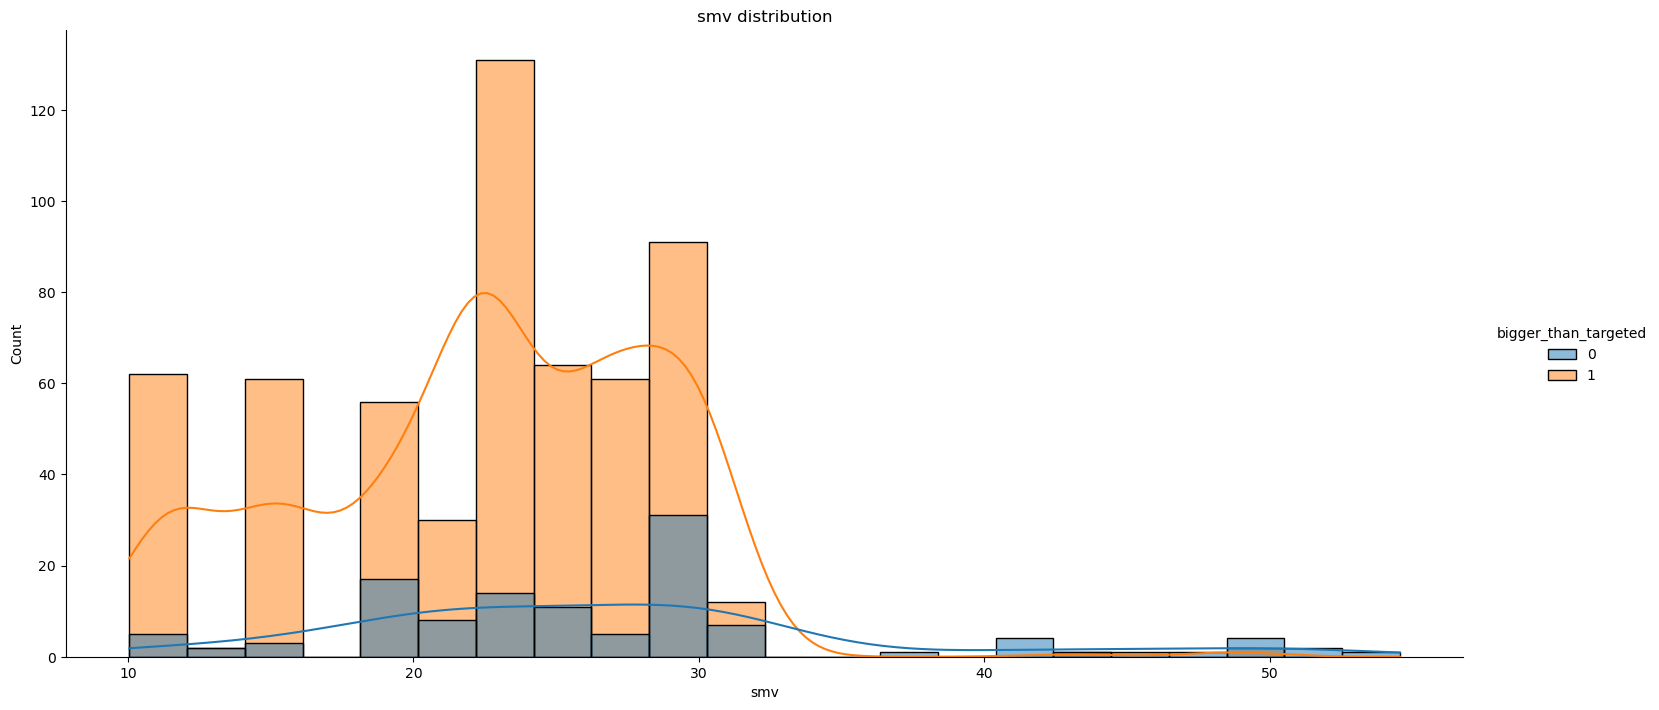

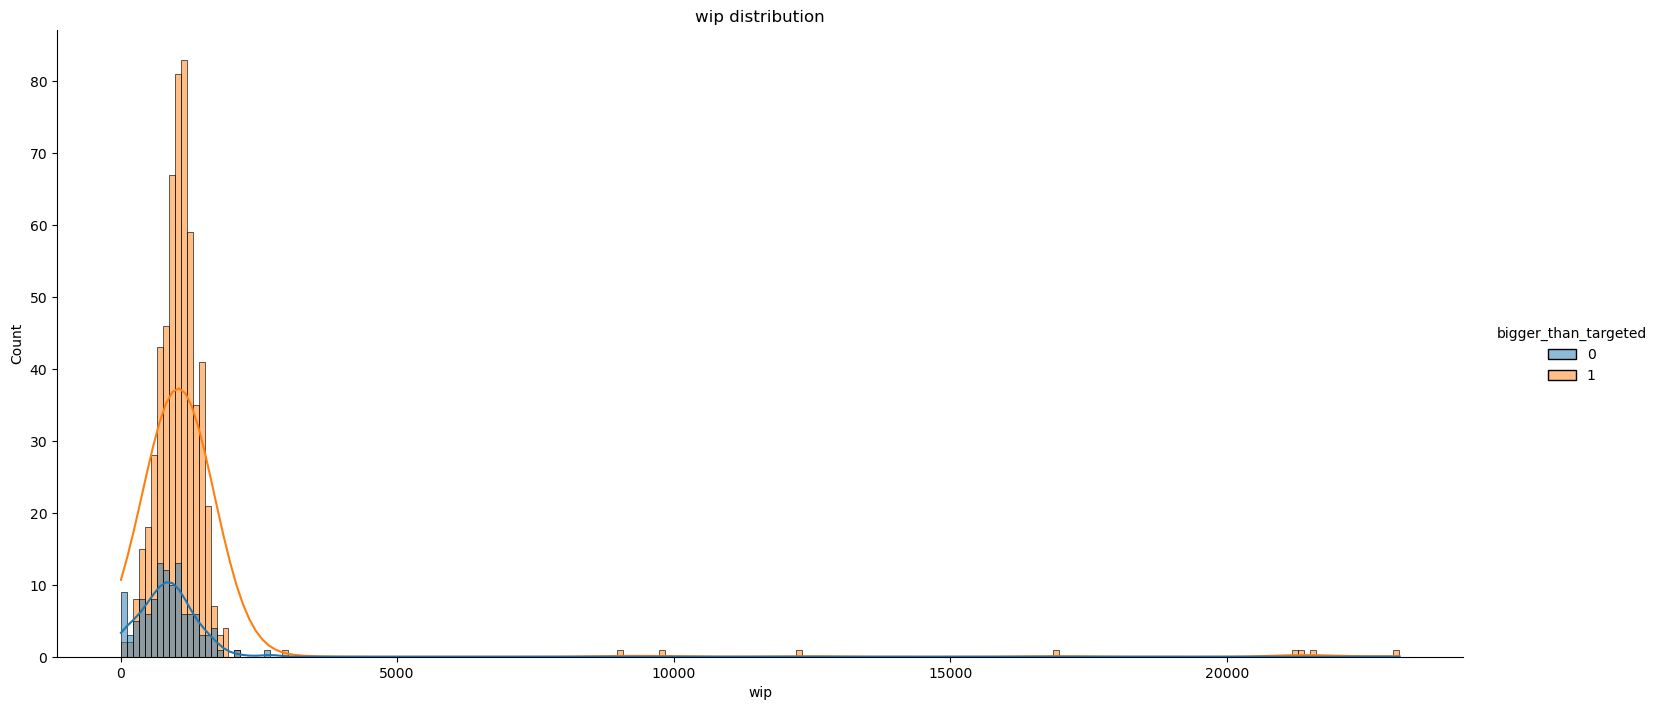

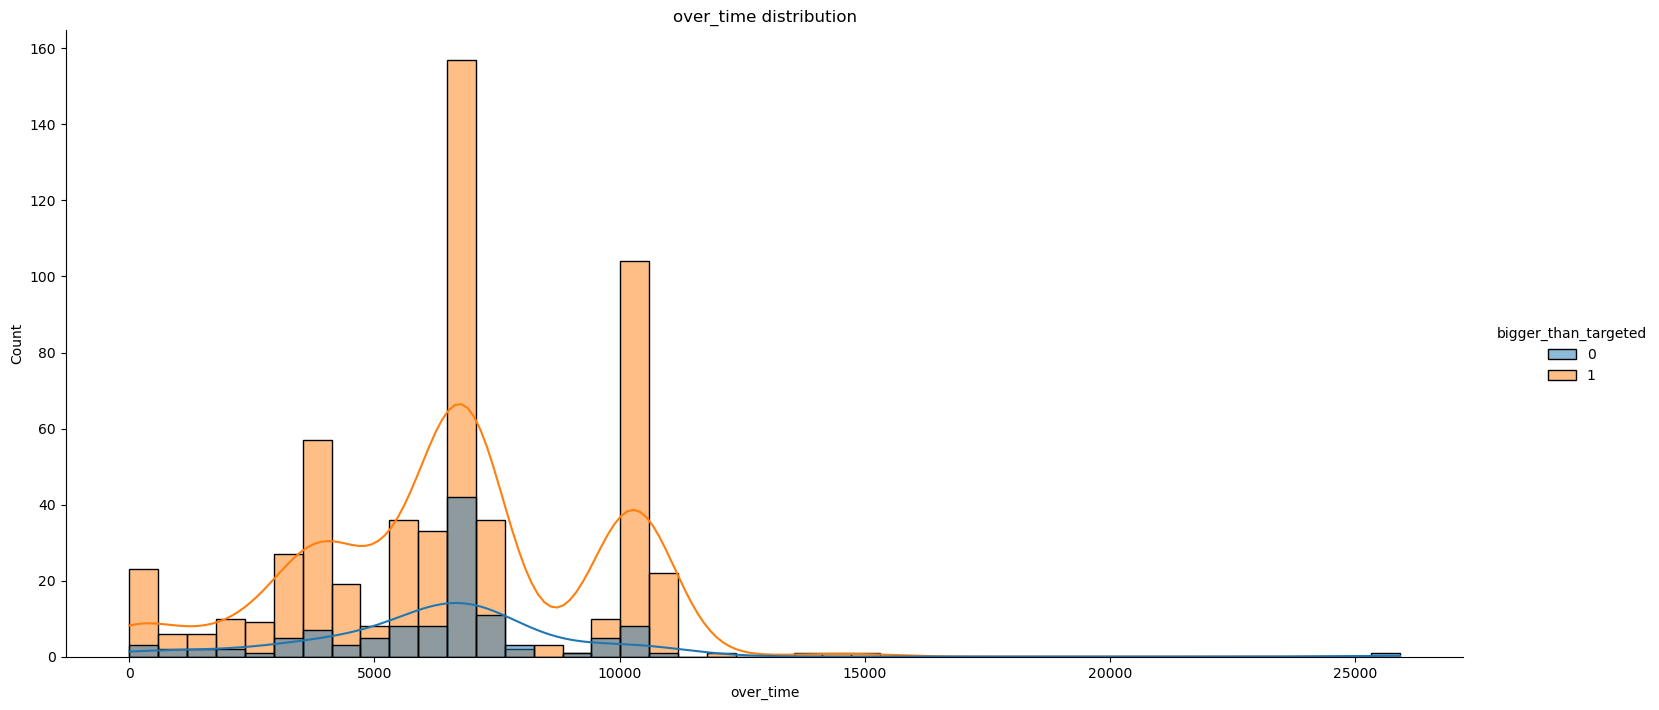

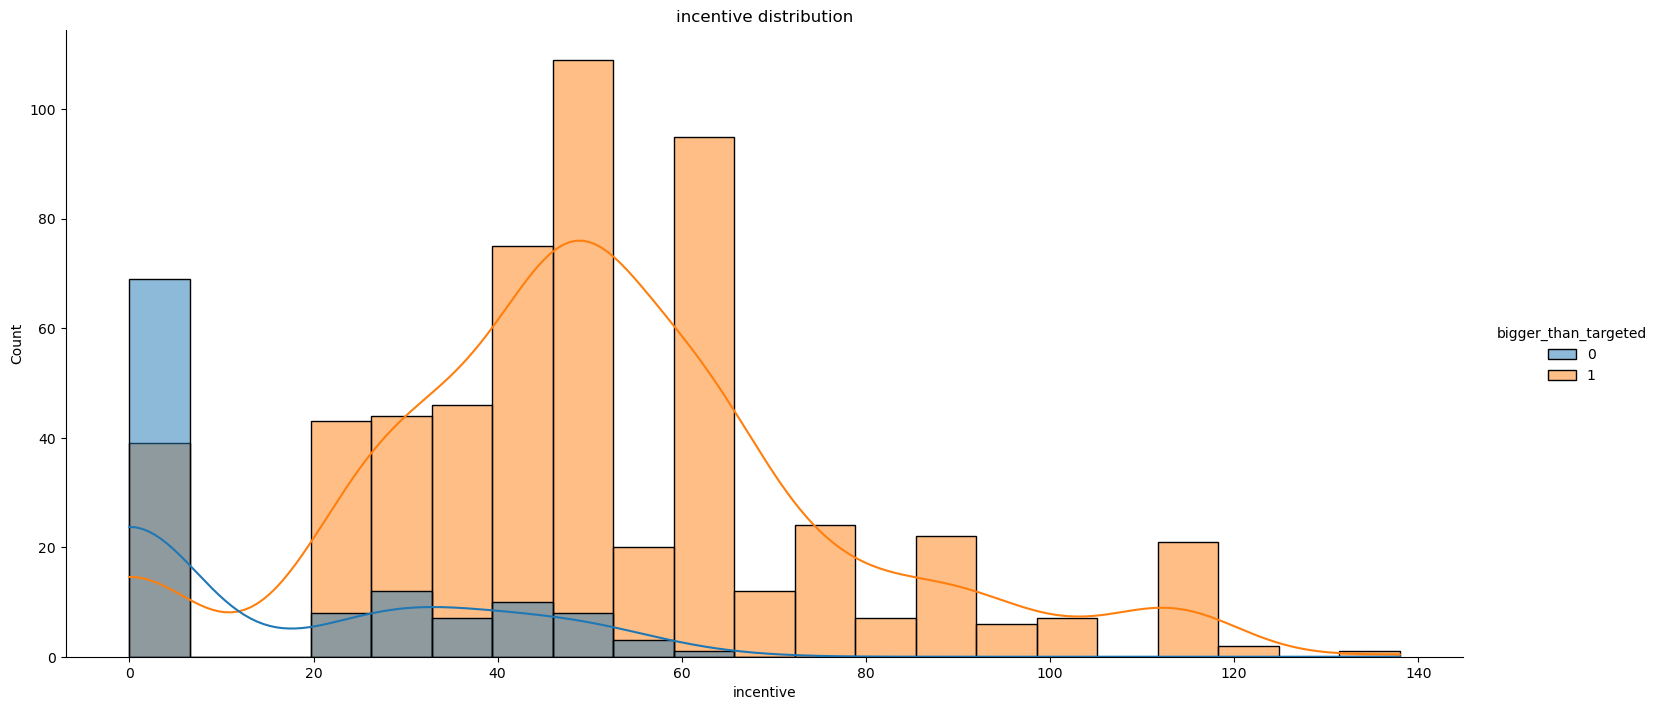

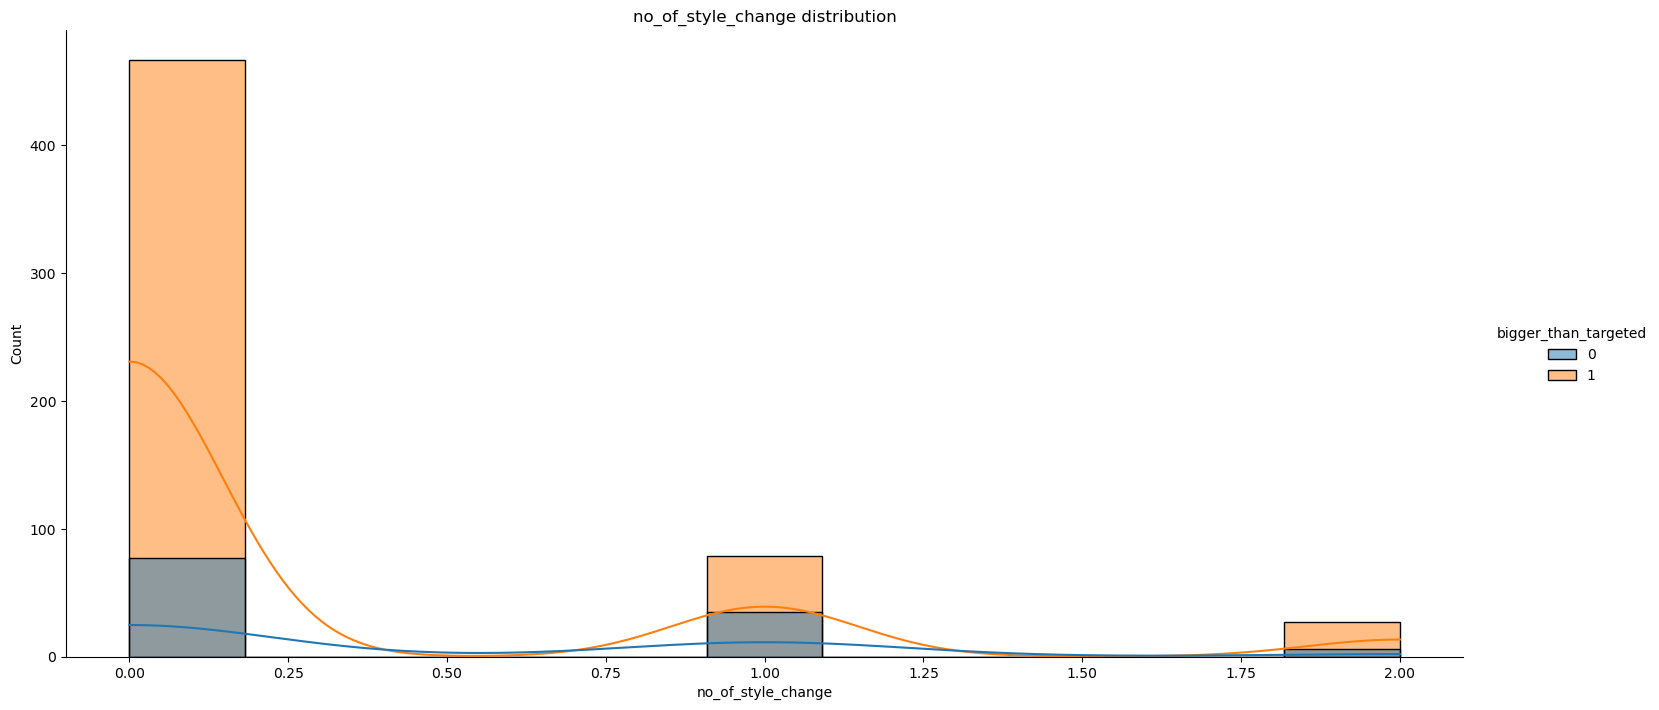

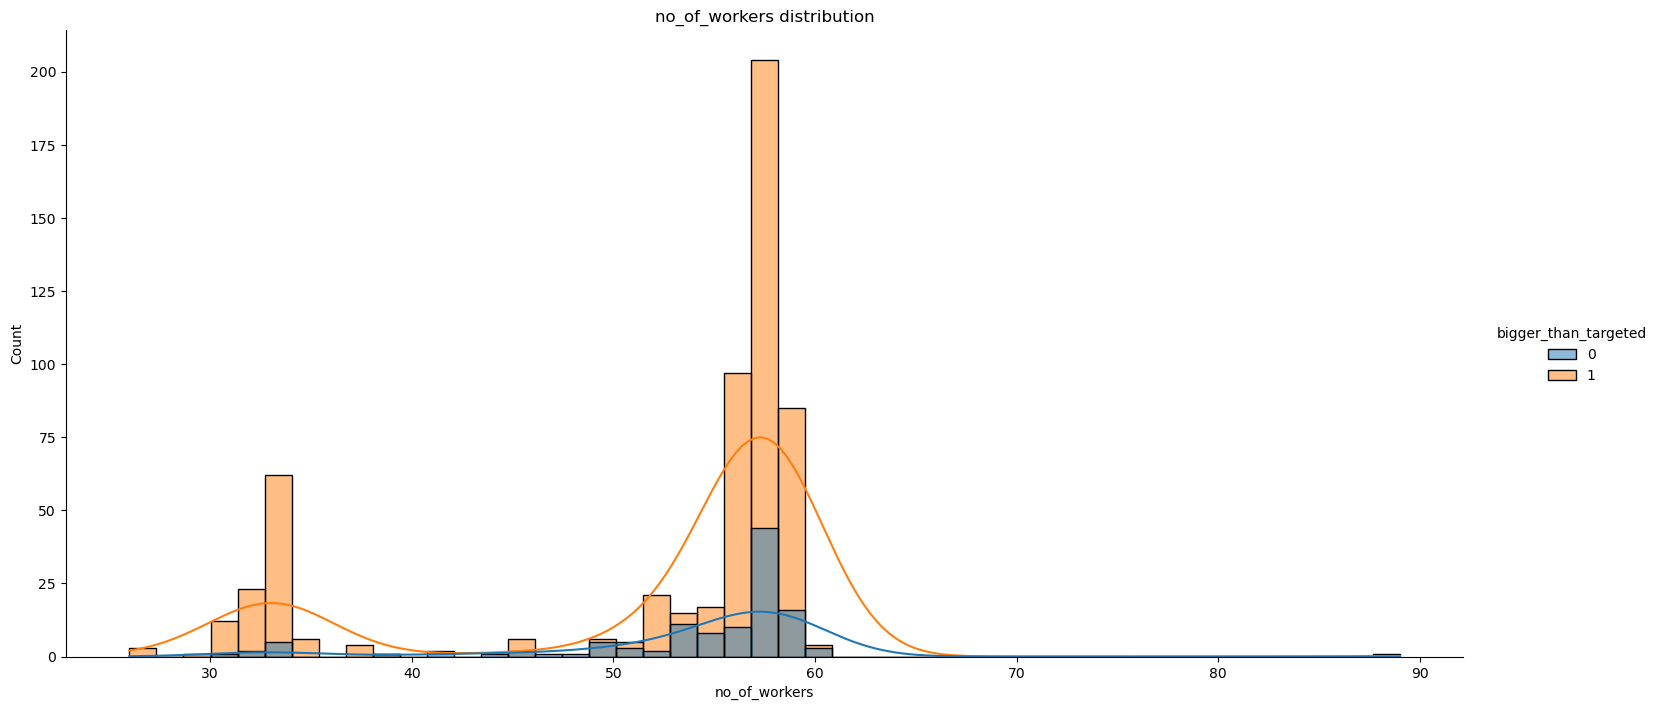

In [47]:
for i, num_col in enumerate([col for col in numerical_features if col not in ['idle_time', 'idle_men']]):
    sns.displot(x=X_sweing[num_col], hue=X_sweing['bigger_than_targeted'], alpha=0.5, kde=True, height=7.0, aspect=15.0/7.0)
    plt.title(f'{num_col} distribution')
    plt.show()

<p><b>4) As we can see above, distributions of numerical features, which don't correlate well with the target, almost don't differ from one target class to another.</b></p>
<p><b>5) 'smv' outliers mostly refer to zero class, 'wip' outliers to first class.</b></p>
<p><b>6) 100% of samples where 'incentive' > 63 (108 samples, 15.6% of all samples) have first target class.</b></p>

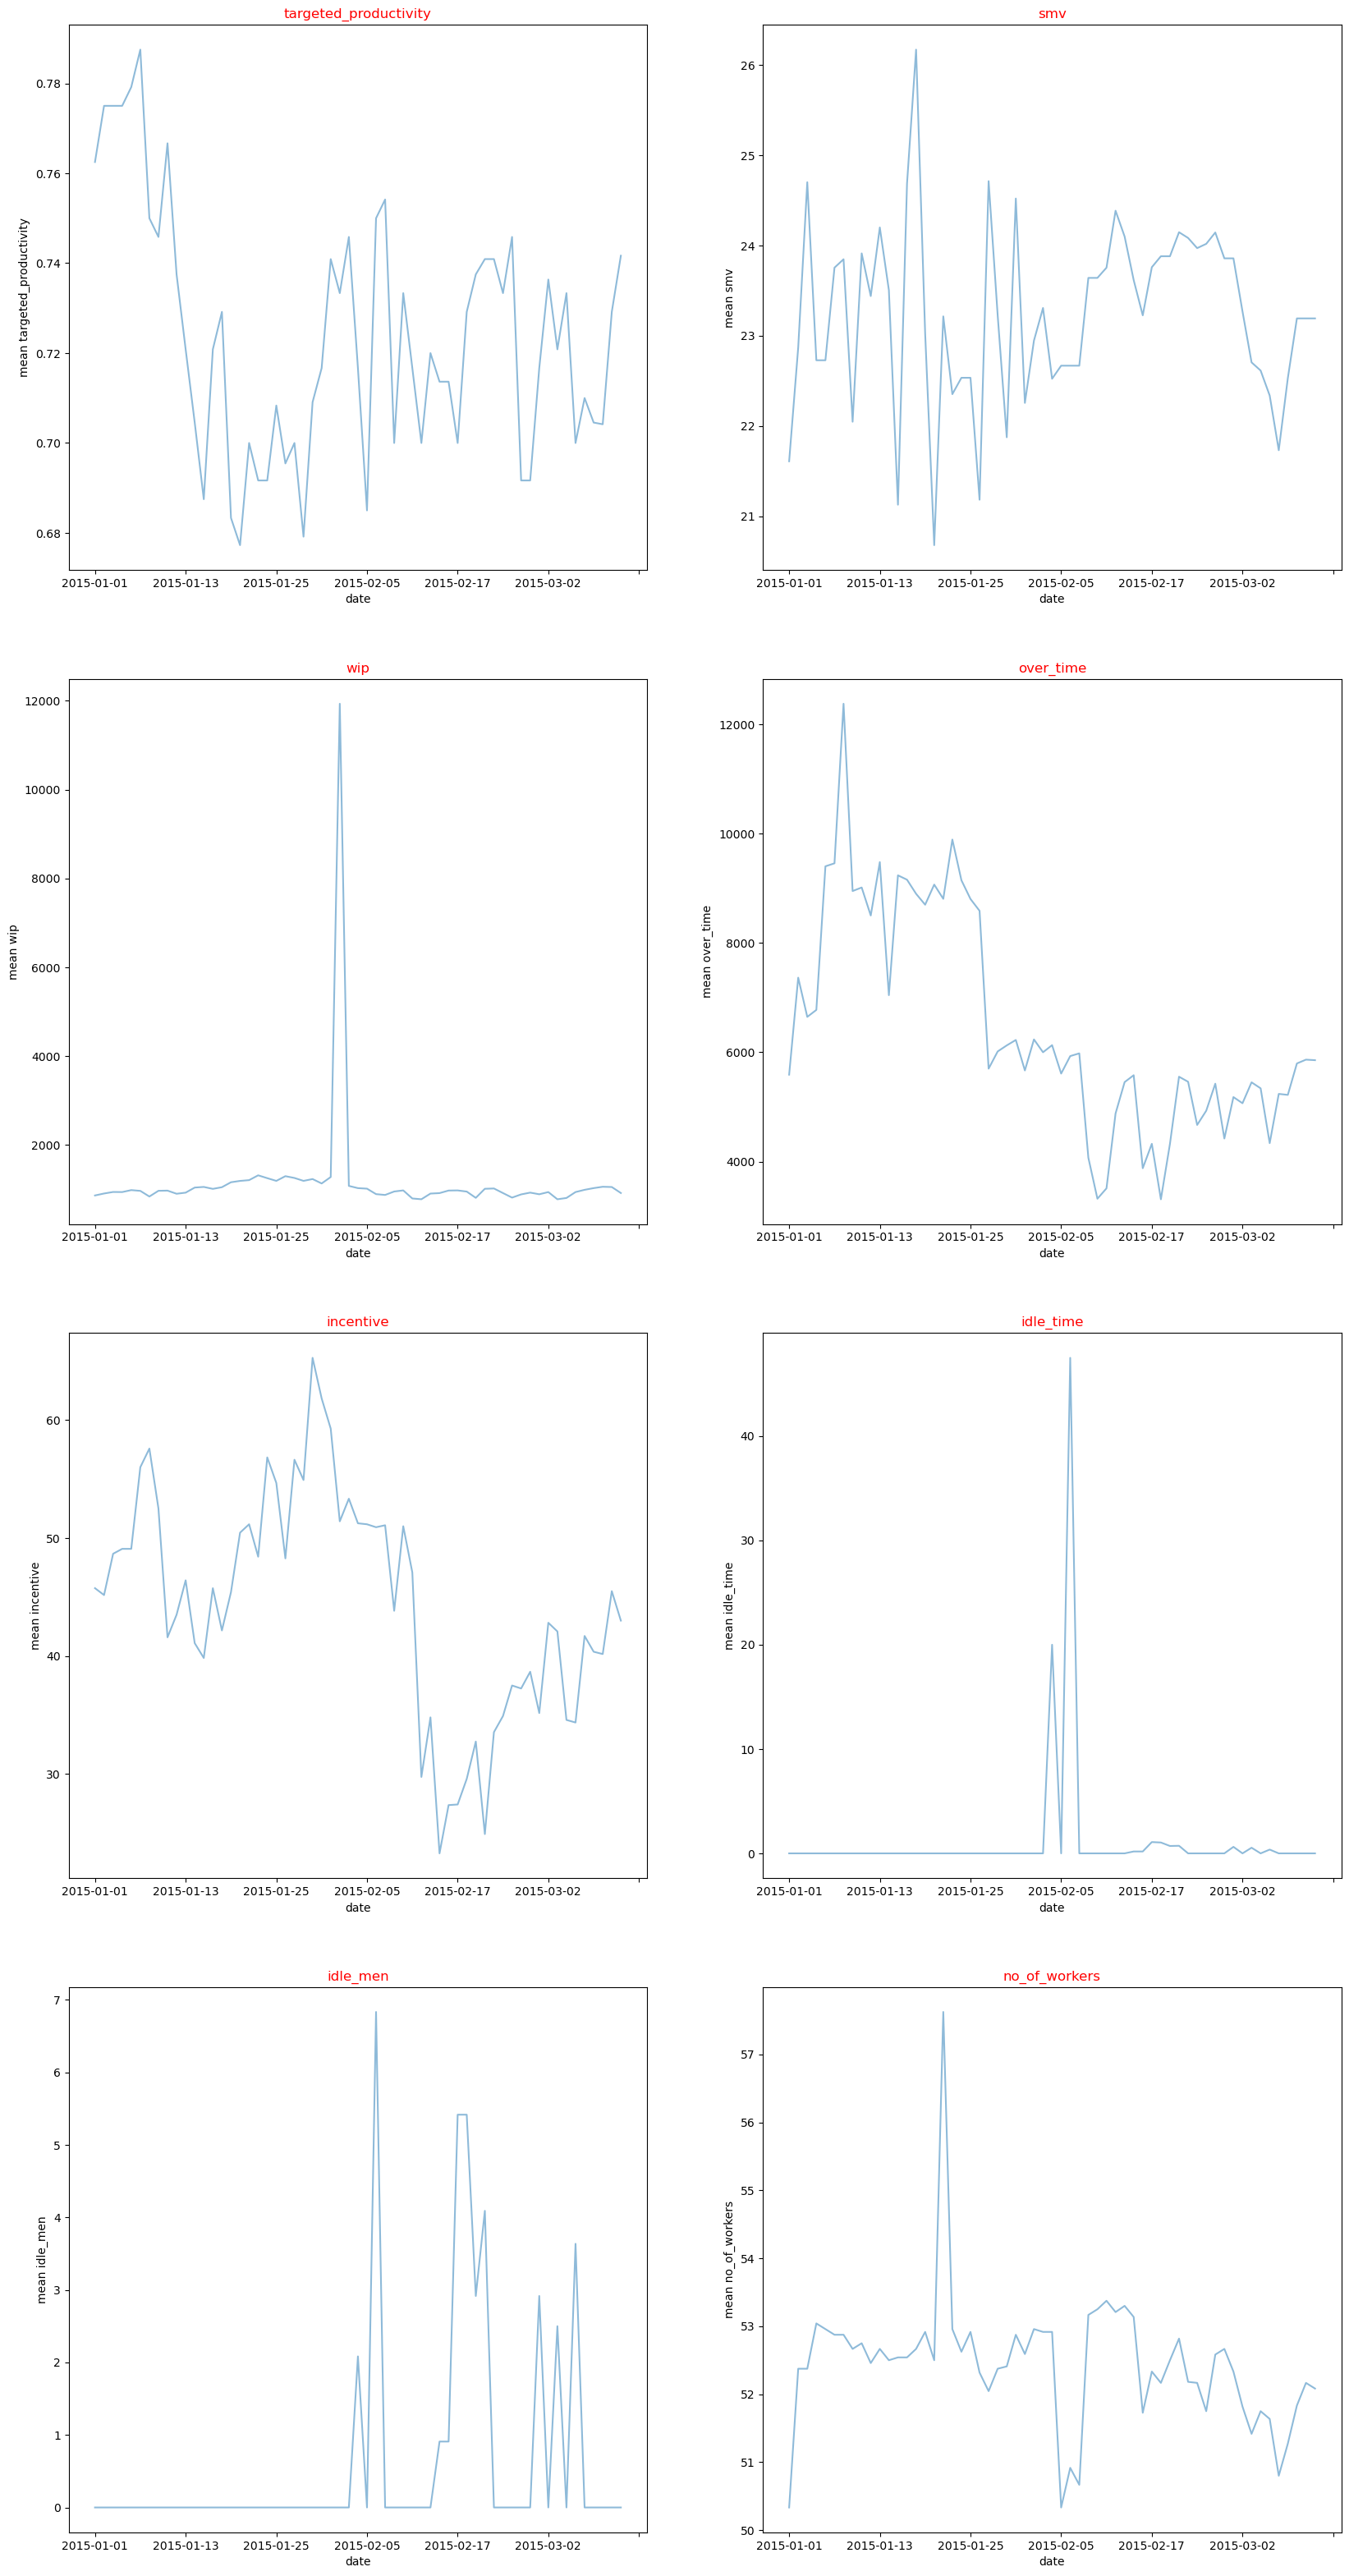

In [48]:
plt.figure(figsize=(20, 50))
for i, num_col in enumerate([col for col in numerical_features if col not in ['no_of_style_change']]):
    plt.subplot(5, 2, i + 1)
    average_sales = X_sweing.groupby('date')[num_col].mean()
    plt.ylabel(f'mean {num_col}')
    ax = average_sales.plot(alpha=0.5)
    plt.title(num_col, color='red')

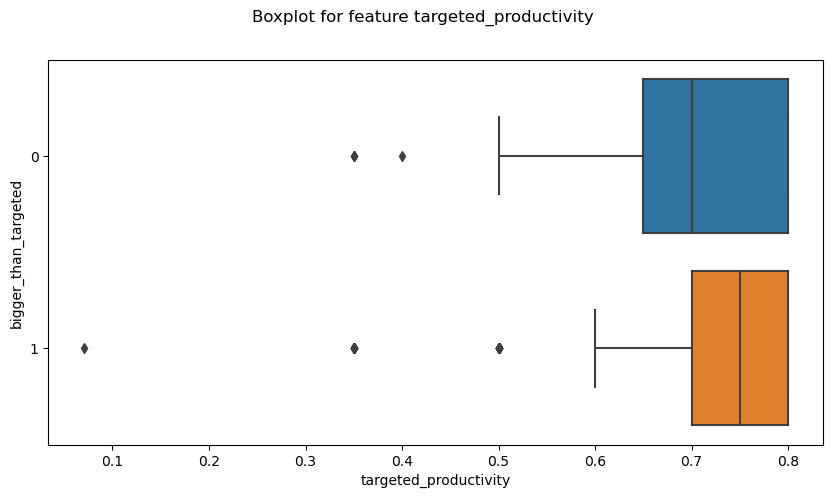

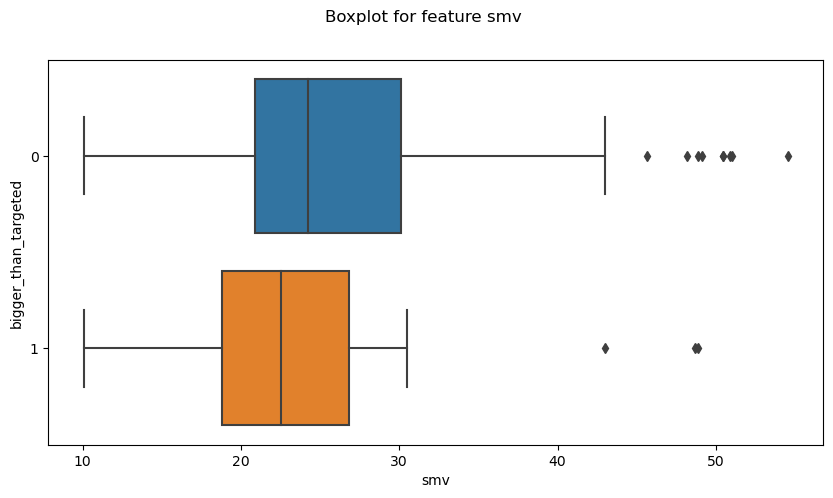

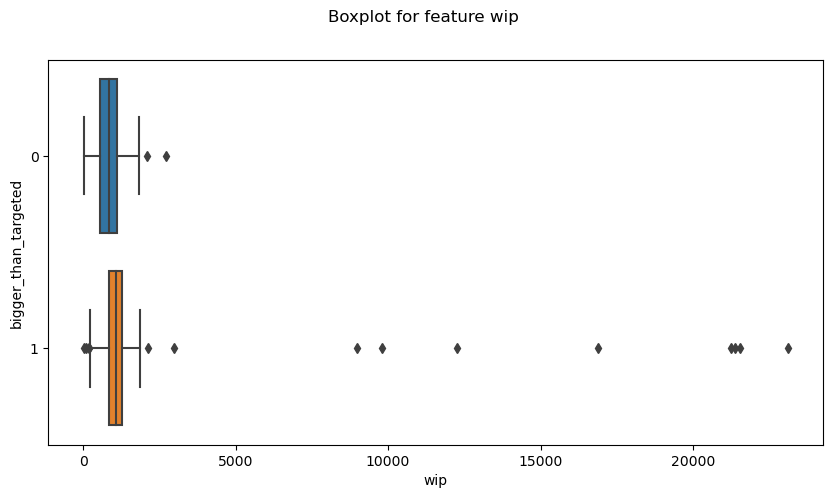

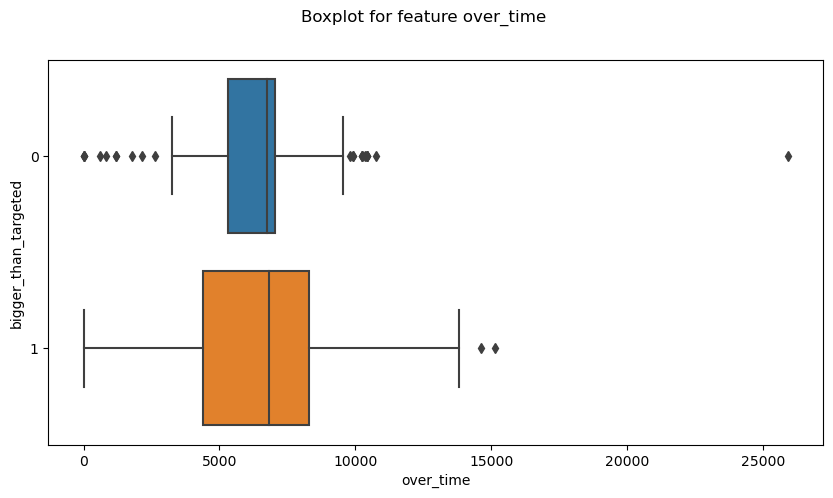

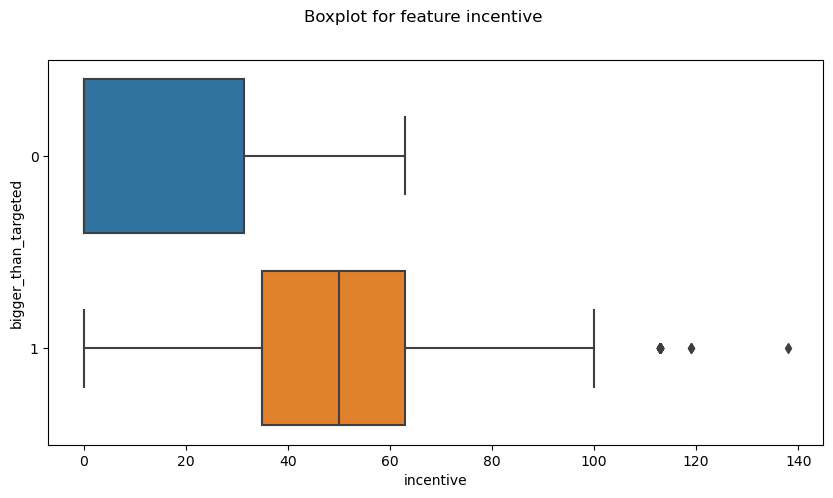

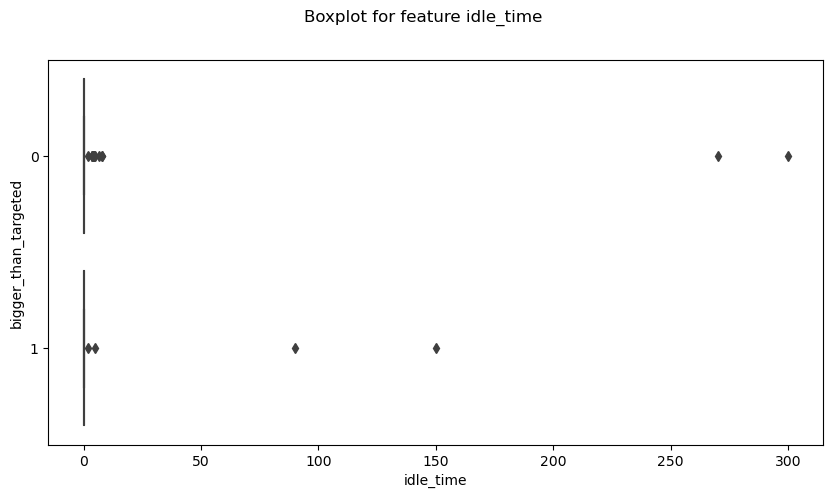

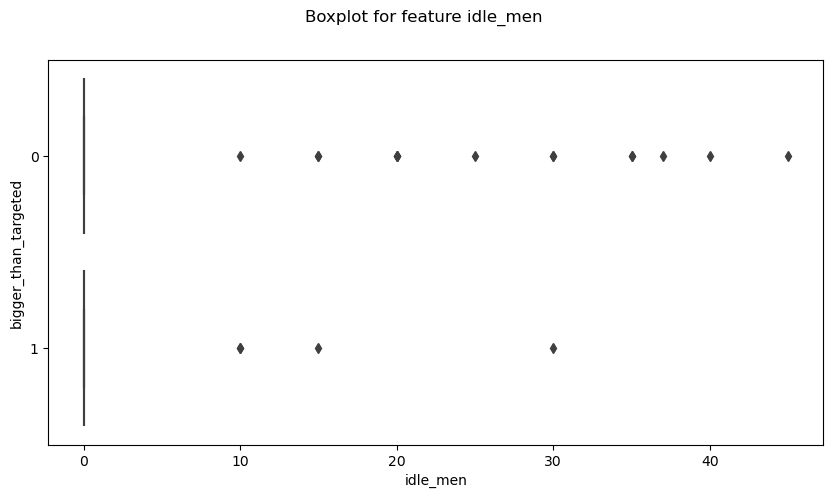

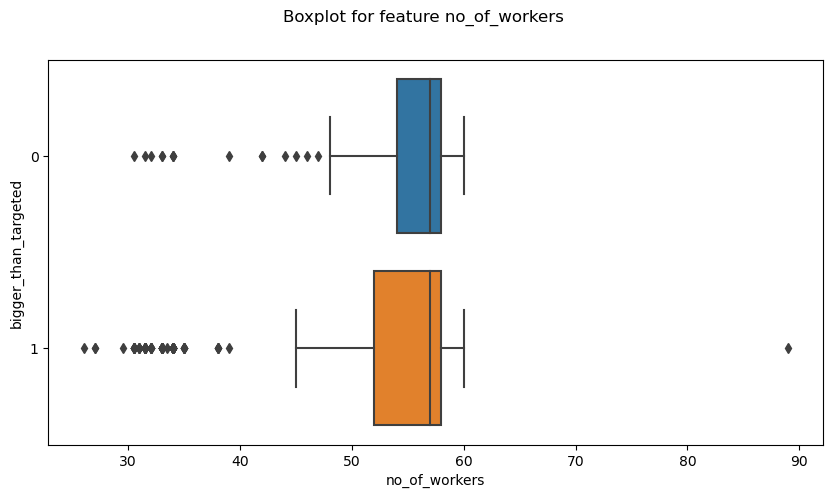

In [49]:
for i, num_col in enumerate([col for col in numerical_features if col not in ['no_of_style_change']]):
    fig, axes = plt.subplots(1, 1, figsize=(10, 5), sharey=True)
    fig.suptitle(f'Boxplot for feature {num_col}')
    sns.boxplot(data=X_sweing, x=num_col, y='bigger_than_targeted', orient="h")
    plt.show()

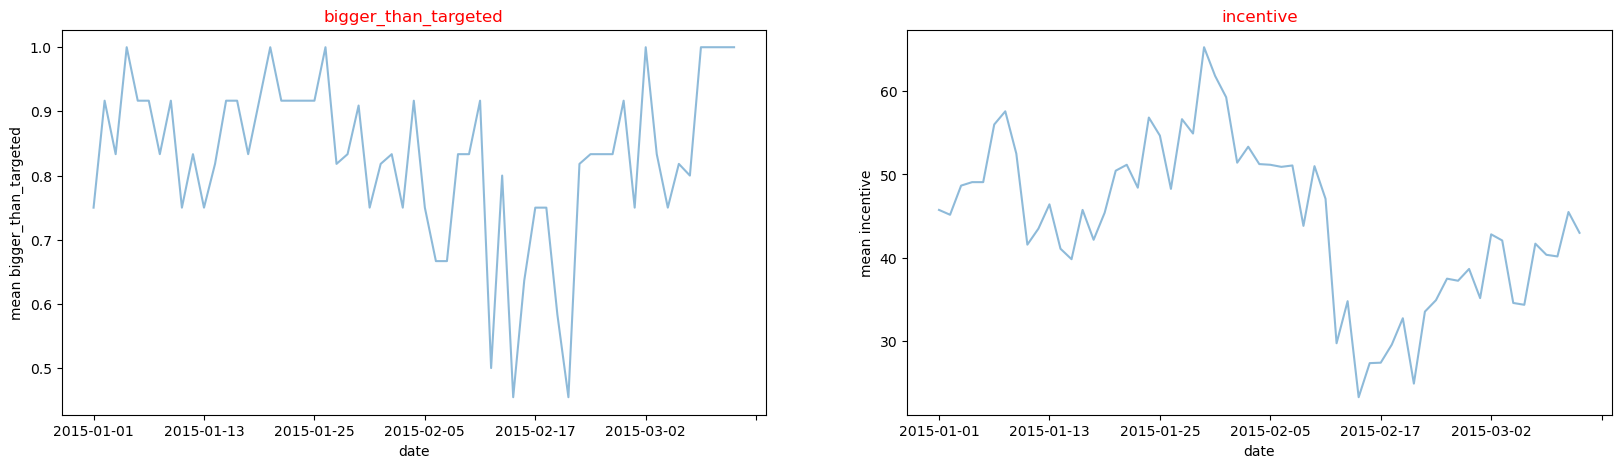

In [50]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(['bigger_than_targeted', 'incentive']):
    plt.subplot(1, 2, i + 1)
    average_sales = X_sweing.groupby('date')[col].mean()
    plt.ylabel(f'mean {col}')
    ax = average_sales.plot(alpha=0.5)
    plt.title(col, color='red')

<p><b>7) Illustration of how 'incentive' influences on the target. On days when the average 'incentive' is significantly reduced, the average performance also decreases. But too large values don't affect the target. Its values remain at the same level in this cases.</b></p>
<p><b>8) Note #7 also explains the nature of the outliers in the target (extremely low values).</b></p>

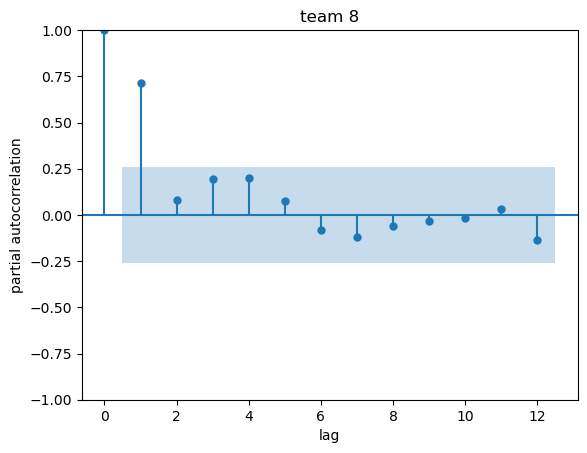

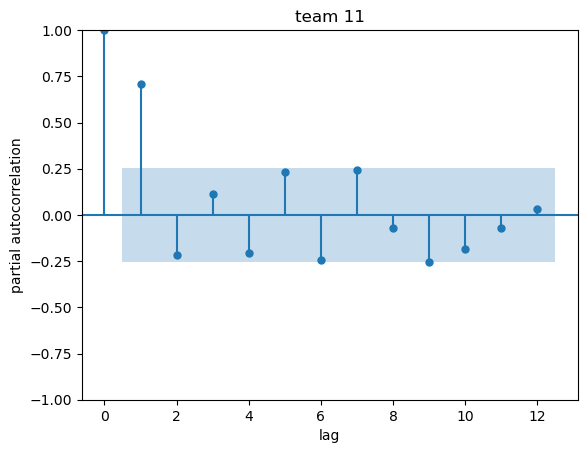

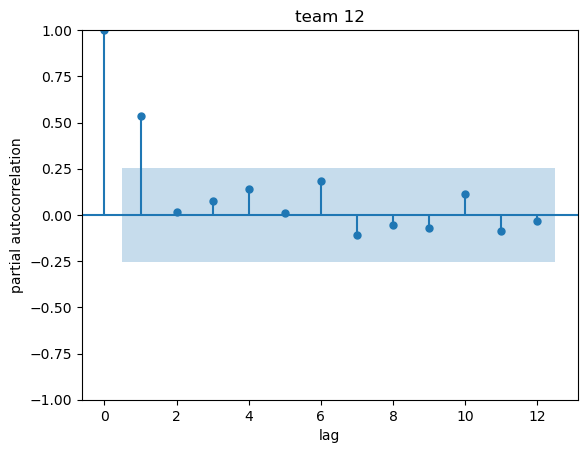

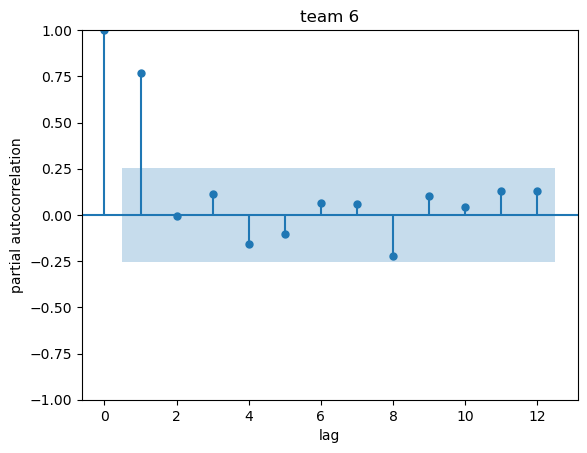

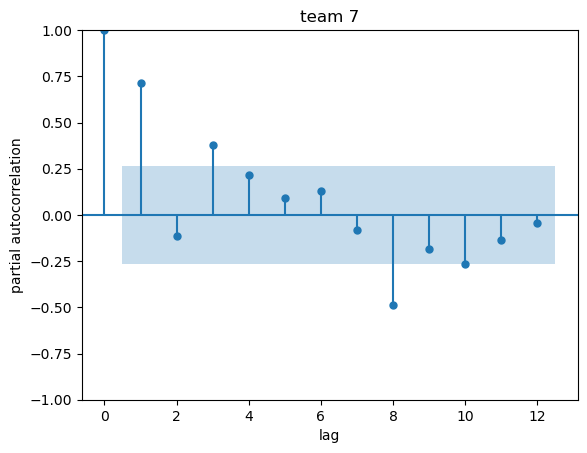

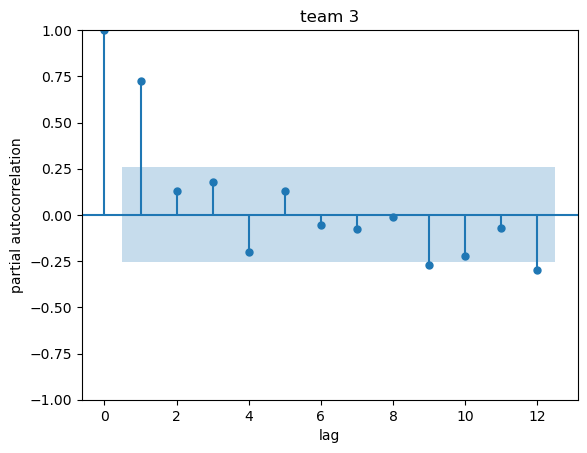

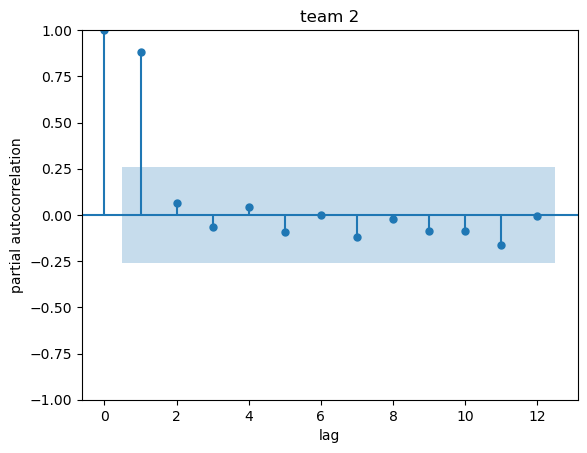

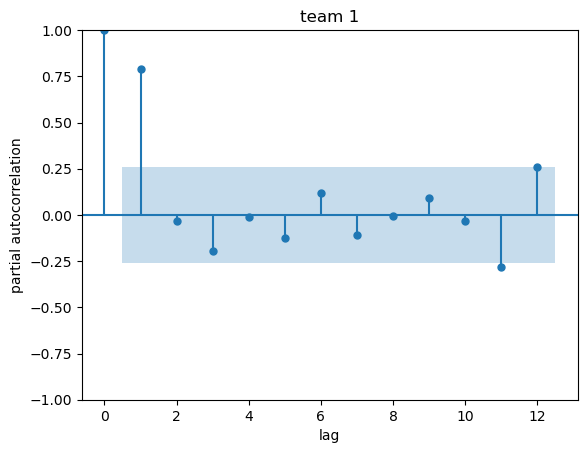

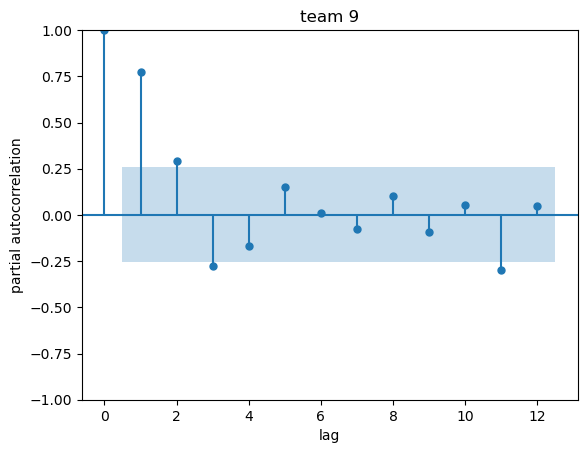

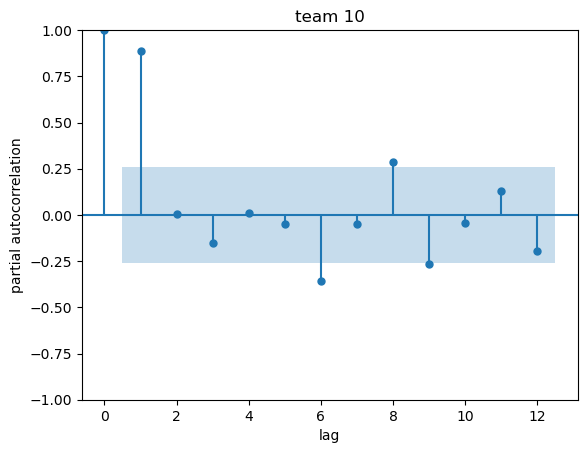

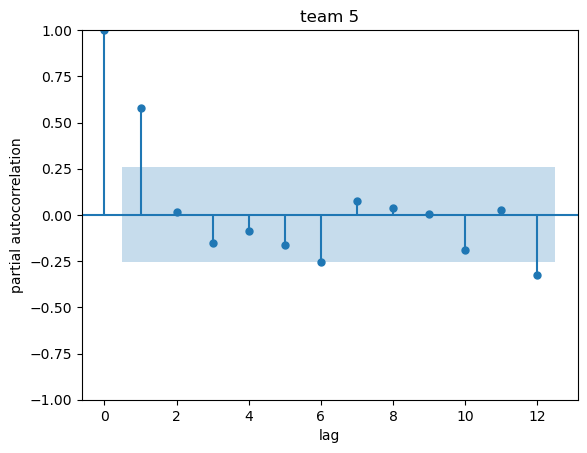

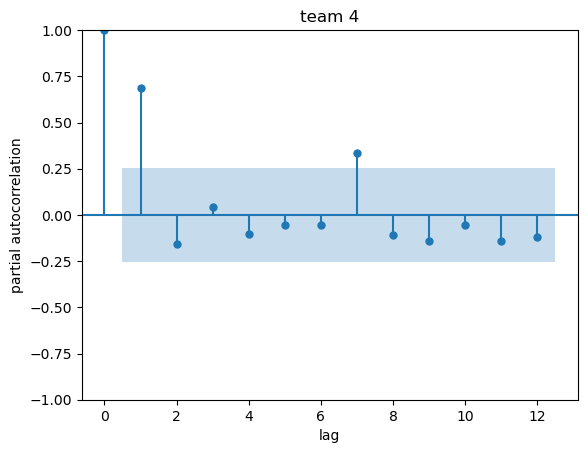

In [51]:
### explore lags of the target with the help of correlogram
### granularity: department-team

import statsmodels.api as sm

X_sweing_copy = X_sweing.groupby(['team', 'date'])['incentive'].mean()
for current_team in X_sweing['team'].unique():    
    current_team_values = X_sweing_copy.loc[current_team].reset_index()['incentive']
    sm.graphics.tsa.plot_pacf(current_team_values, lags=12)
    plt.title(f'team {current_team}')
    plt.xlabel('lag')
    plt.ylabel('partial autocorrelation')
    plt.show()

# EDA for 'finishing' department

In [52]:
X_finishing = X[X['department'] == 'finishing'].drop(columns=['department', 'wip', 'idle_time', 'idle_men', 'no_of_style_change', 'incentive'])
print(X_finishing.shape)
X_finishing.describe()

(506, 9)


team  targeted_productivity         smv     over_time  \
count  506.000000             506.000000  506.000000    506.000000   
mean     6.298419               0.737352    3.887036   1917.154150   
std      3.470937               0.091512    0.594110   1776.698408   
min      1.000000               0.350000    2.900000      0.000000   
25%      3.000000               0.700000    3.900000    960.000000   
50%      6.000000               0.750000    3.940000   1440.000000   
75%      9.000000               0.800000    4.150000   1920.000000   
max     12.000000               0.800000    5.130000  15000.000000   

       no_of_workers  bigger_than_targeted  
count     506.000000            506.000000  
mean       10.252964              0.596838  
std         4.007819              0.491018  
min         2.000000              0.000000  
25%         8.000000              0.000000  
50%         8.000000              1.000000  
75%        11.750000              1.000000  
max        28.000000              1.000000

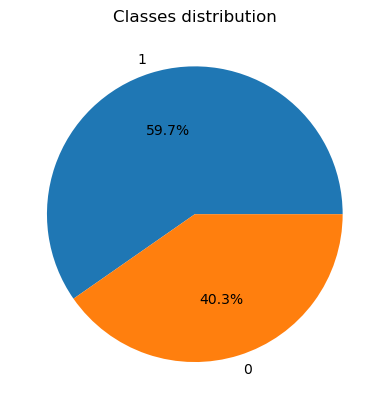

In [53]:
target_values_count = list(X_finishing['bigger_than_targeted'].value_counts())
plt.pie(target_values_count, labels=X_finishing['bigger_than_targeted'].unique(), autopct='%1.1f%%')
plt.title('Classes distribution')
plt.show()

<Figure size 2000x2000 with 0 Axes>

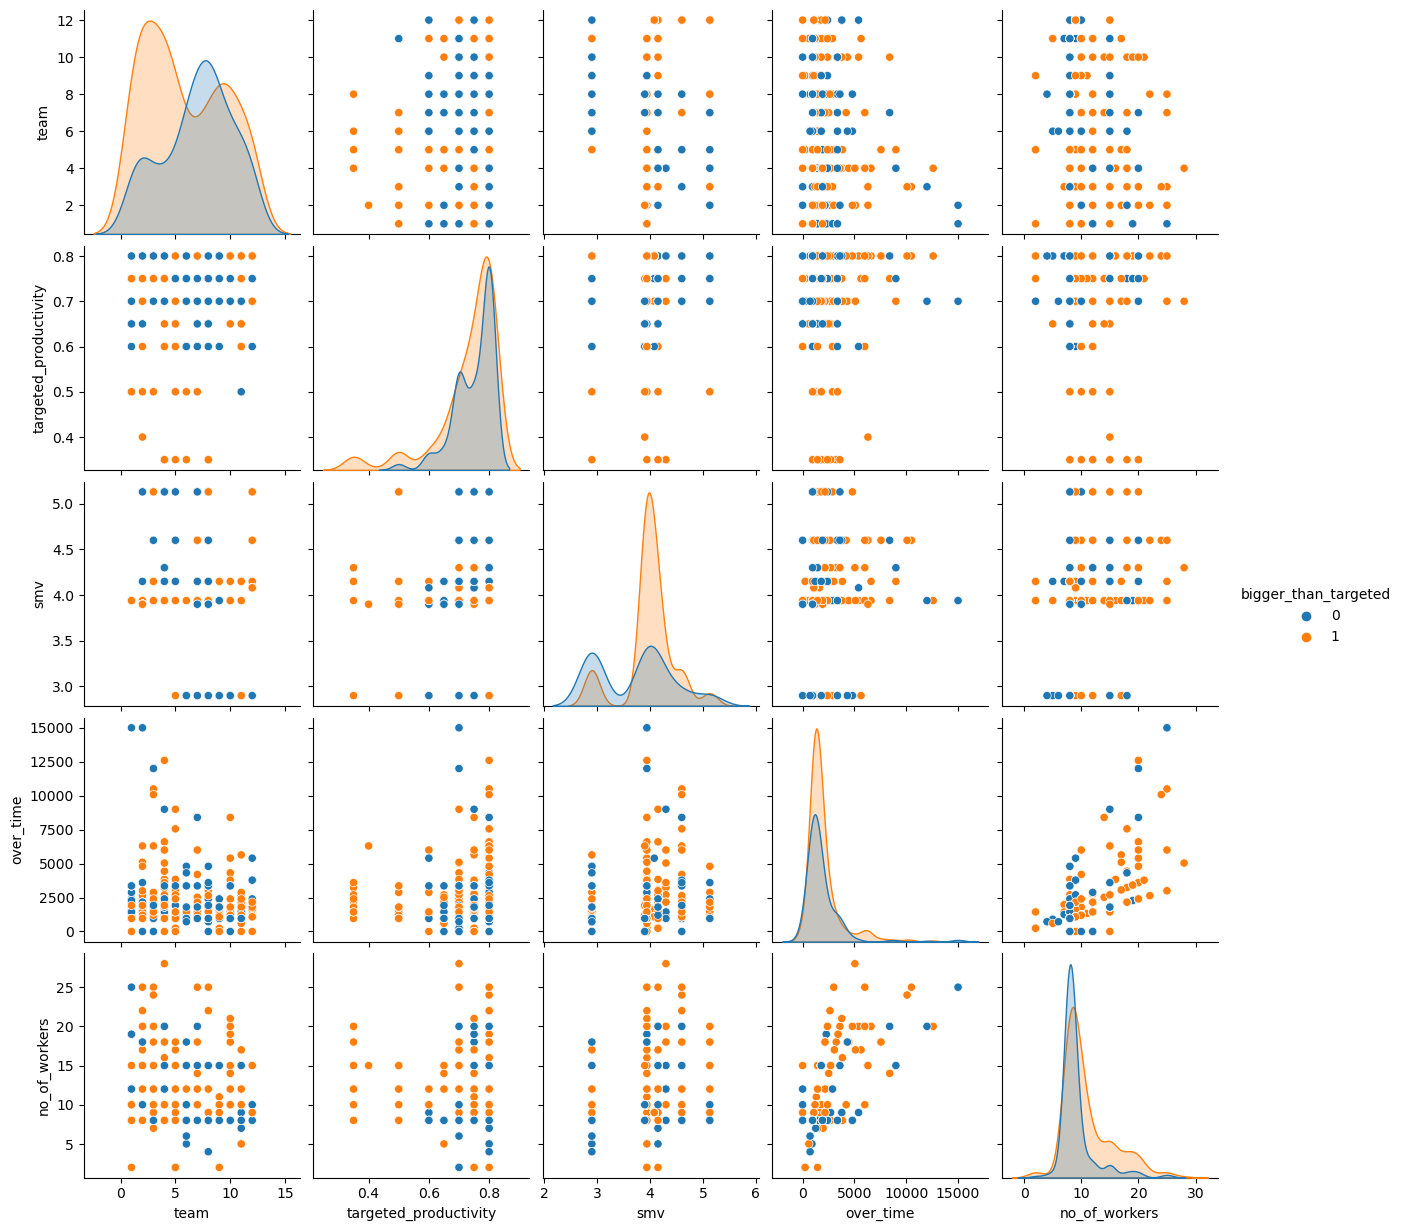

In [54]:
plt.figure(figsize=(20, 20))
sns.pairplot(data=X_finishing, hue='bigger_than_targeted')
plt.show()

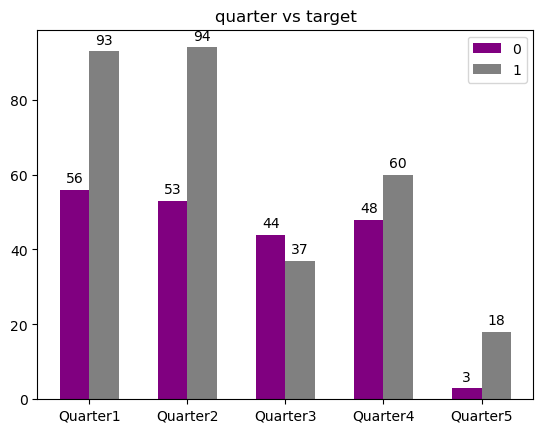

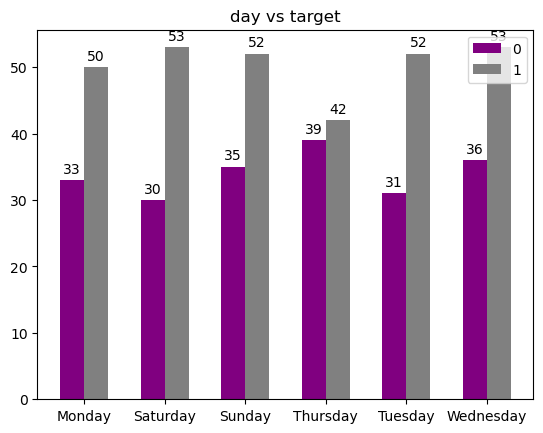

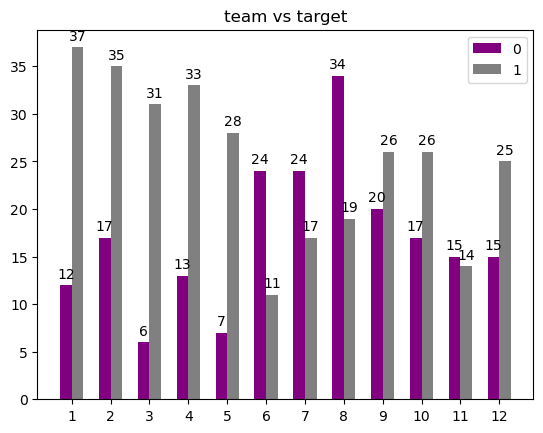

In [55]:
for cat_col in [col for col in categorical_features if col != 'department']:
    ind = np.arange(1, X_finishing[cat_col].nunique() + 1)
    width = 0.3

    fig, ax = plt.subplots()
    class_zero = ax.bar(ind, X_finishing[X_finishing['bigger_than_targeted'] == 0].groupby(cat_col)['date'].count().values, width, color='purple')
    class_one = ax.bar(ind + width, X_finishing[X_finishing['bigger_than_targeted'] == 1].groupby(cat_col)['date'].count().values, width, color='gray')
    plt.xticks(ind + width / 2, np.sort(X_finishing[cat_col].unique()))
    plt.legend(['0', '1'])
    plt.title(f'{cat_col} vs target')

    ax.bar_label(class_zero, padding=3)
    ax.bar_label(class_one, padding=3)

    plt.show()

<p><b><u>Notes:</u></b></p>
<p><b>1) Target correlates positively with 'smv', 'no_of_workers', 'team' (categorical).</b></p>
<p><b>2) 'Thursday' is the worst day.</b></p>
<p><b>3) 'Quarter3', 'Quarter4' are the worst.</b></p>
<p><b>4) Best teams: 3, 5; worst teams (class 0 > class 1): 6, 7, 8, 11.</b></p>
<p><b></b></p>

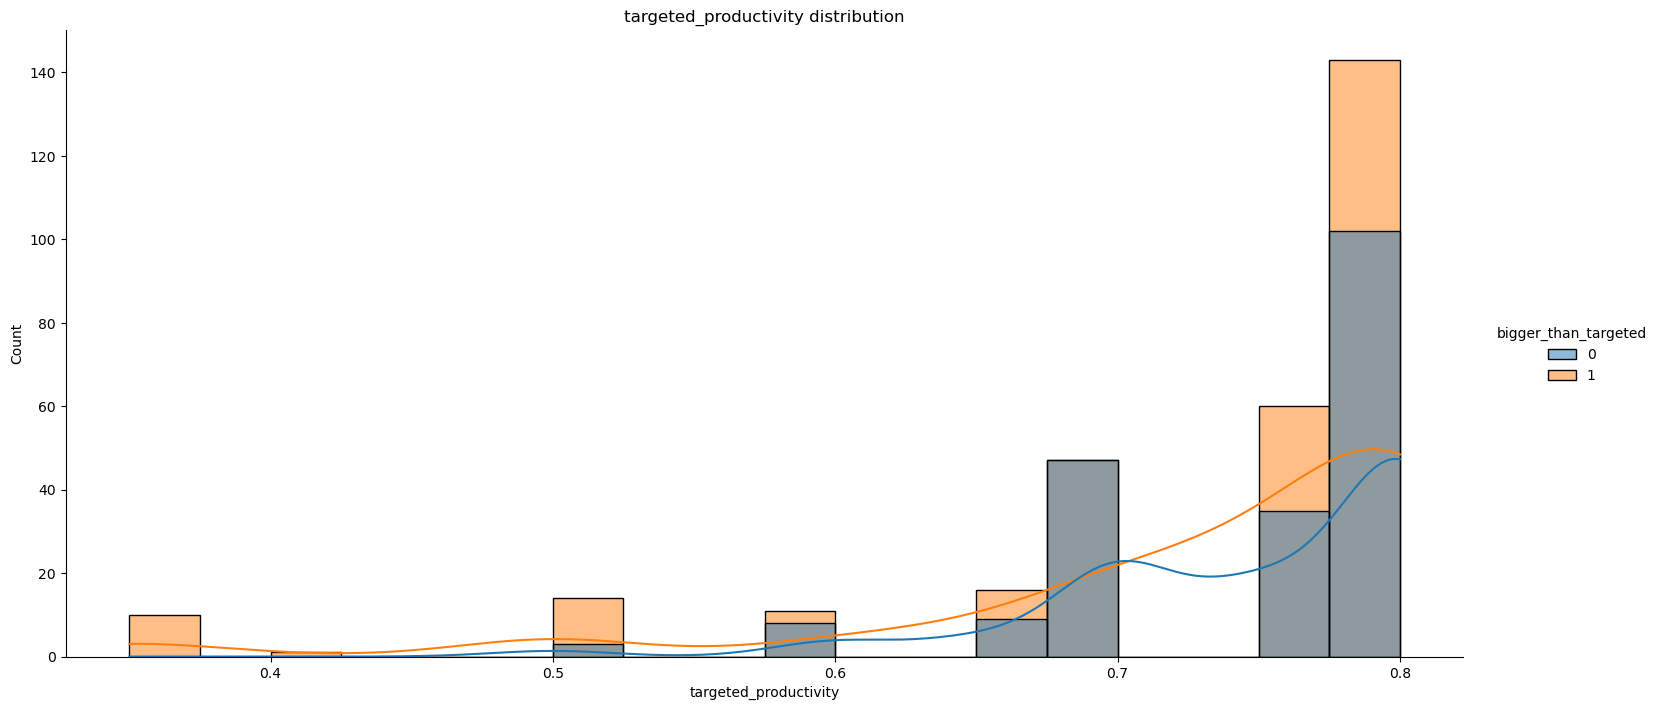

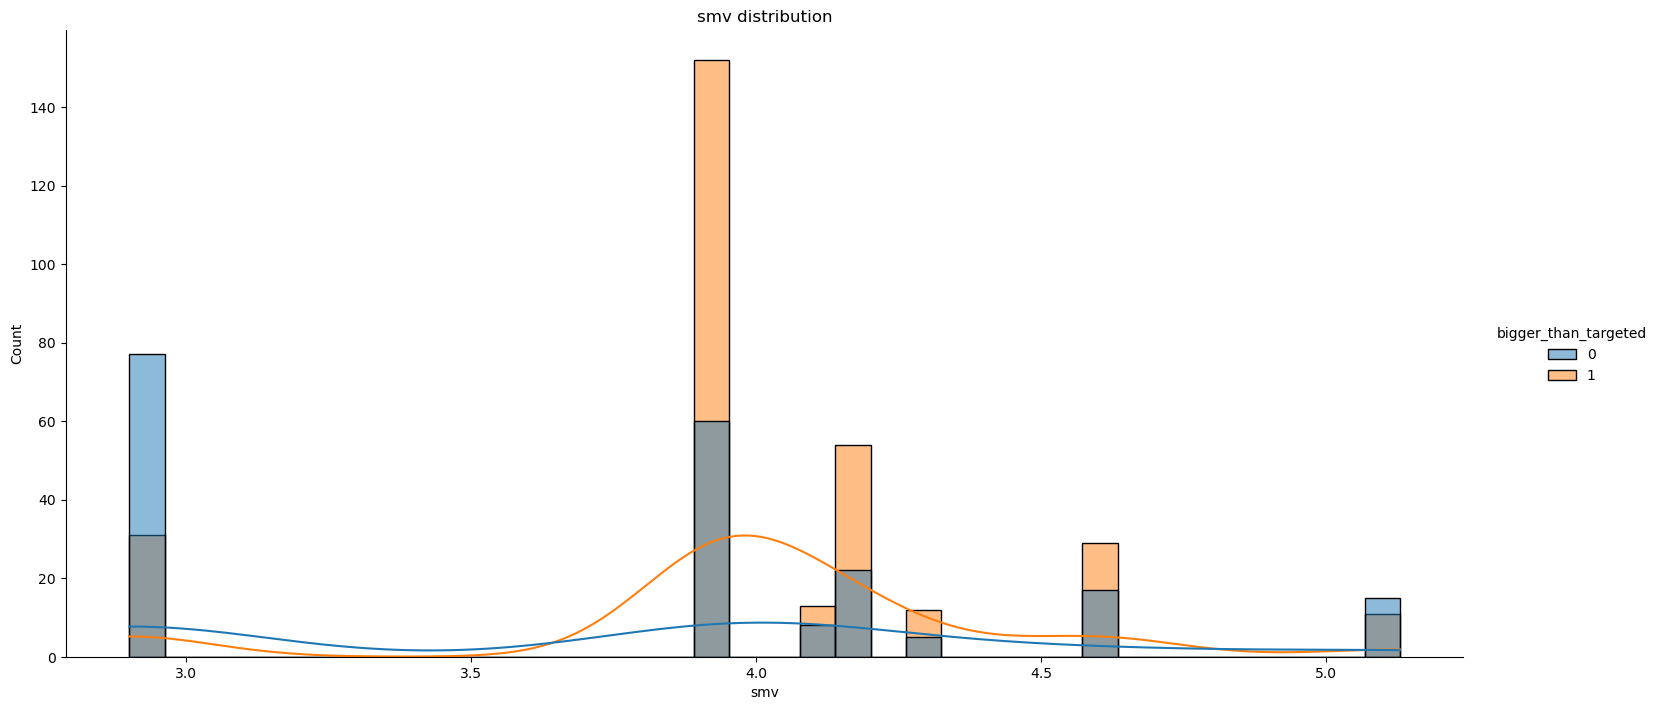

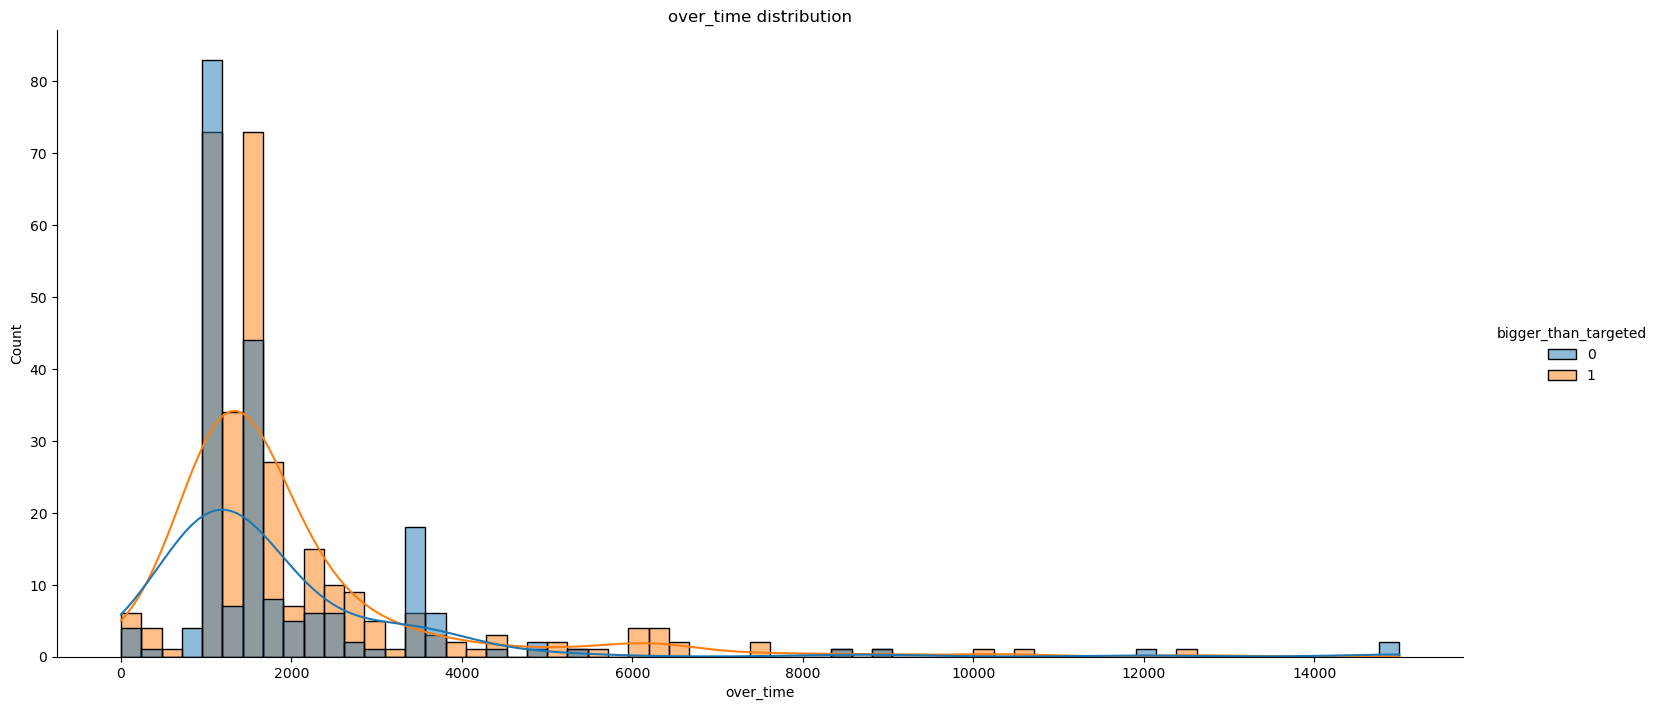

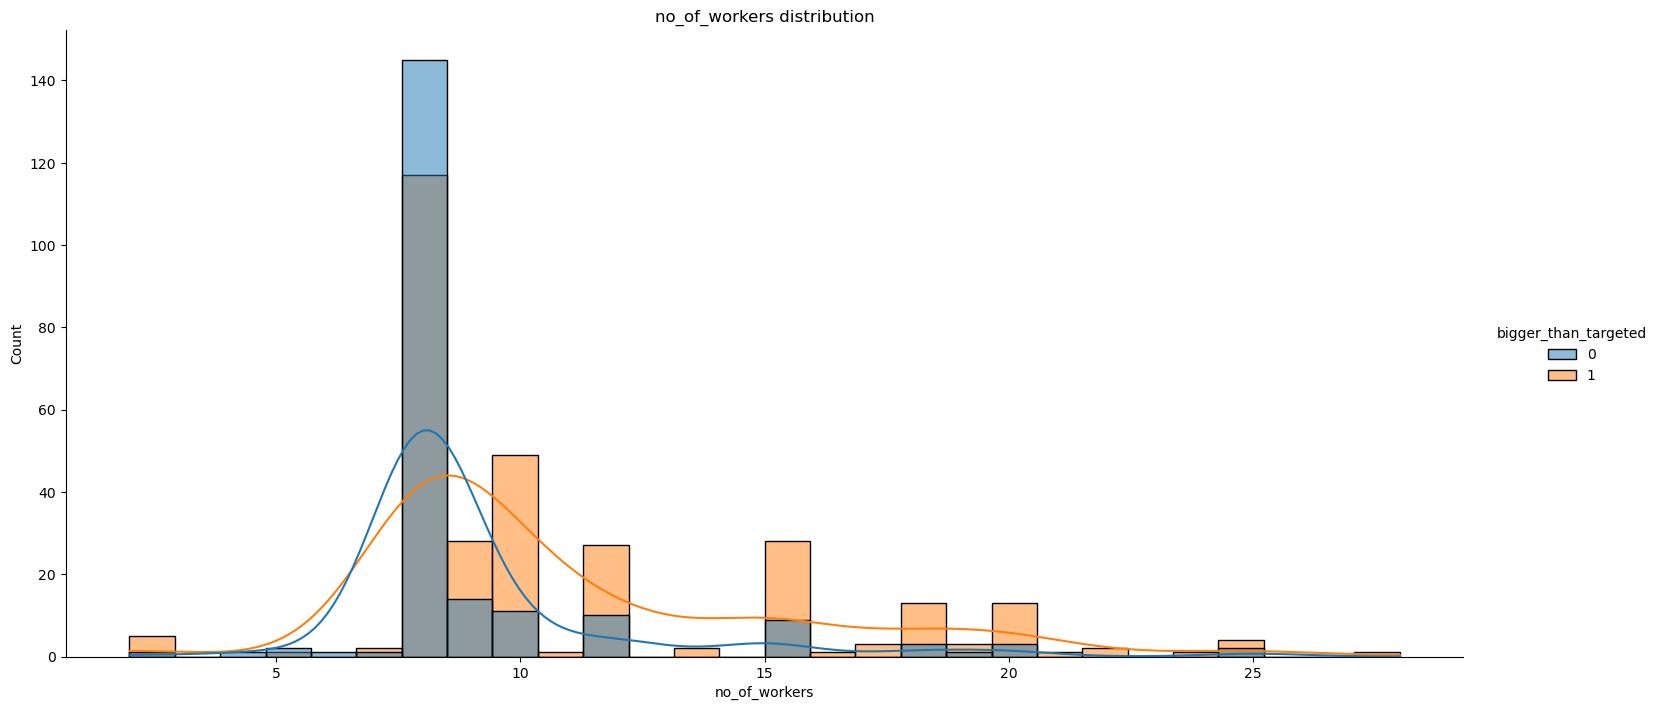

In [56]:
for i, num_col in enumerate([col for col in numerical_features if col in X_finishing.columns]):
    sns.displot(x=X_finishing[num_col], hue=X_finishing['bigger_than_targeted'], alpha=0.5, kde=True, height=7.0, aspect=15.0/7.0)
    plt.title(f'{num_col} distribution')
    plt.show()

<p><b>4) As we can see below, distributions of numerical features, which don't correlate well with the target, almost don't differ from one target class to another.</b></p>

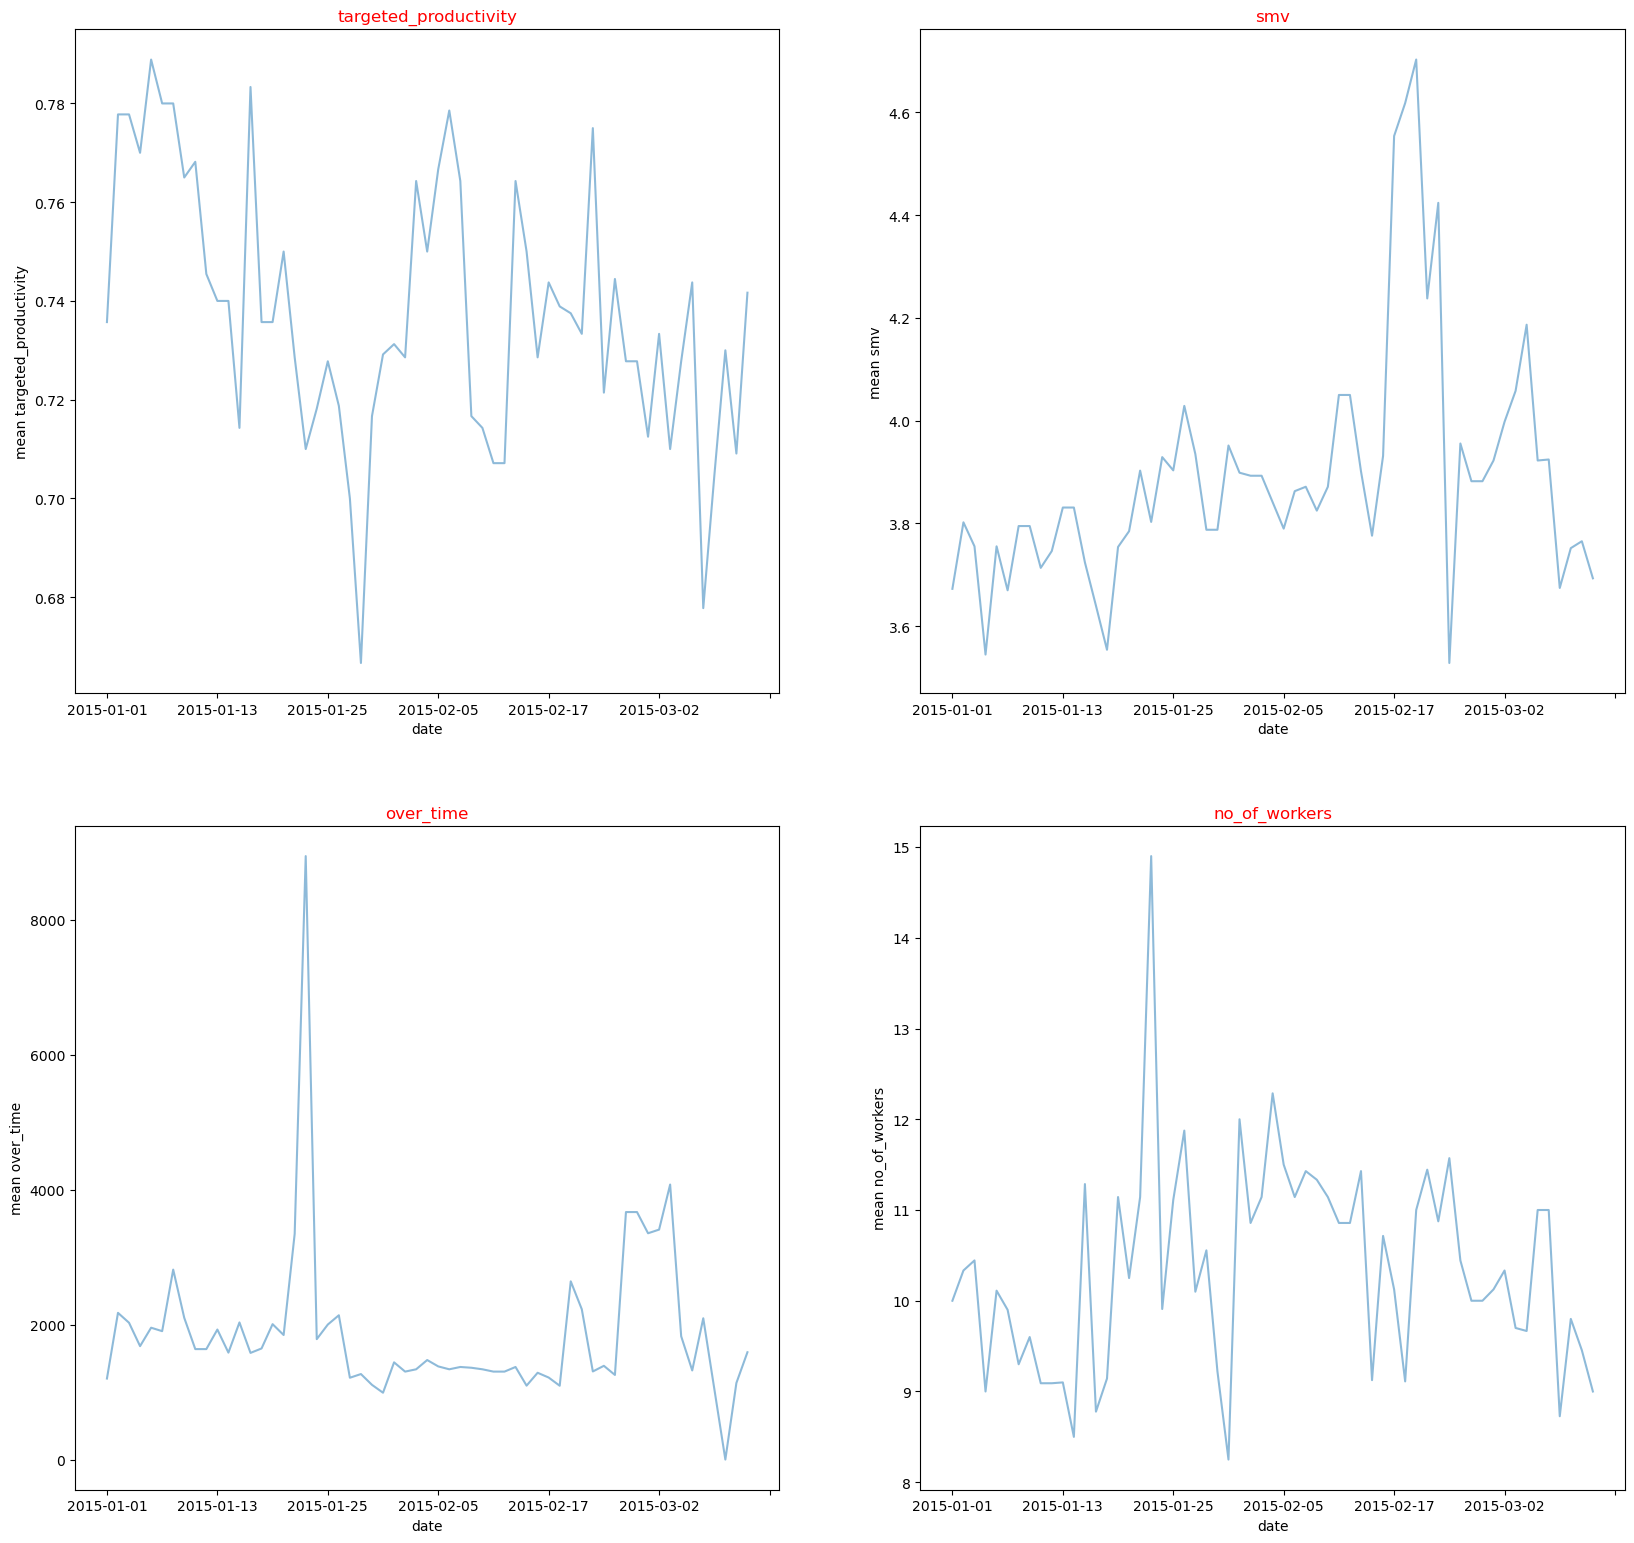

In [57]:
plt.figure(figsize=(20, 50))
for i, num_col in enumerate([col for col in numerical_features if col in X_finishing.columns]):
    plt.subplot(5, 2, i + 1)
    average_sales = X_finishing.groupby('date')[num_col].mean()
    plt.ylabel(f'mean {num_col}')
    ax = average_sales.plot(alpha=0.5)
    plt.title(num_col, color='red')

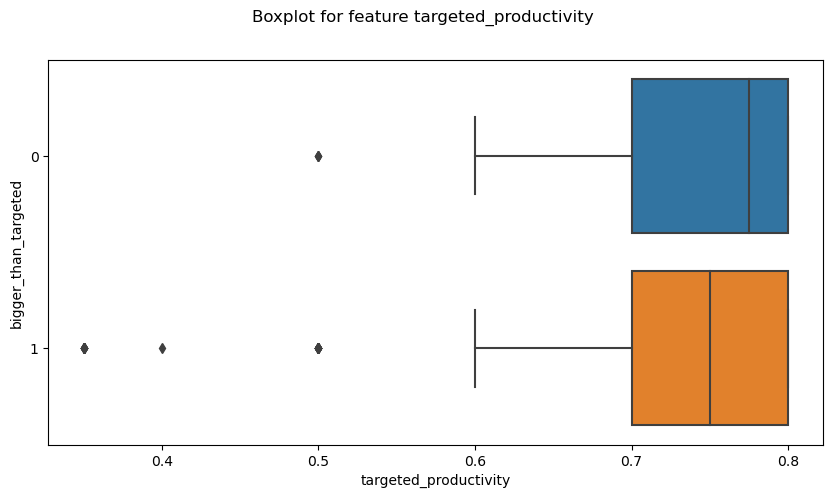

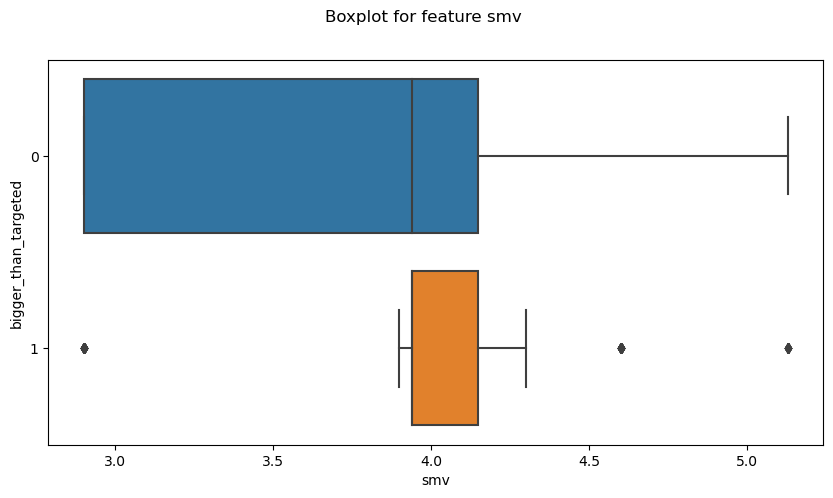

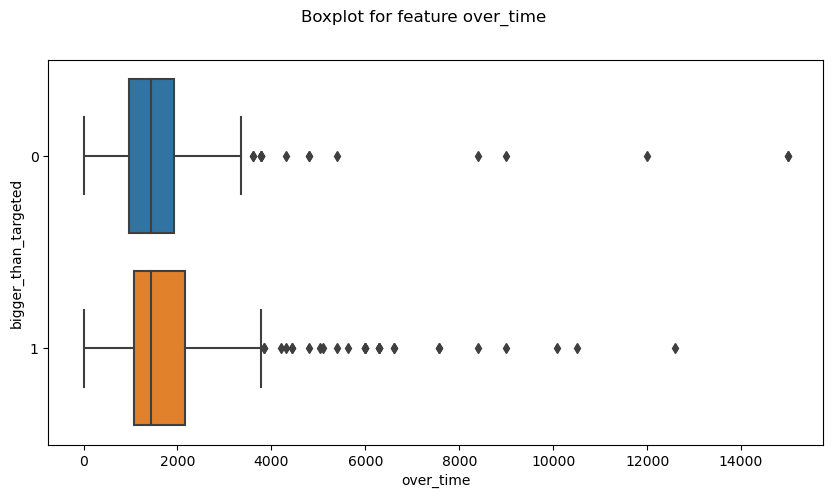

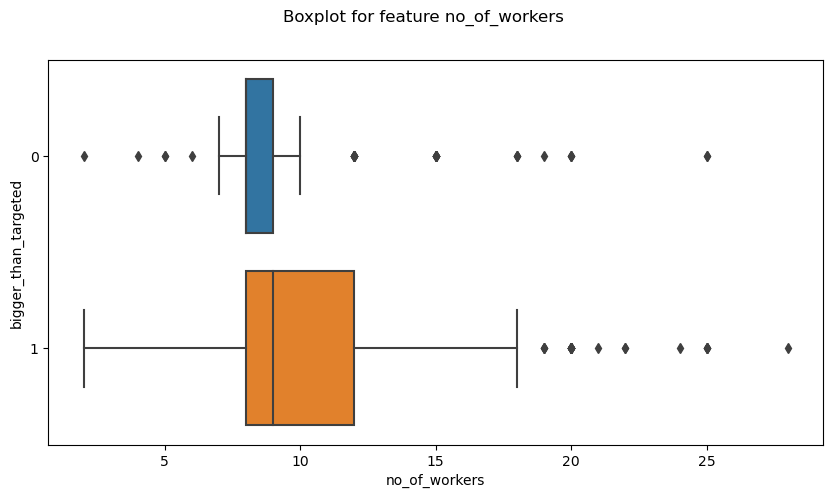

In [58]:
for i, num_col in enumerate([col for col in numerical_features if col in X_finishing.columns]):
    fig, axes = plt.subplots(1, 1, figsize=(10, 5), sharey=True)
    fig.suptitle(f'Boxplot for feature {num_col}')
    sns.boxplot(data=X_finishing, x=num_col, y='bigger_than_targeted', orient="h")
    plt.show()

Text(0.5, 1.0, 'bigger_than_targeted')

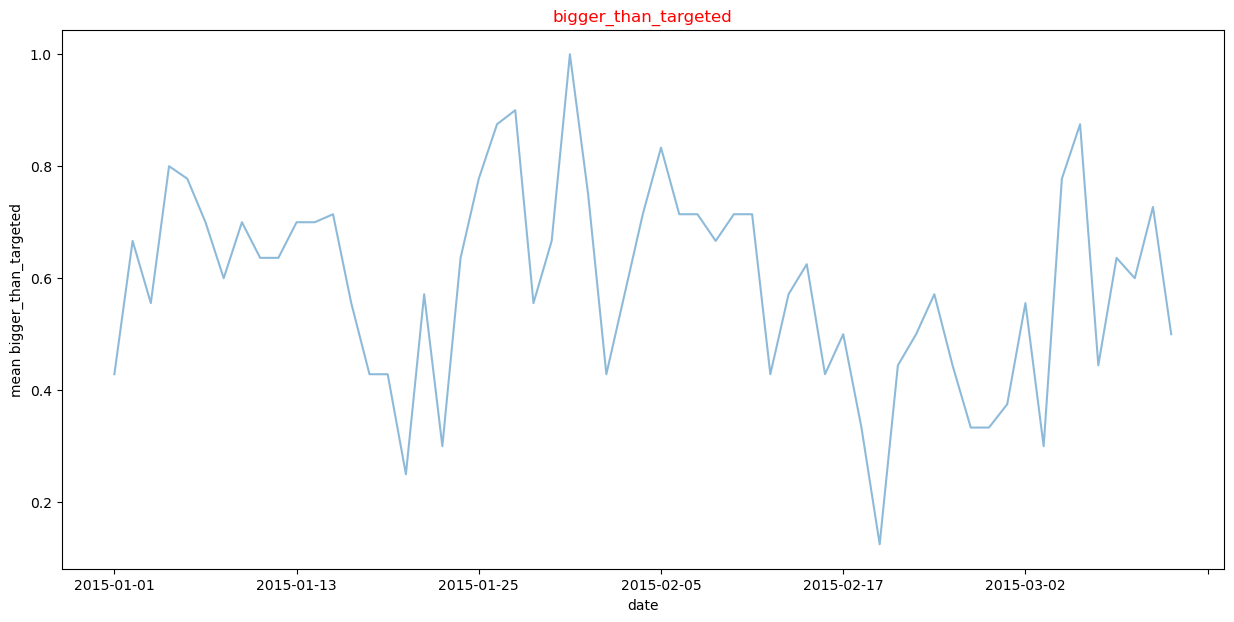

In [59]:
plt.figure(figsize=(15, 7))
average_sales = X_finishing.groupby('date')['bigger_than_targeted'].mean()
plt.ylabel('mean bigger_than_targeted')
ax = average_sales.plot(alpha=0.5)
plt.title('bigger_than_targeted', color='red')

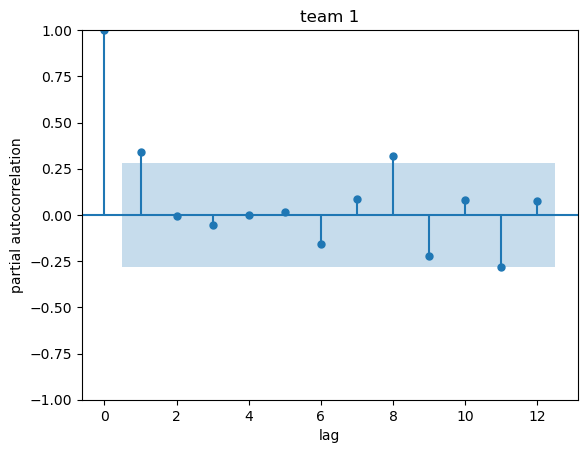

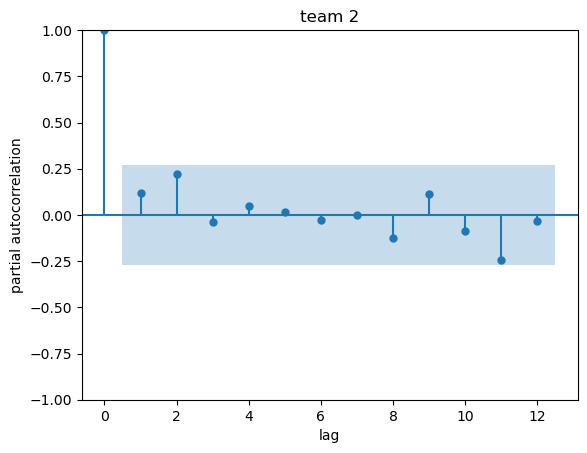

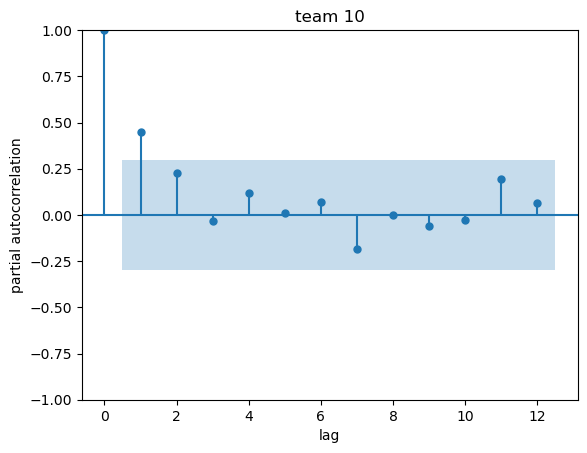

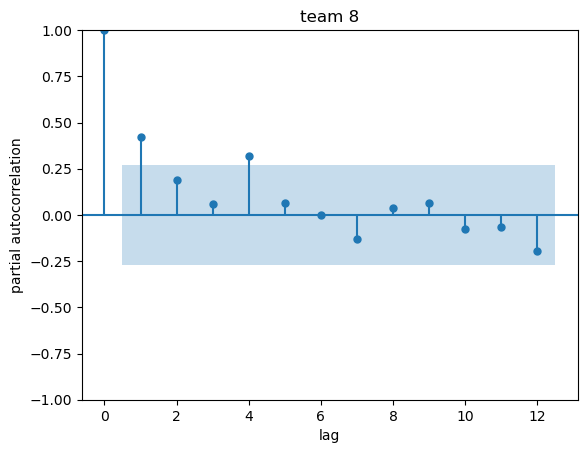

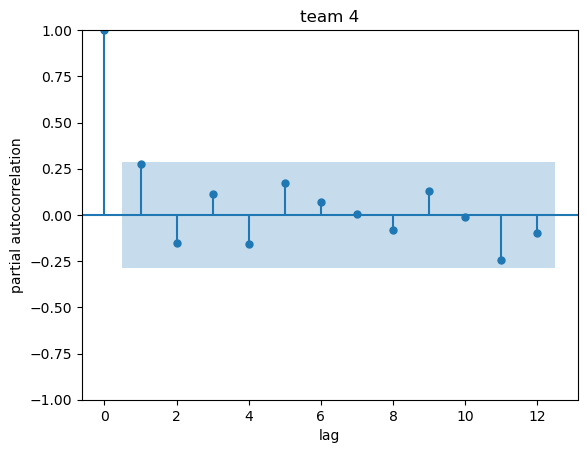

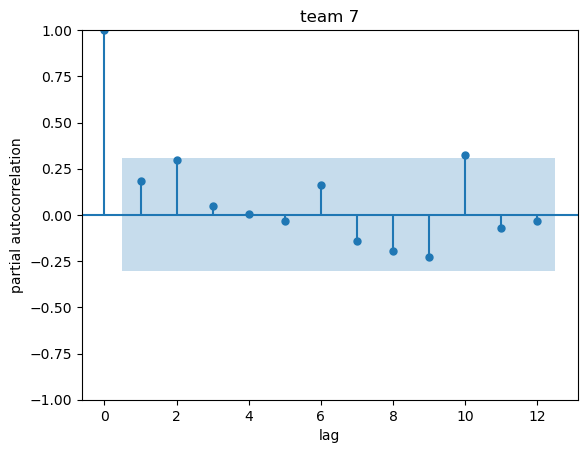

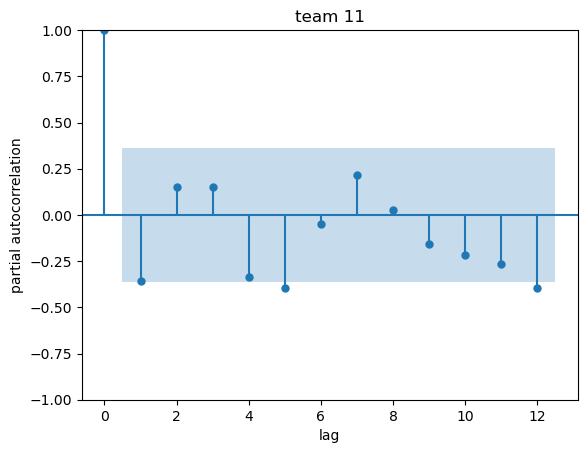

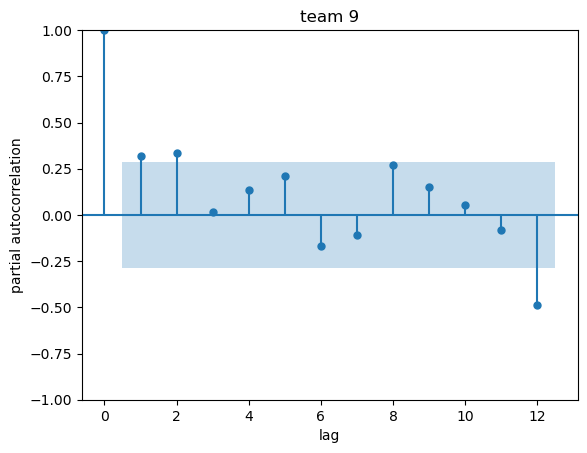

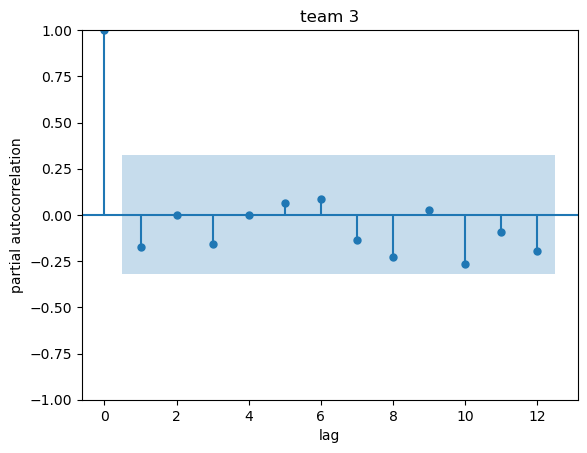

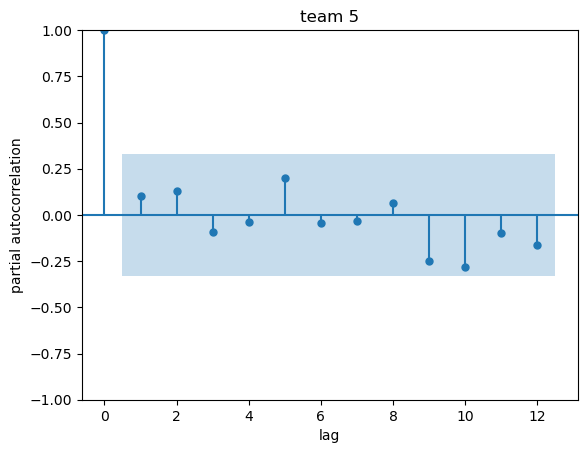

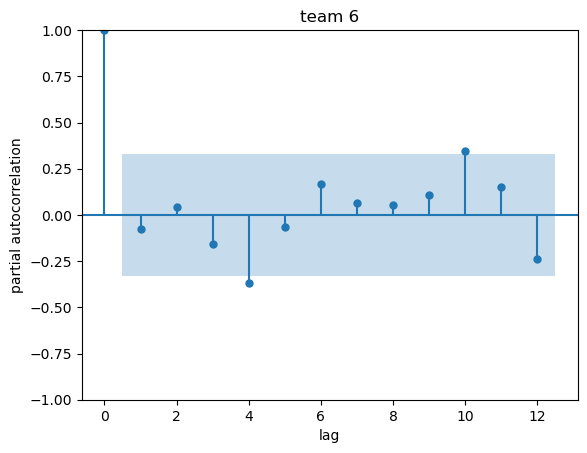

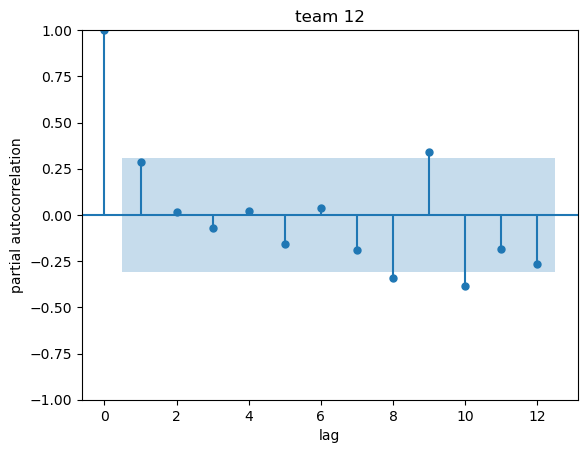

In [60]:
### explore lags of the target with the help of correlogram
### granularity: department-team

X_finishing_copy = X_finishing.groupby(['team', 'date'])['bigger_than_targeted'].mean()
for current_team in X_finishing['team'].unique():    
    current_team_values = X_finishing_copy.loc[current_team].reset_index()['bigger_than_targeted']
    sm.graphics.tsa.plot_pacf(current_team_values, lags=12)
    plt.title(f'team {current_team}')
    plt.xlabel('lag')
    plt.ylabel('partial autocorrelation')
    plt.show()